<a href="https://colab.research.google.com/github/johncduran/HHA-550-Assignments/blob/main/Another_copy_of_Summer_2024_Qualtrics_Survey_(_SBU_Athletics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing

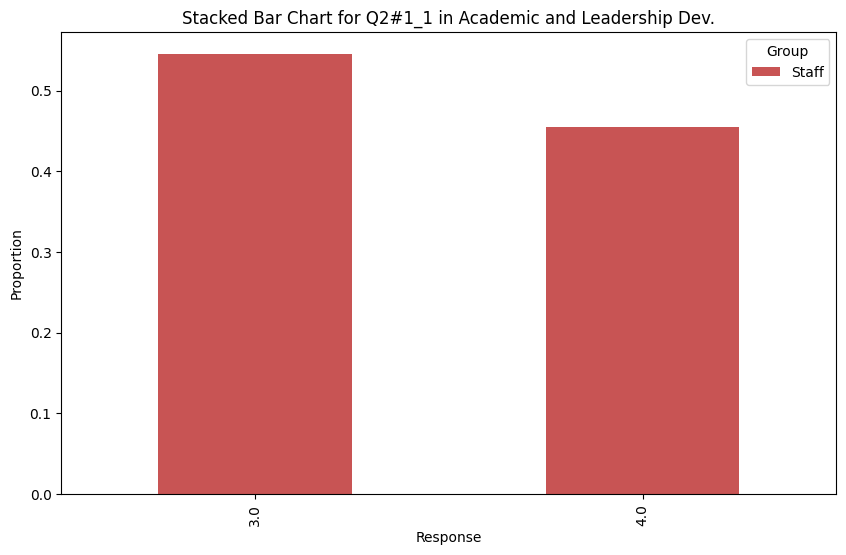

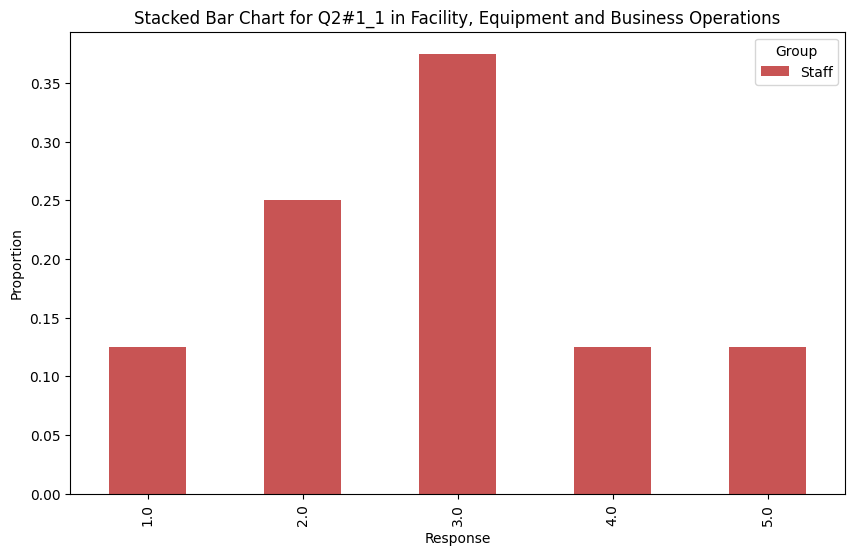

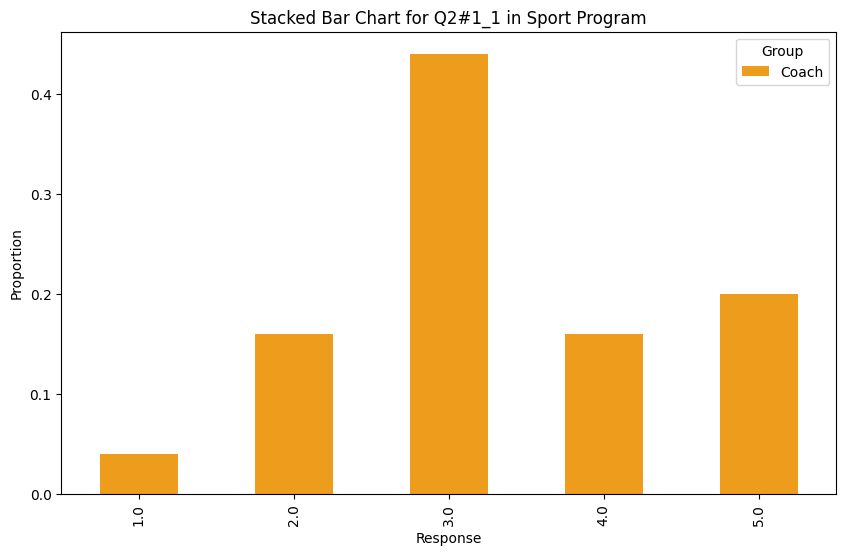

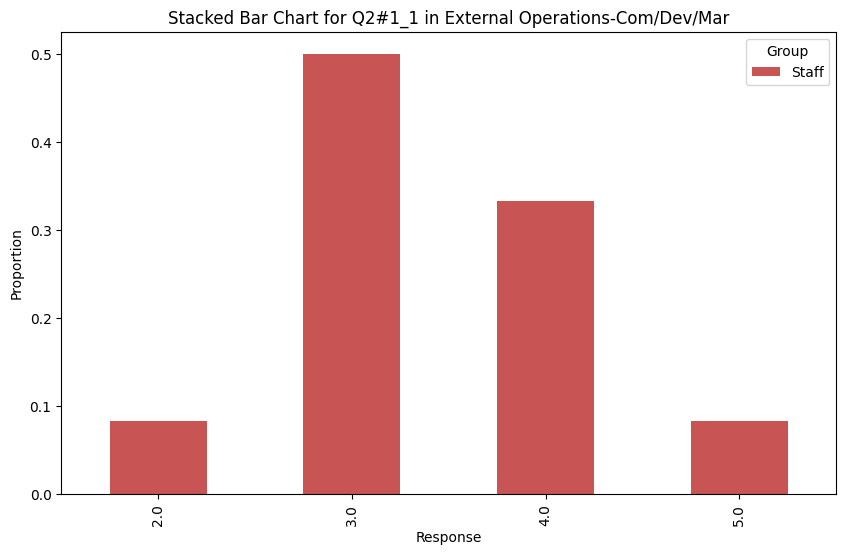

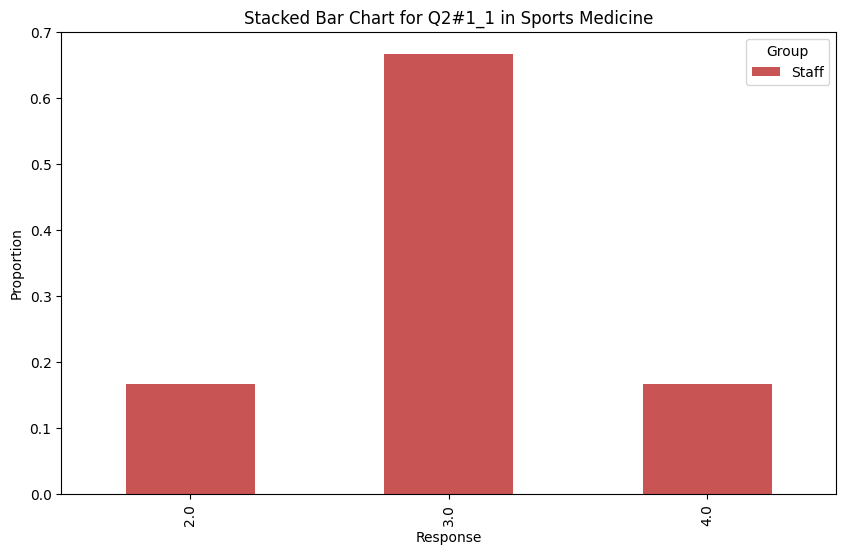

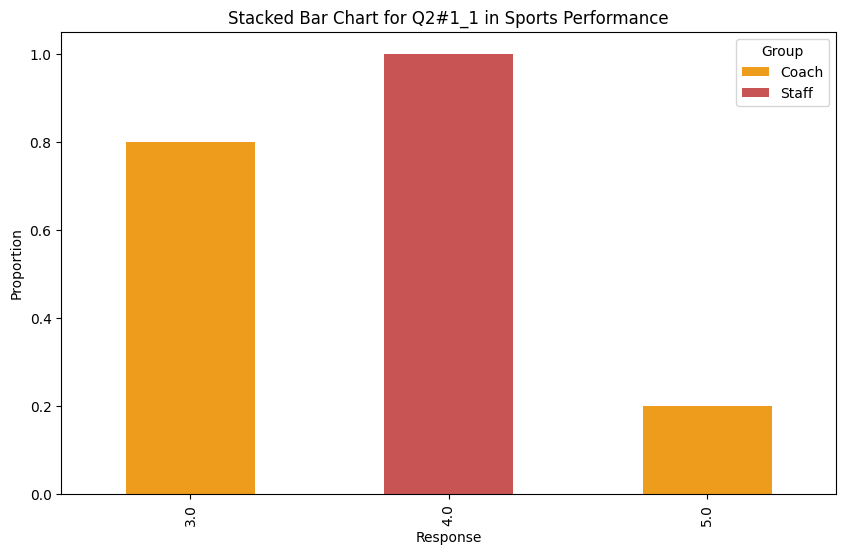

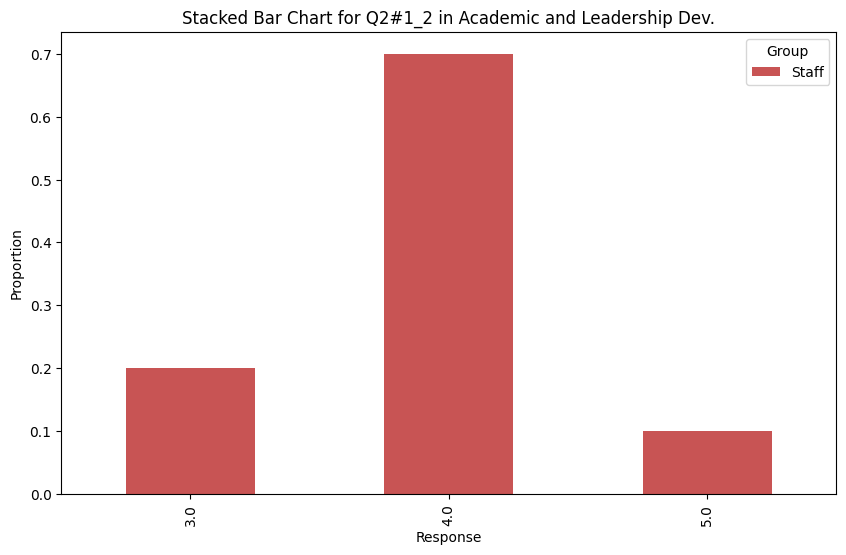

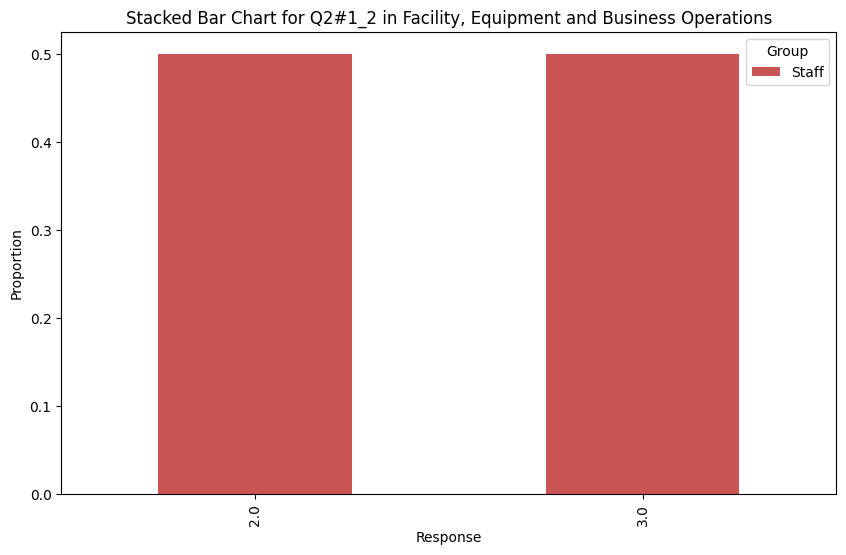

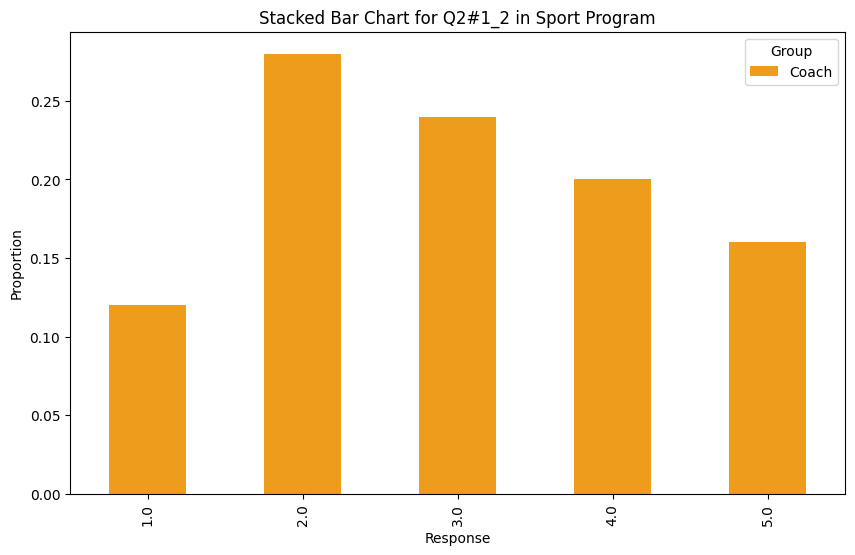

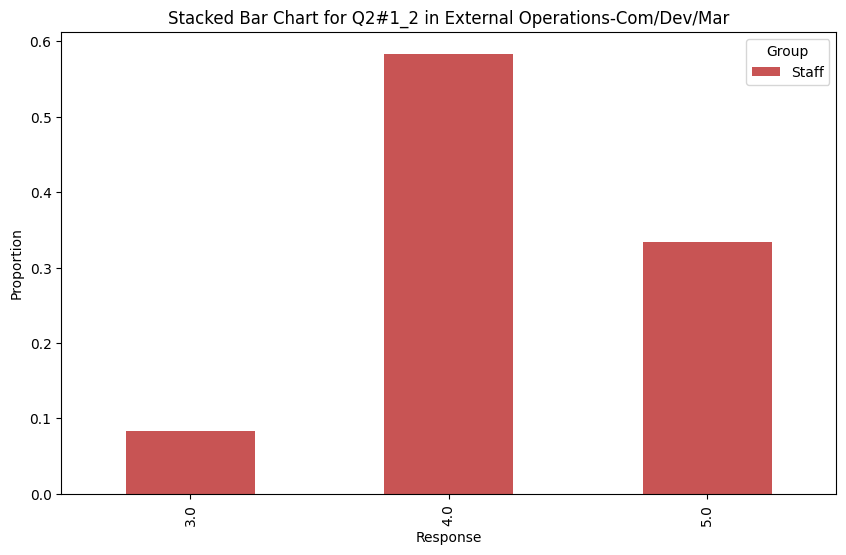

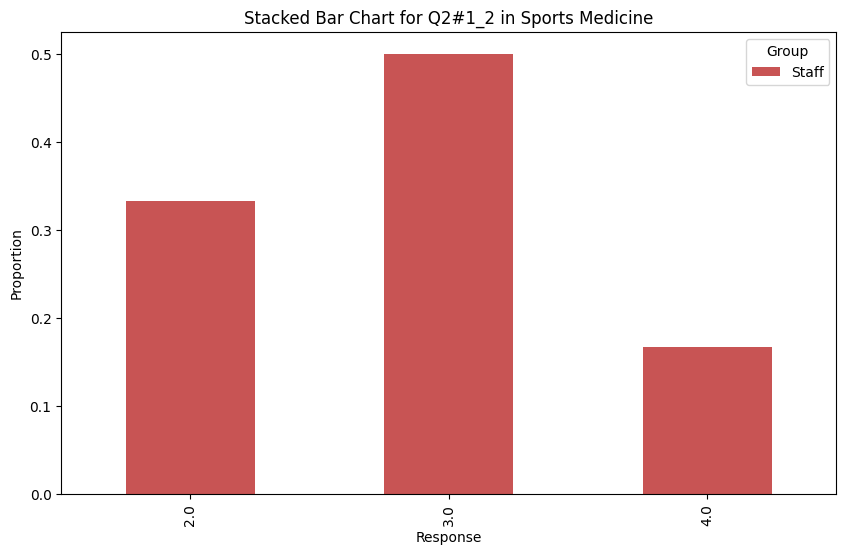

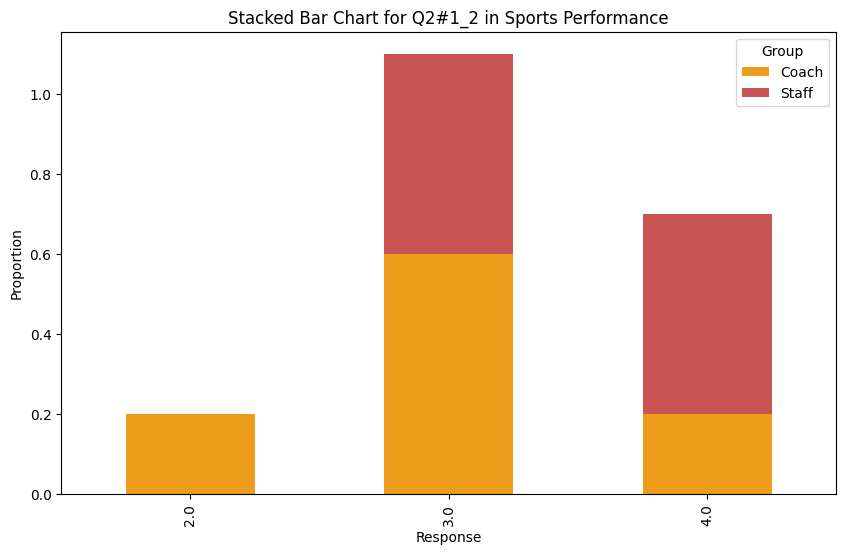

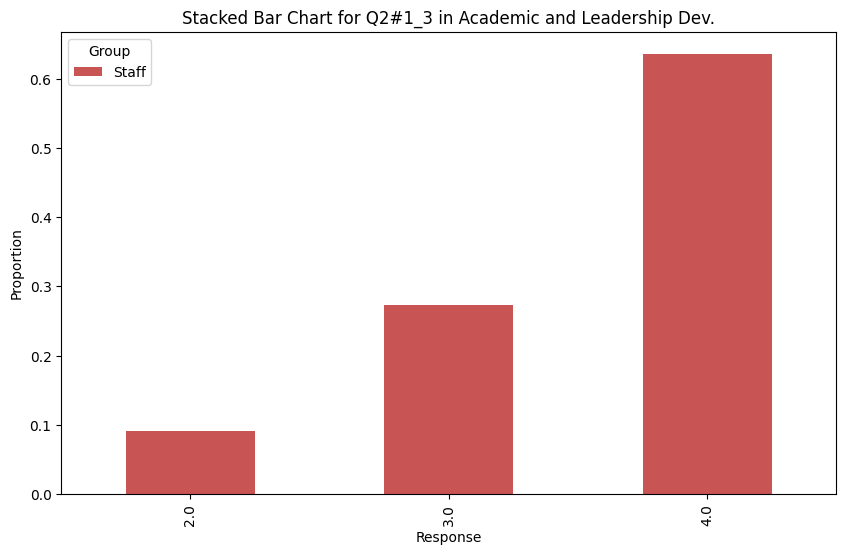

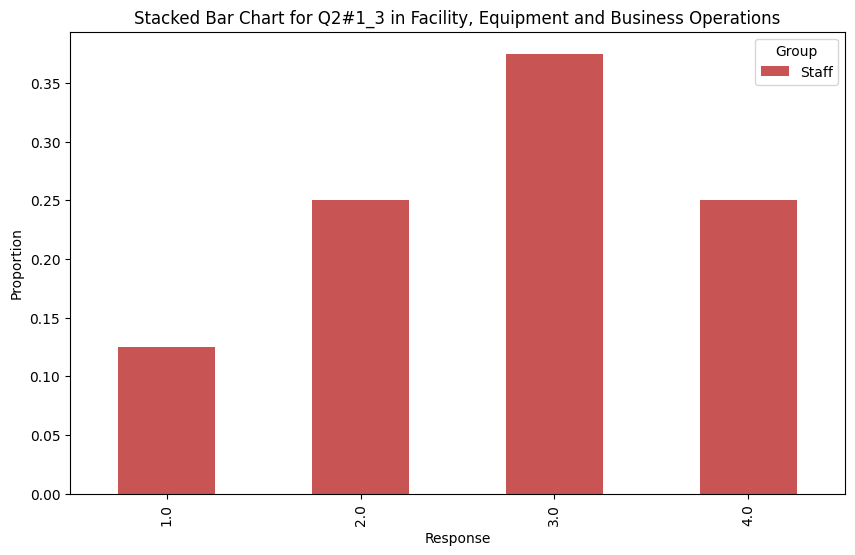

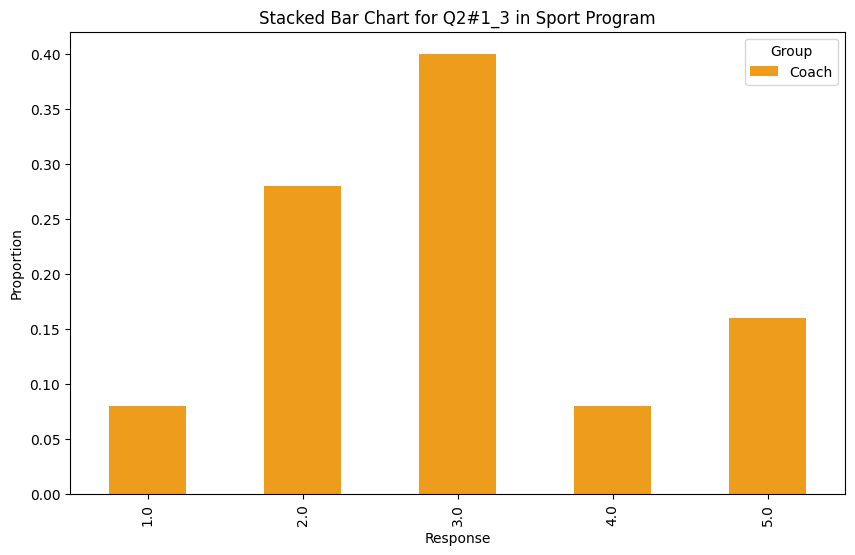

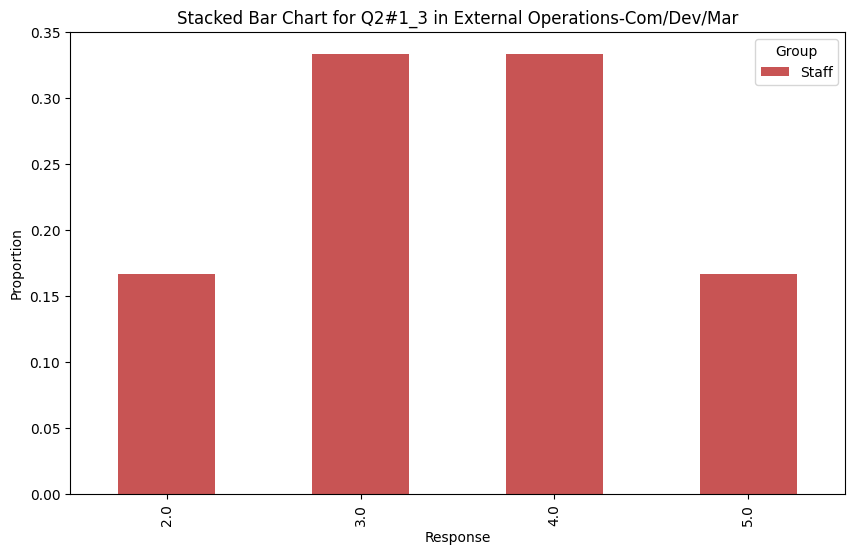

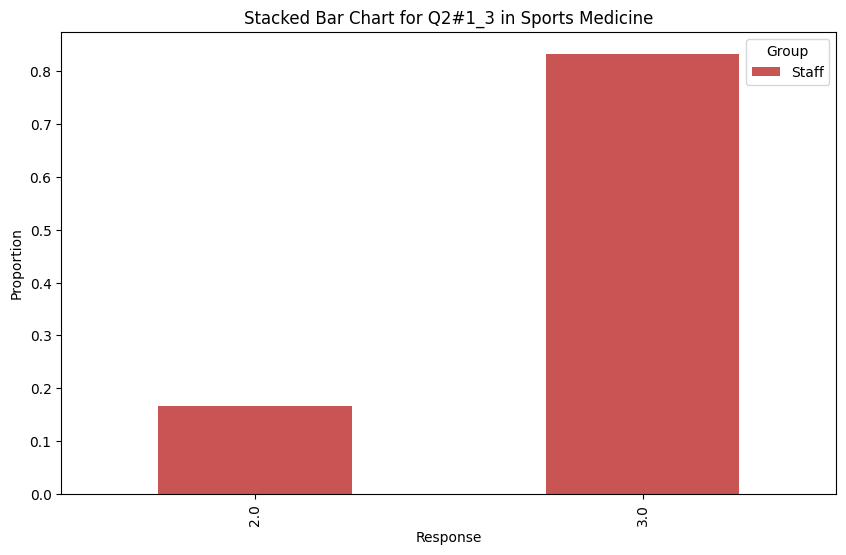

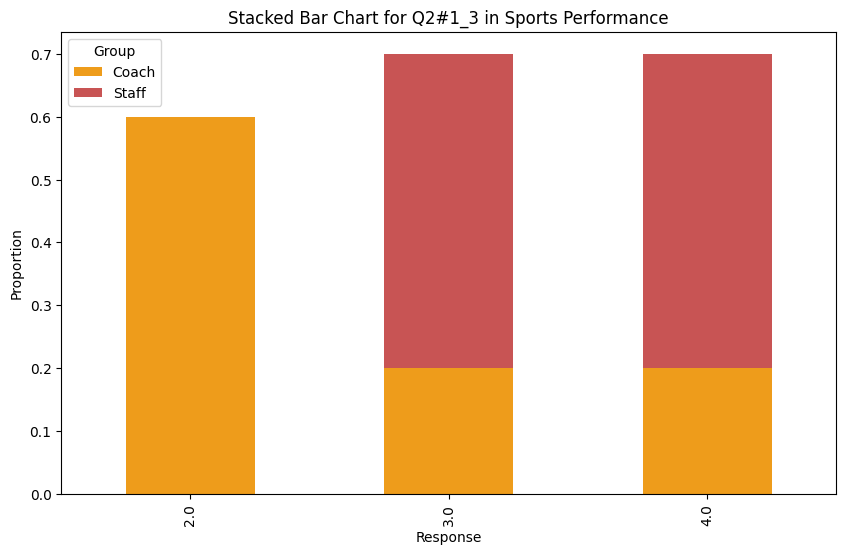

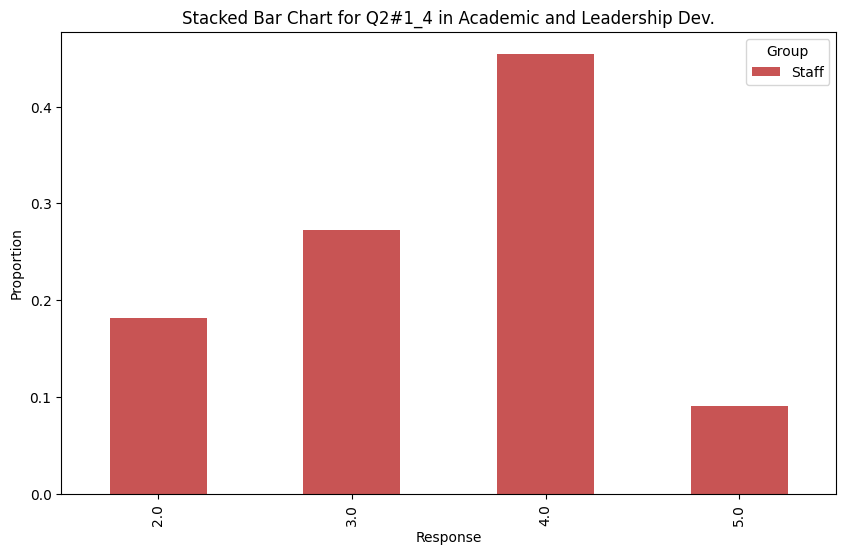

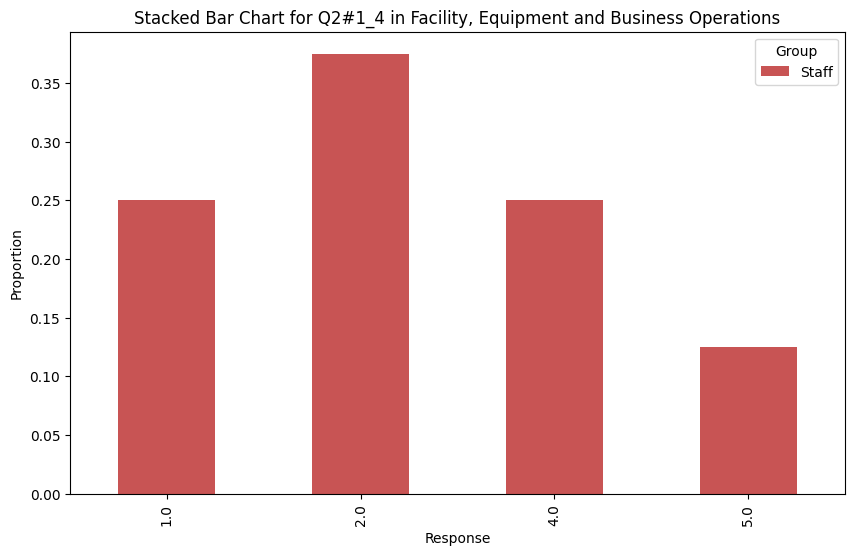

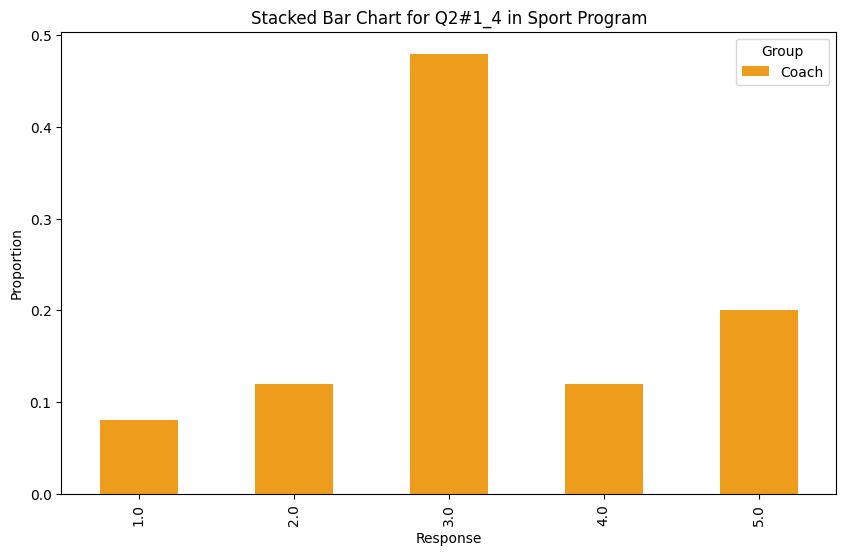

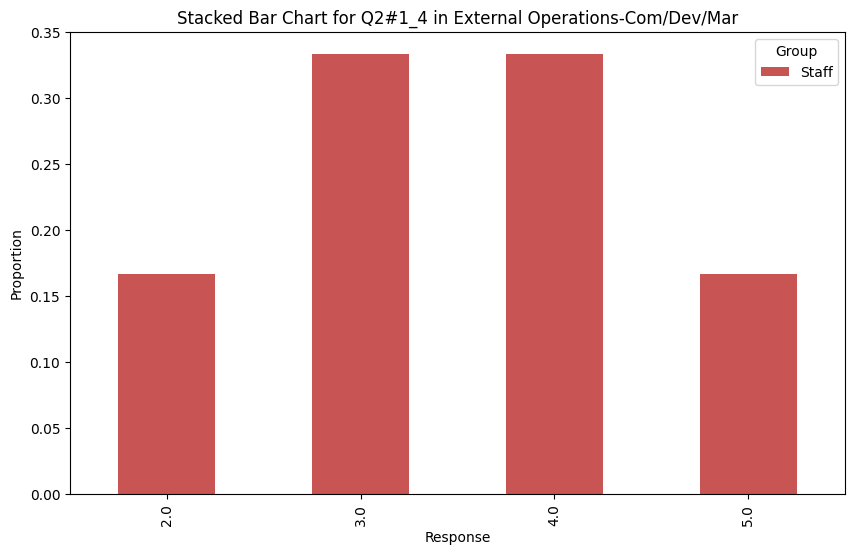

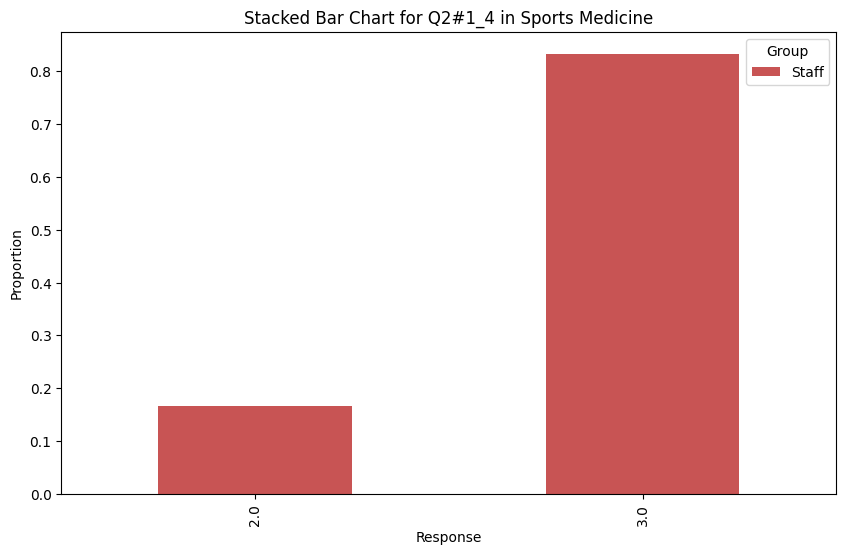

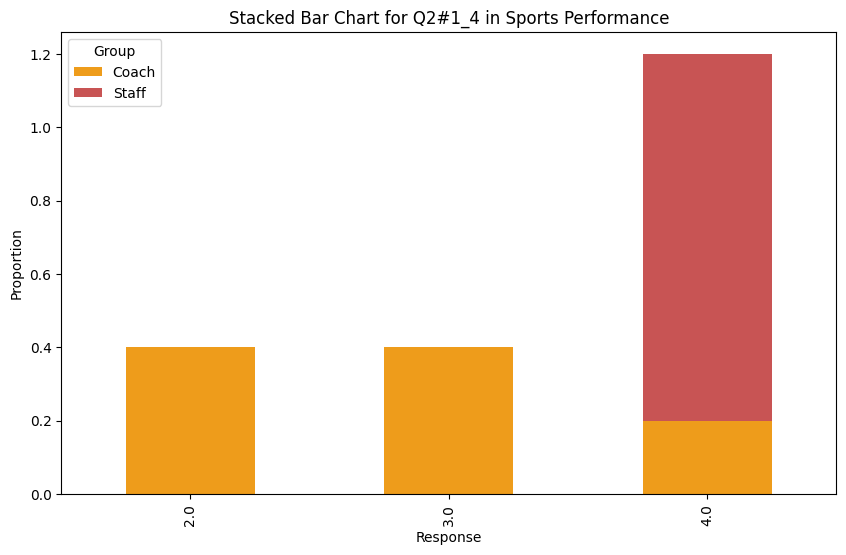

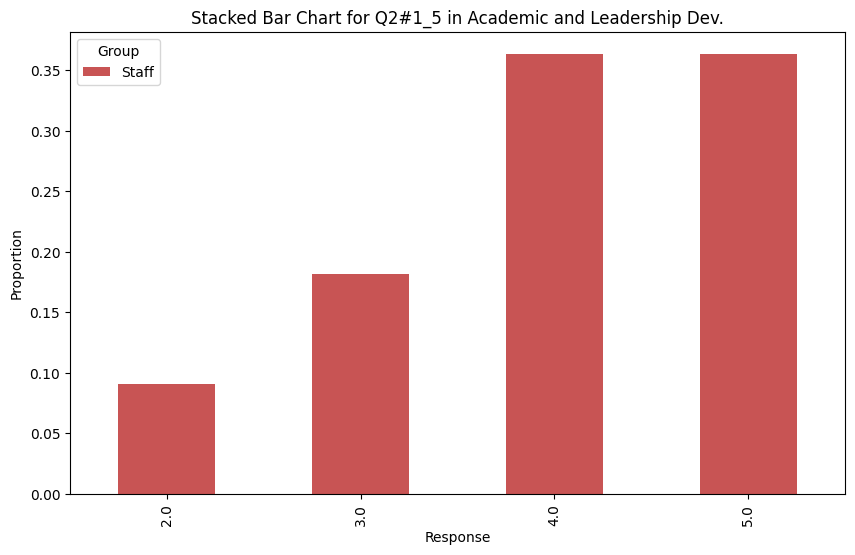

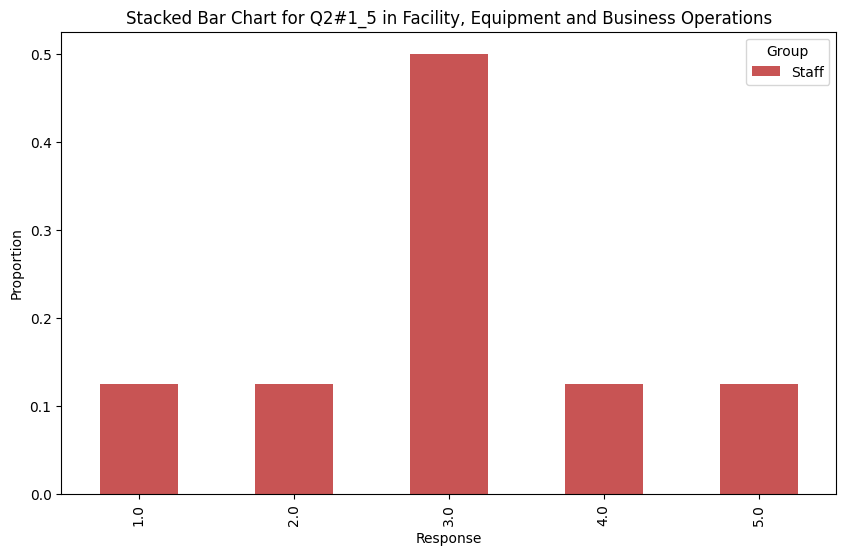

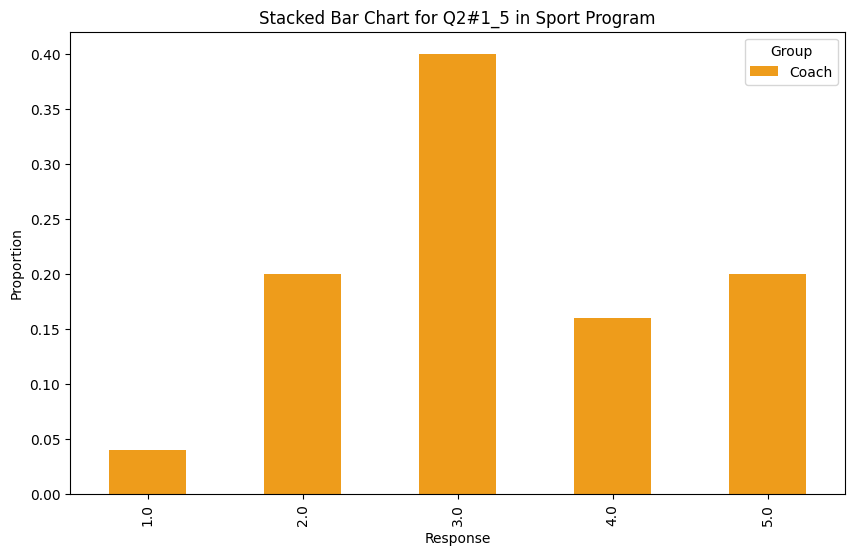

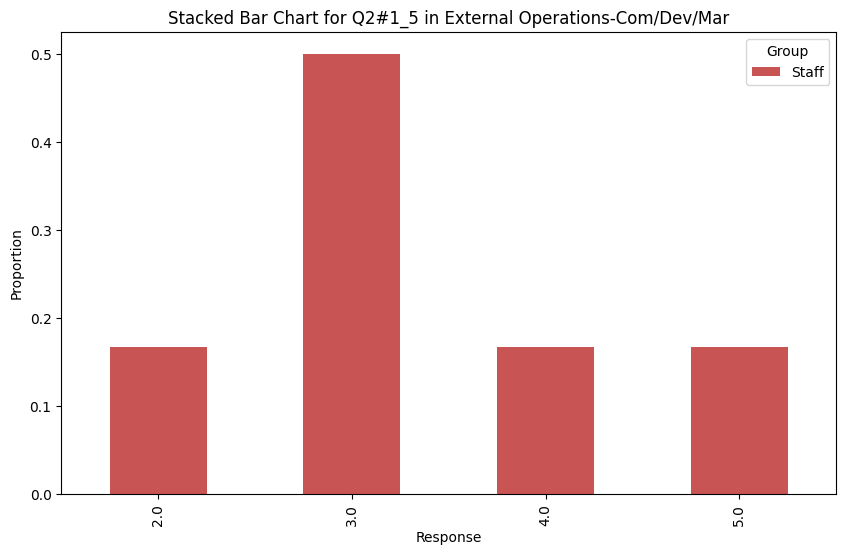

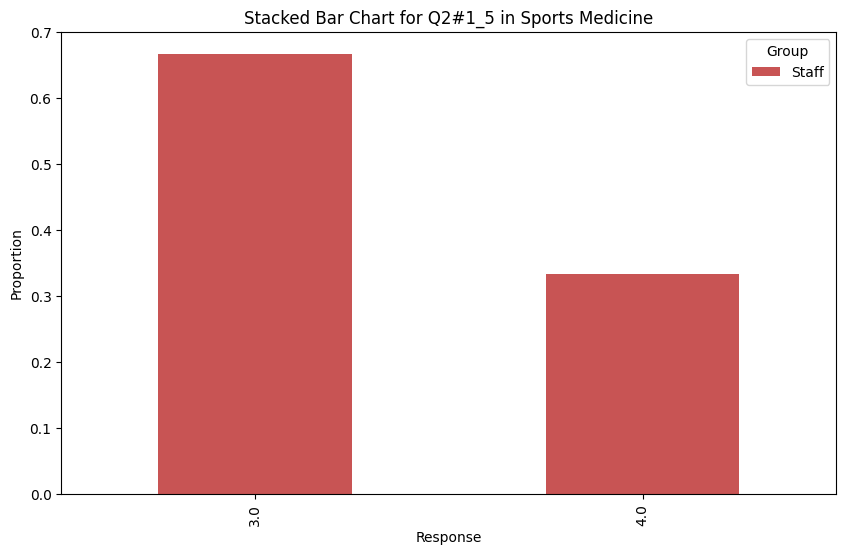

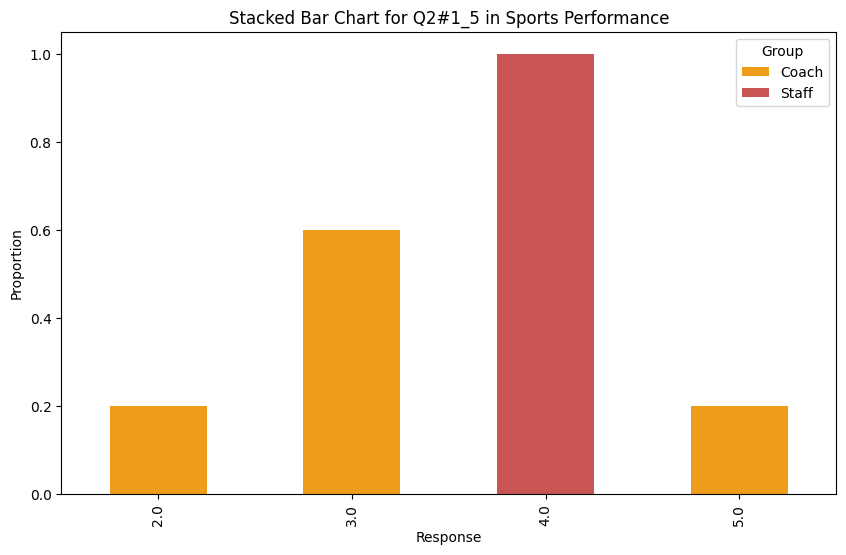

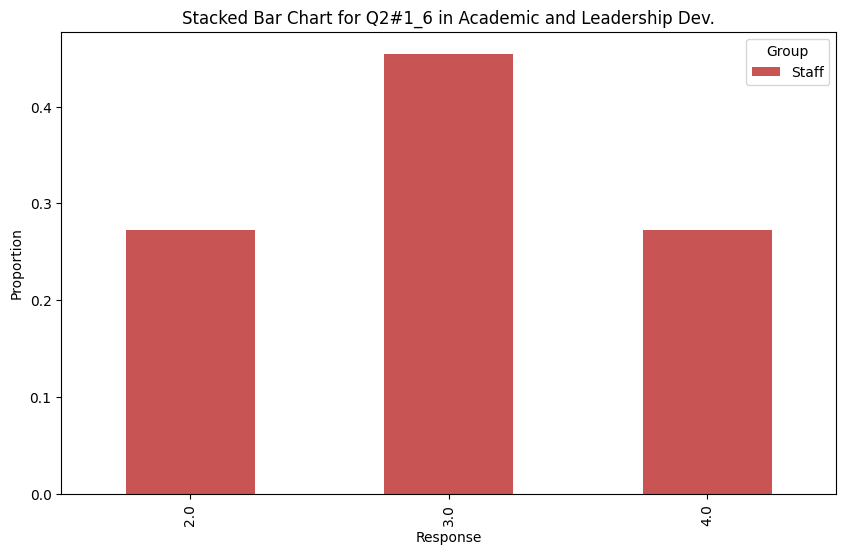

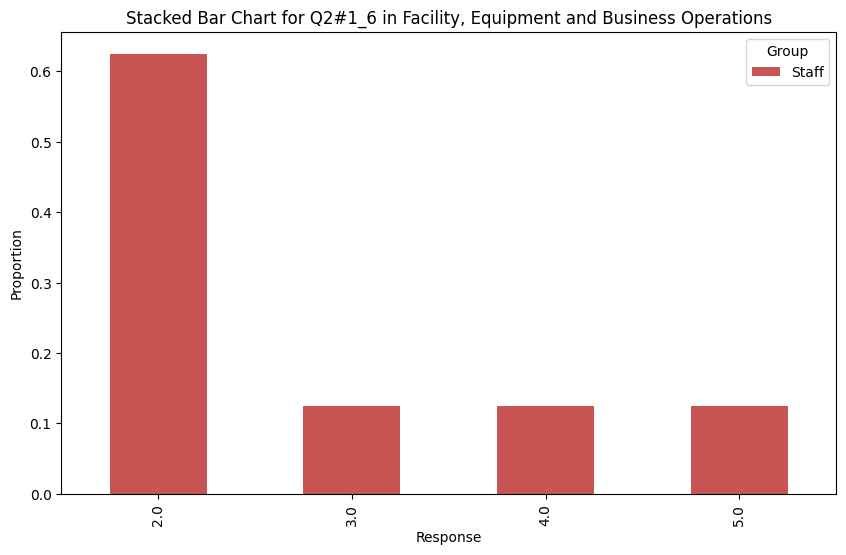

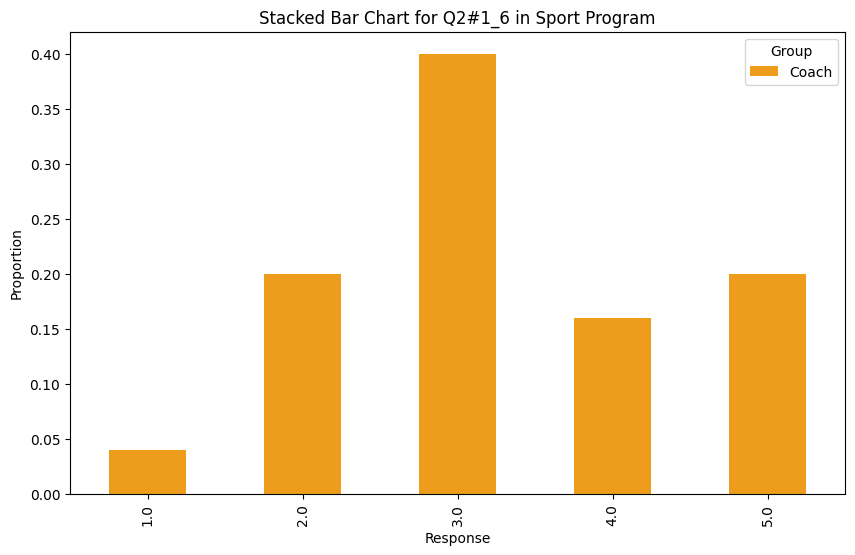

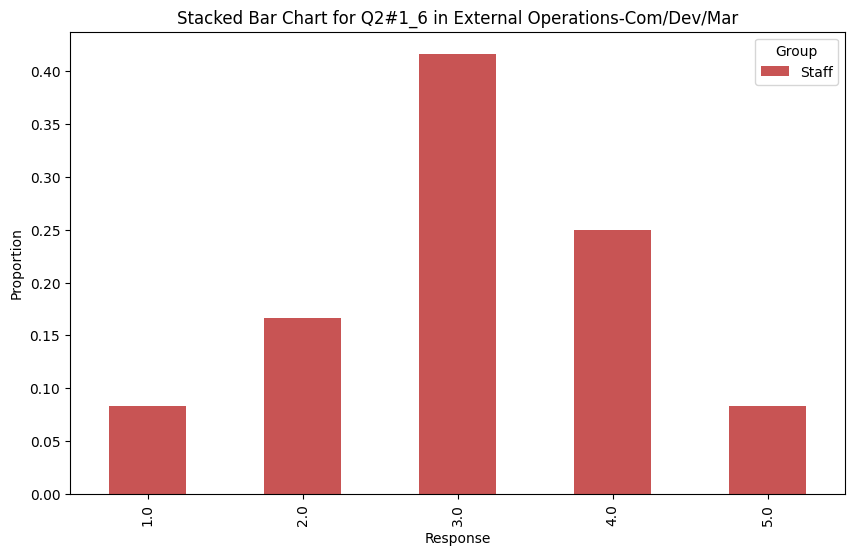

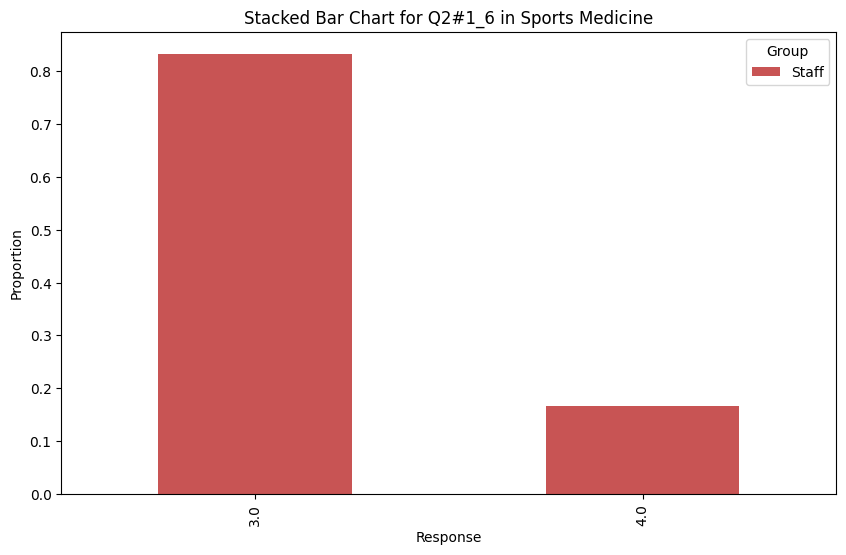

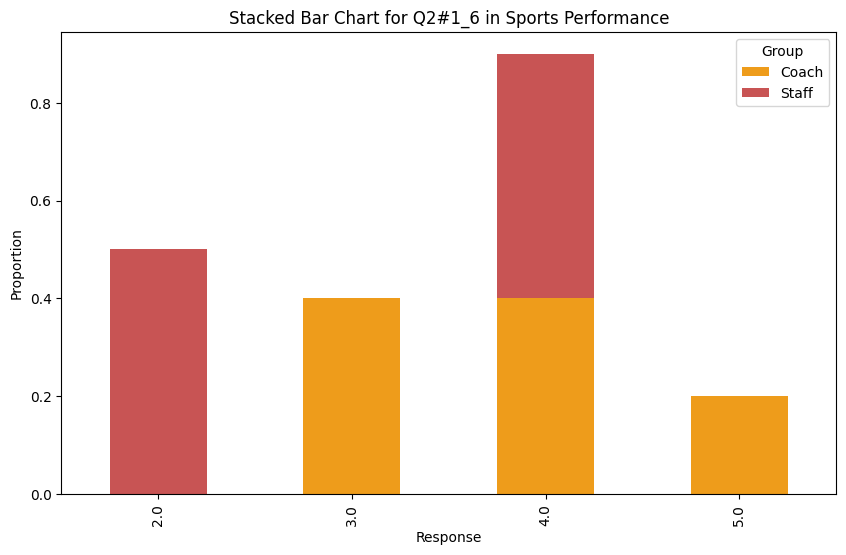

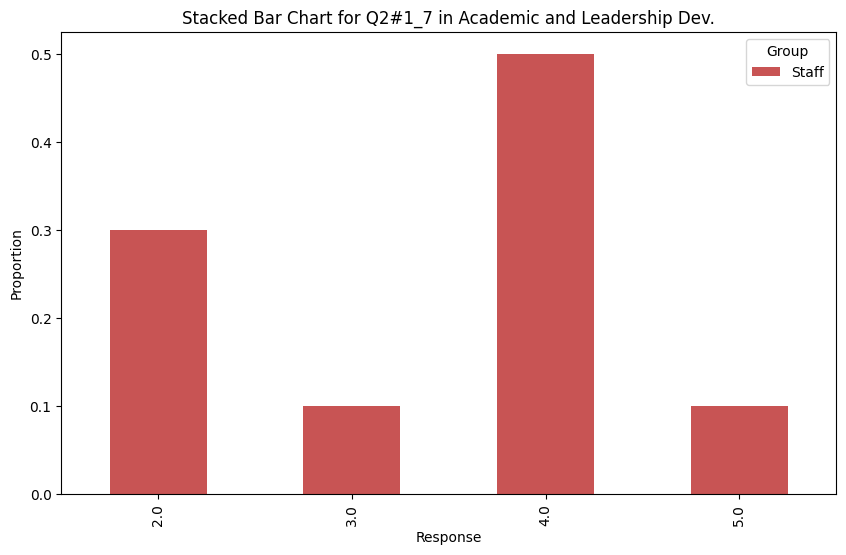

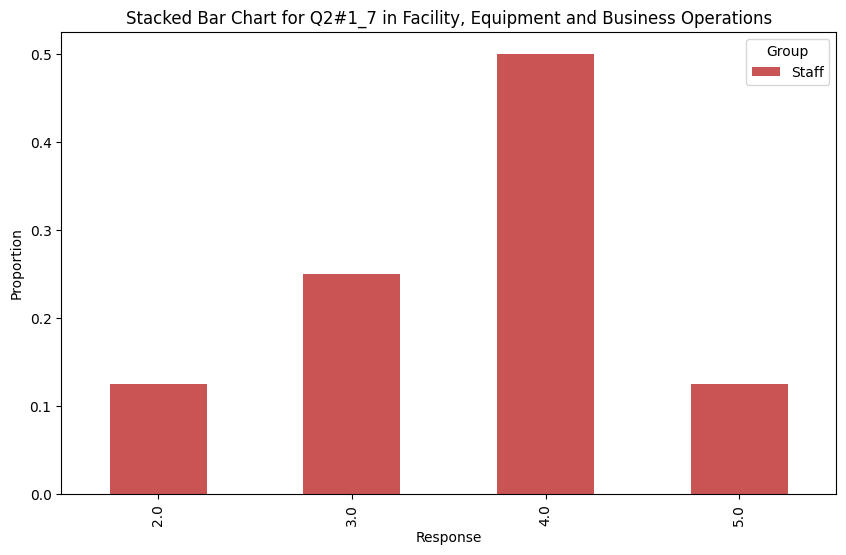

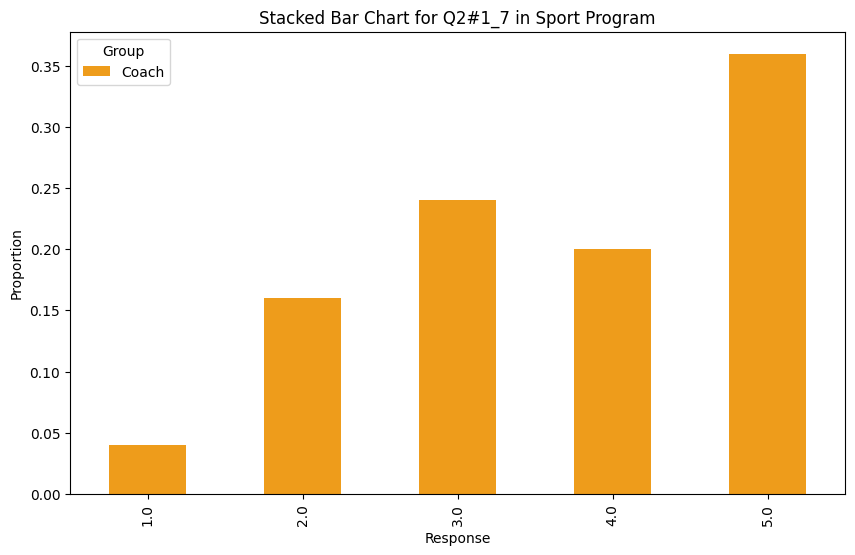

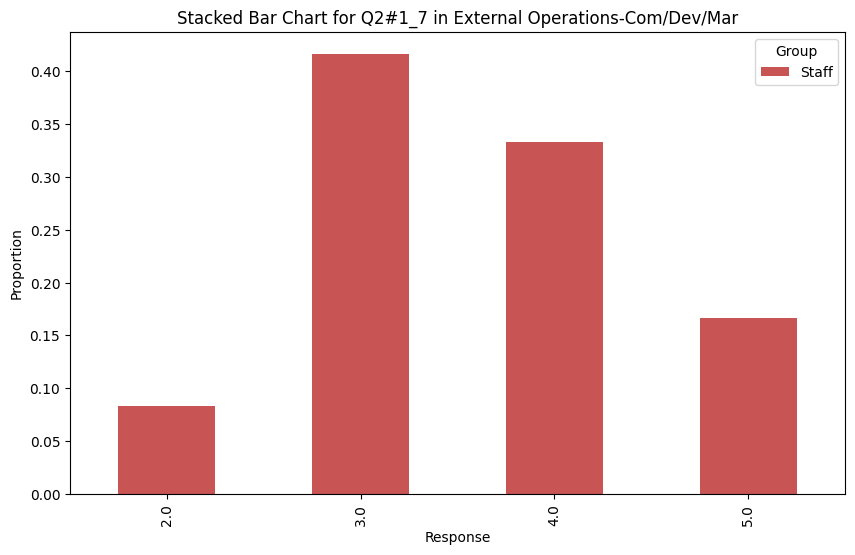

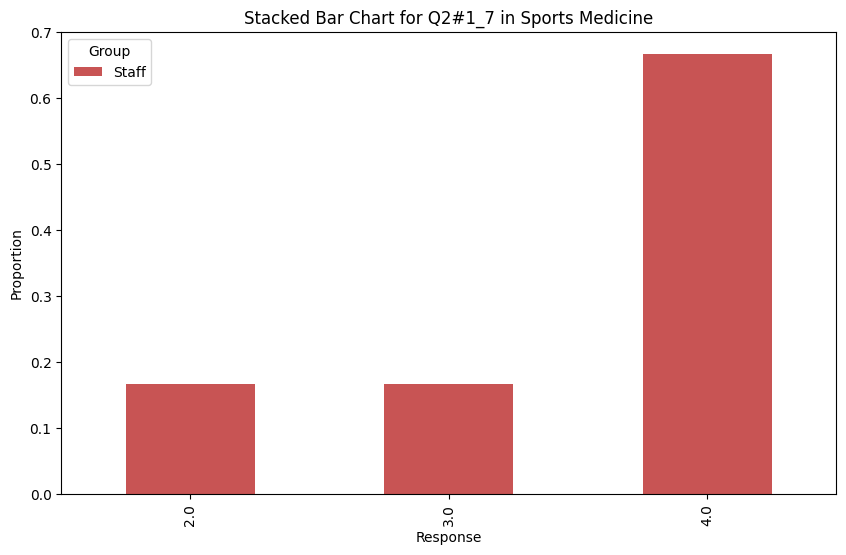

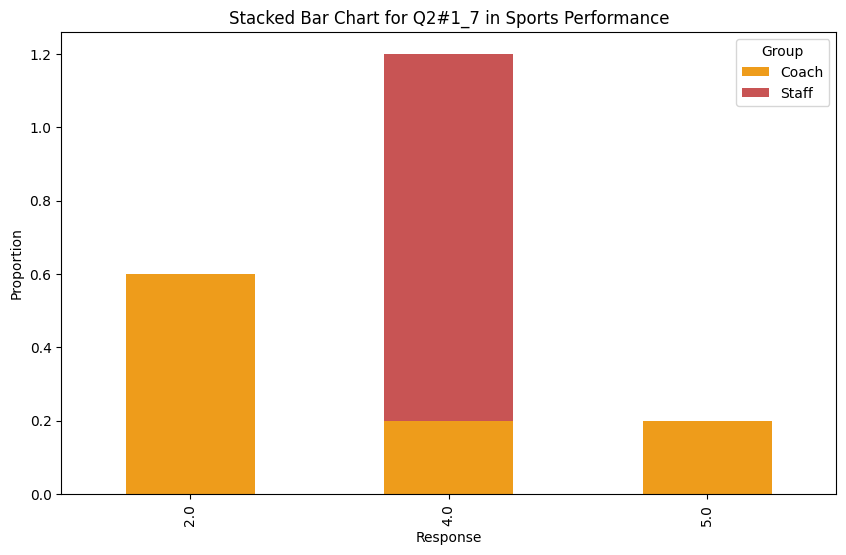

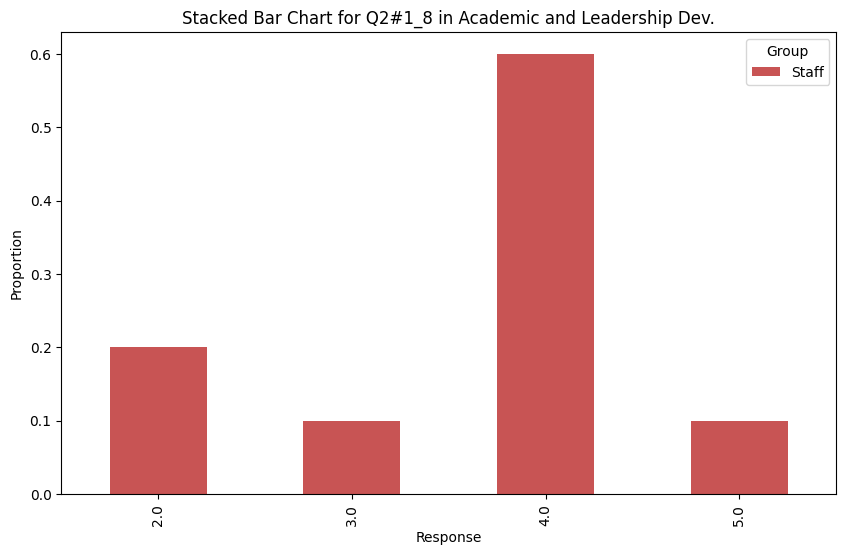

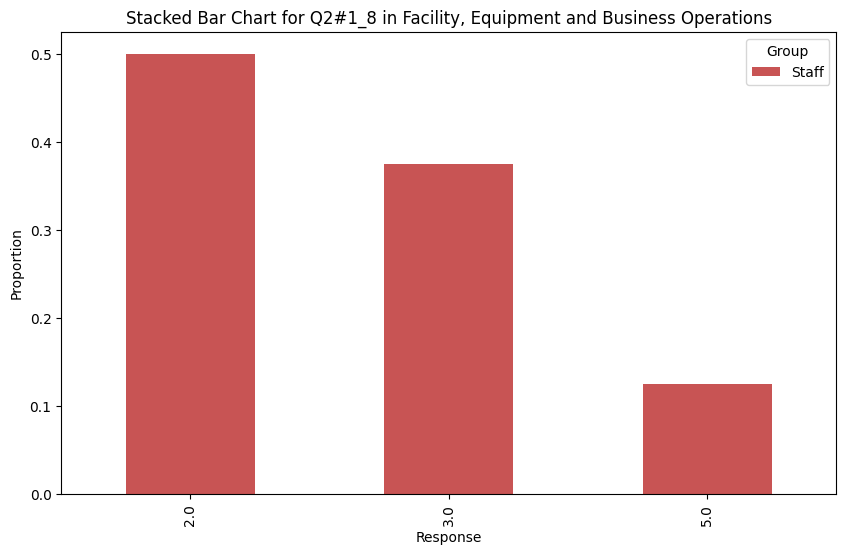

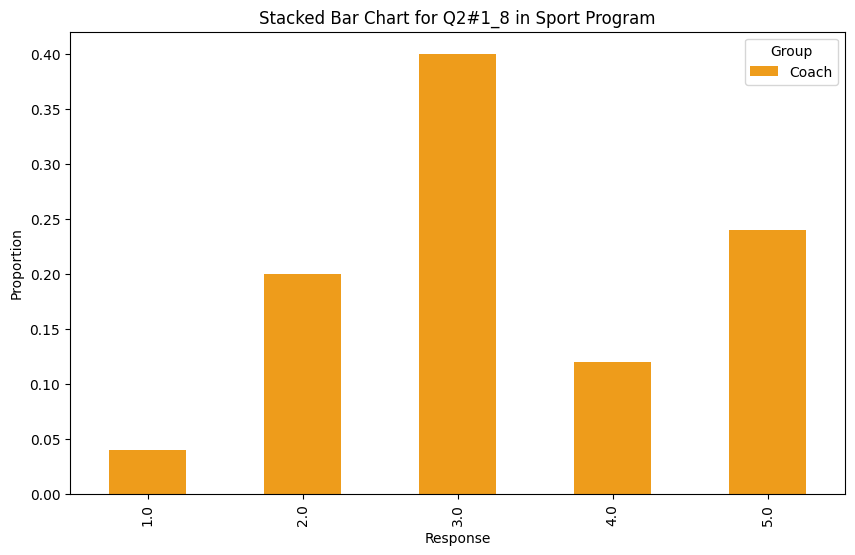

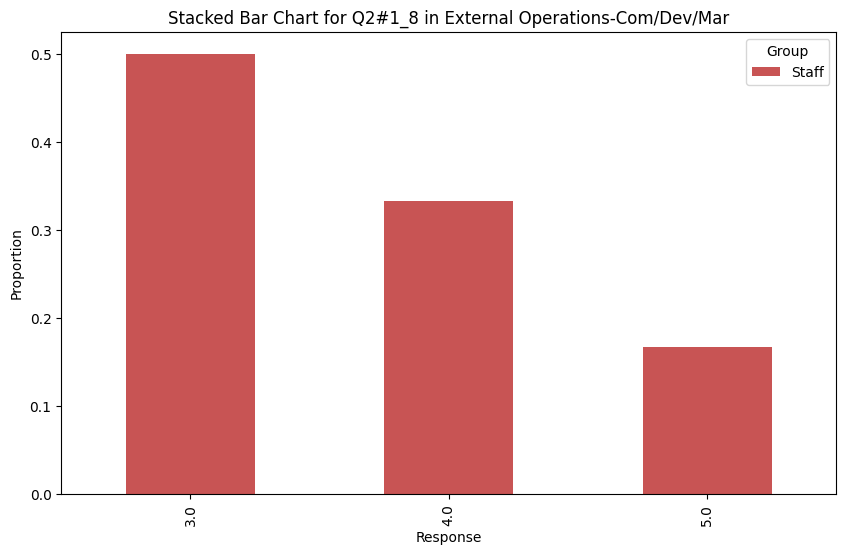

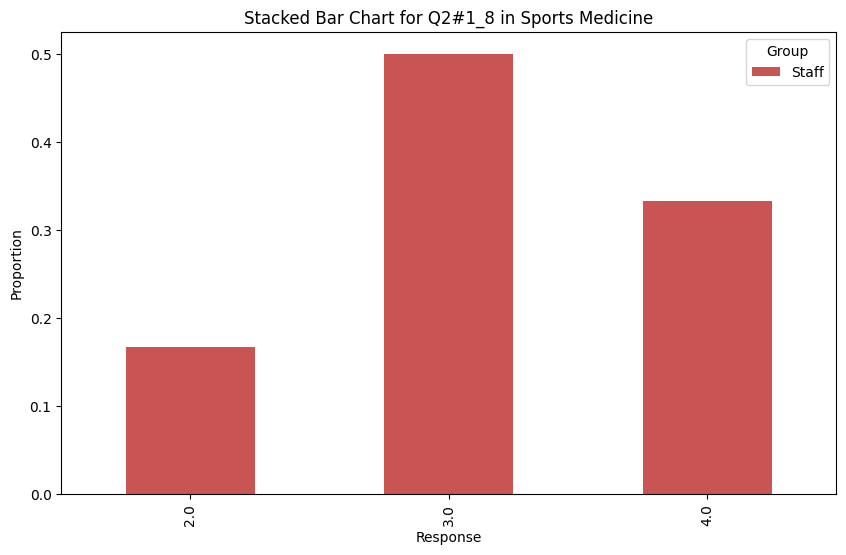

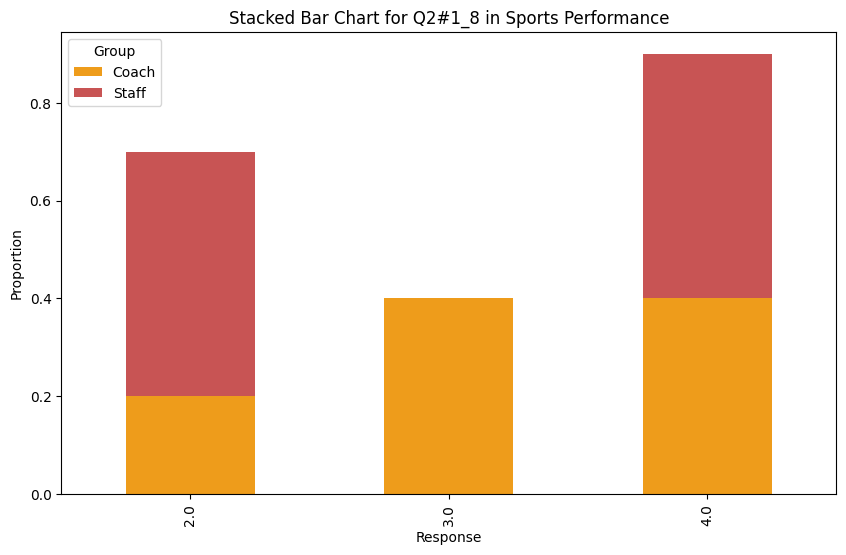

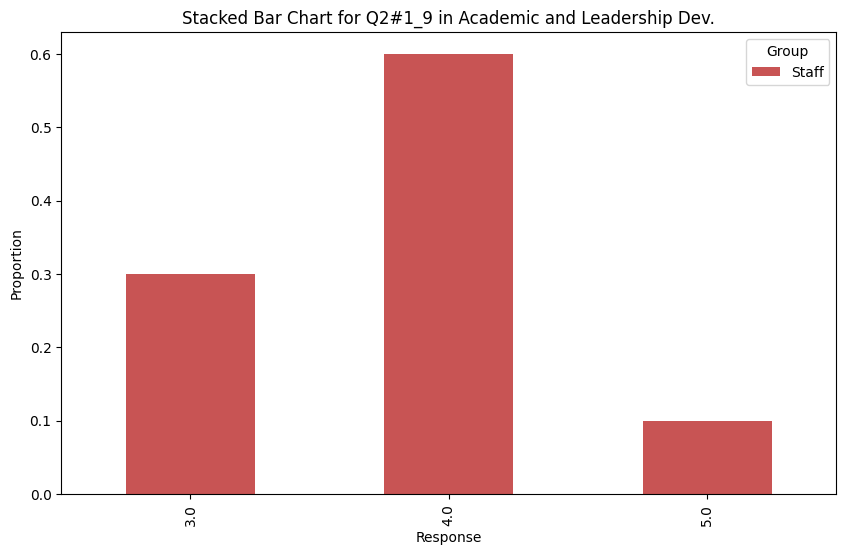

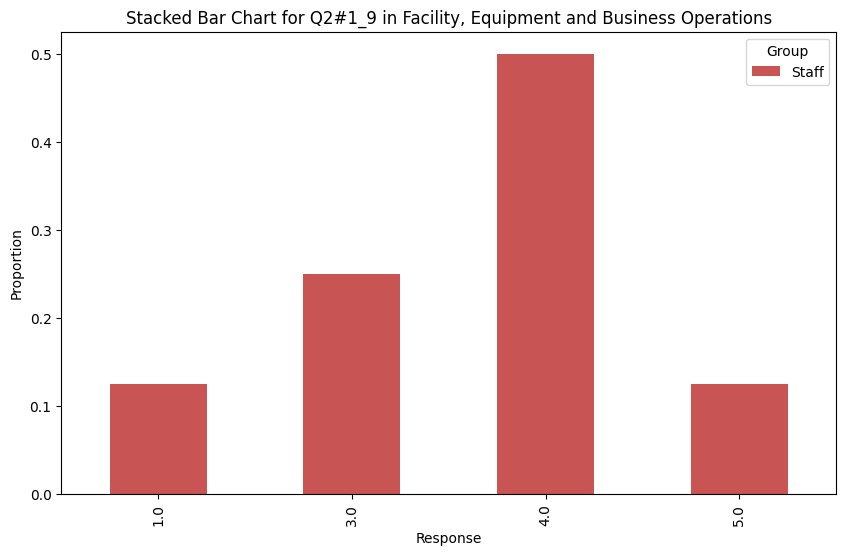

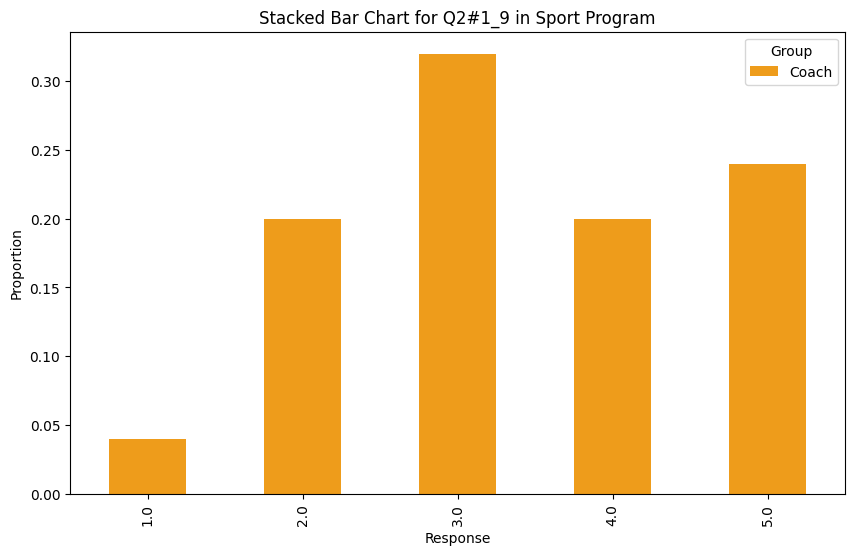

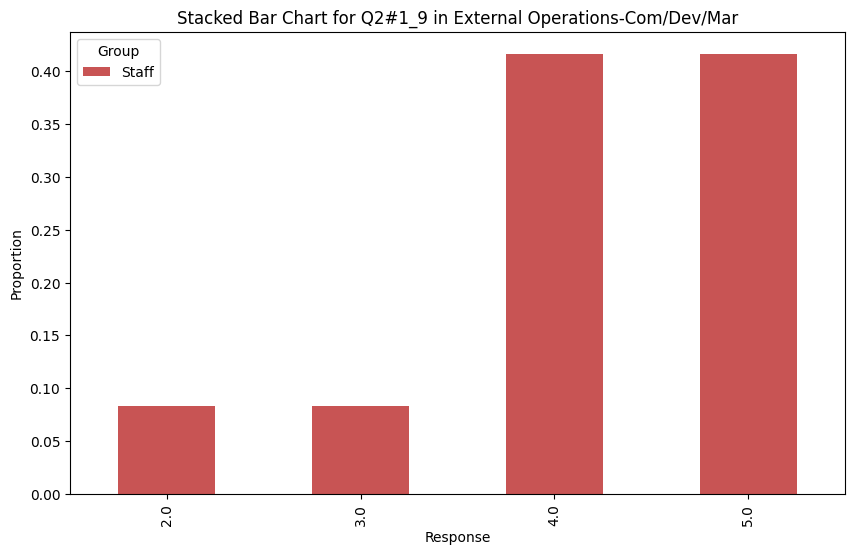

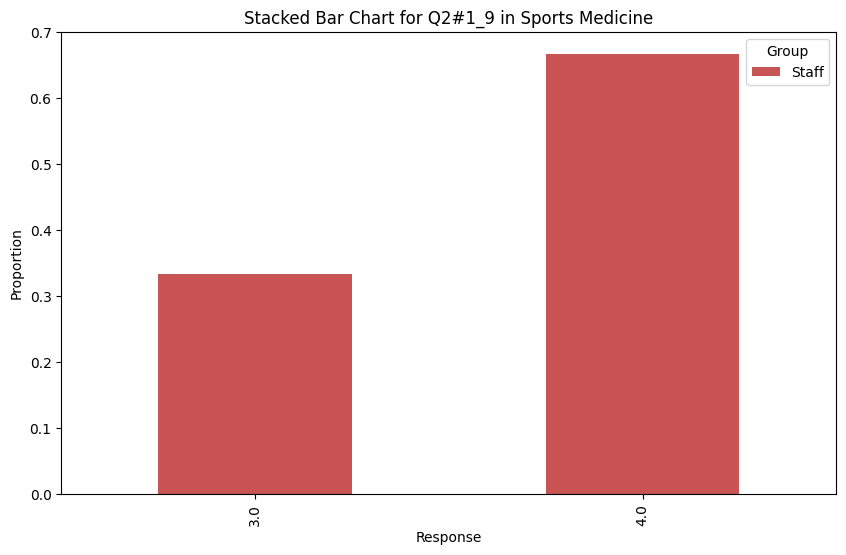

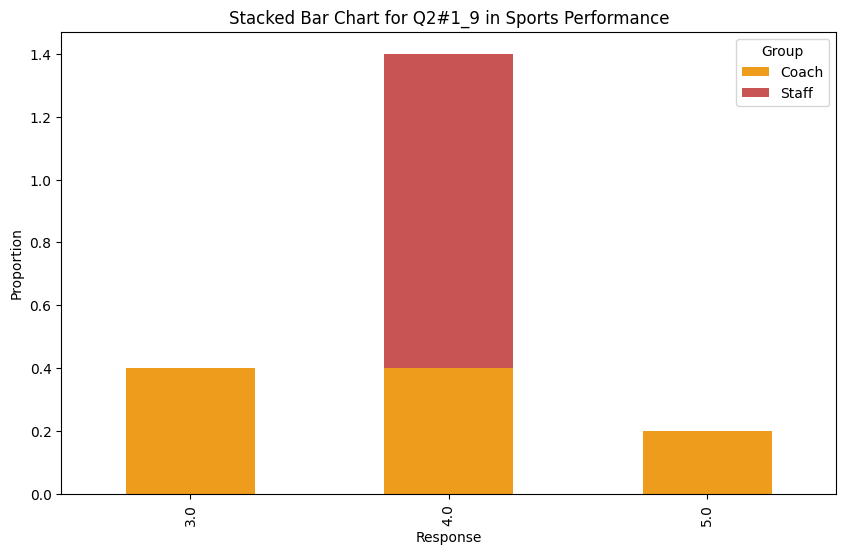

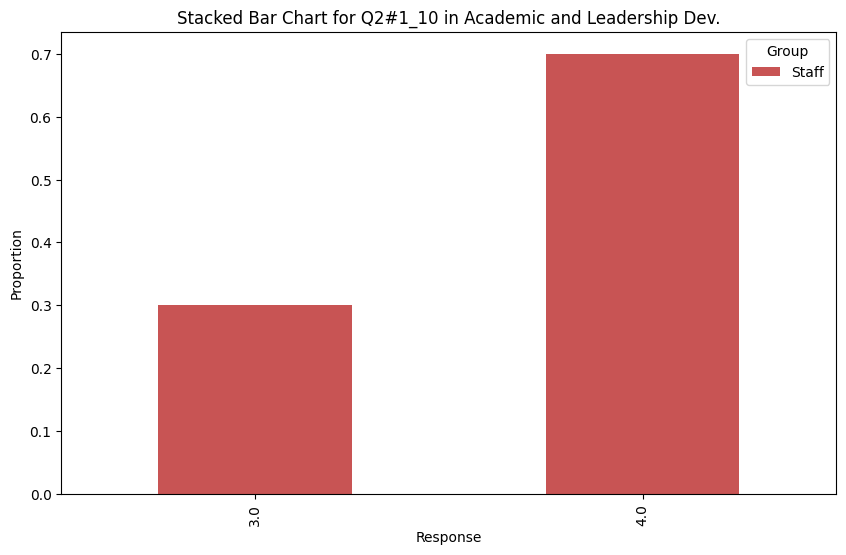

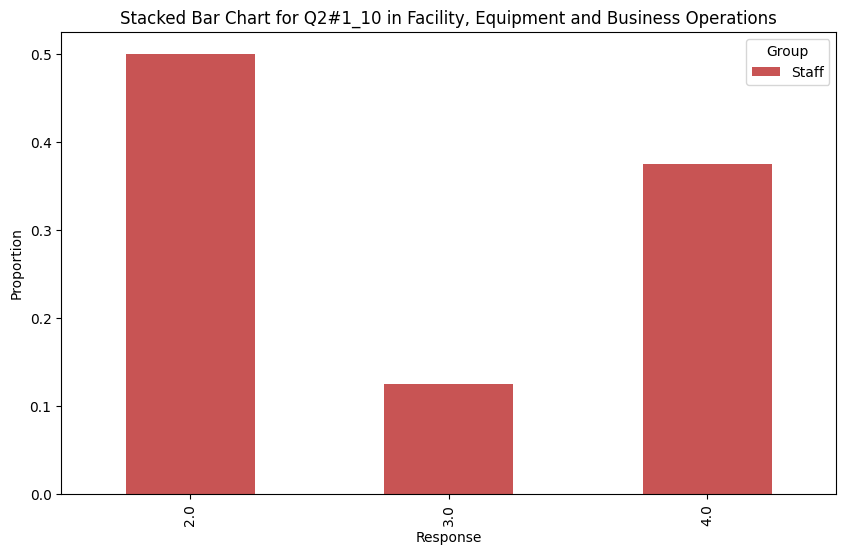

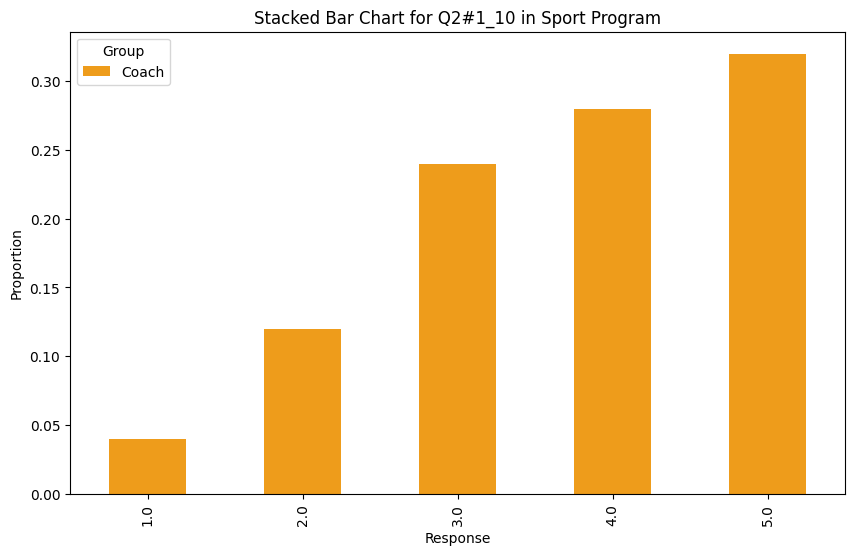

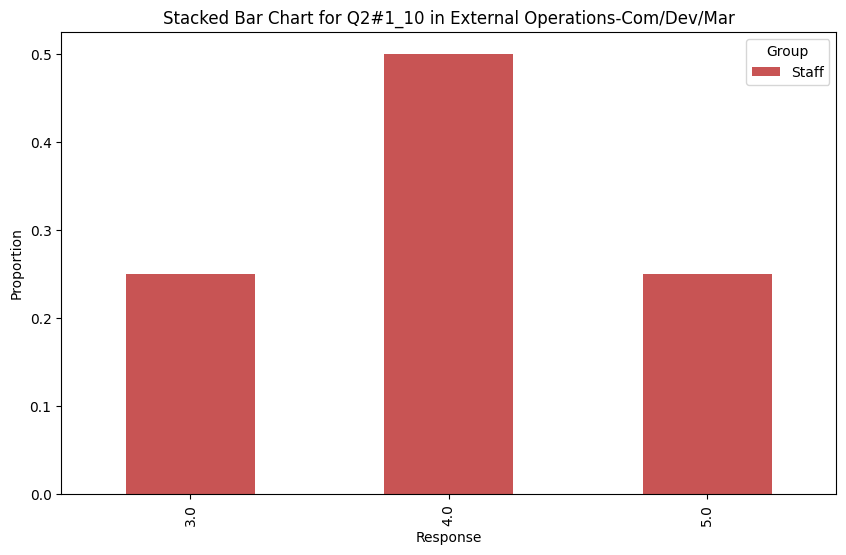

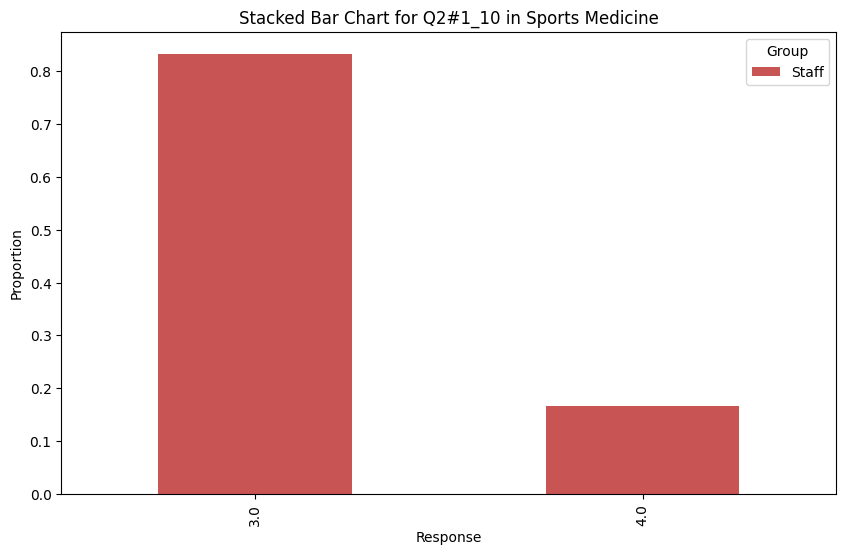

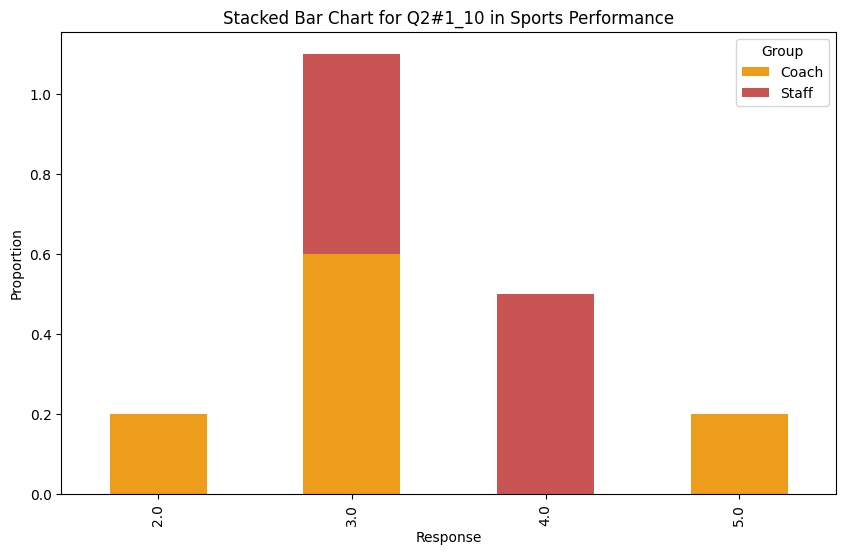

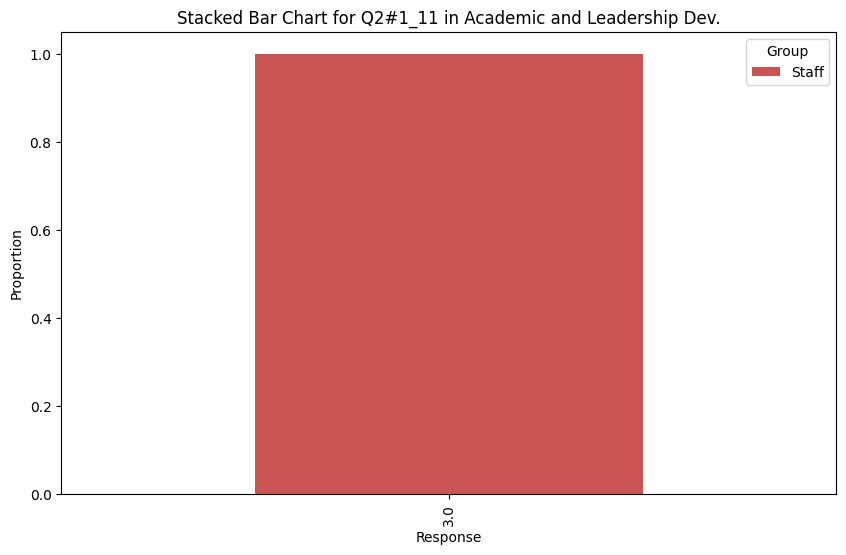

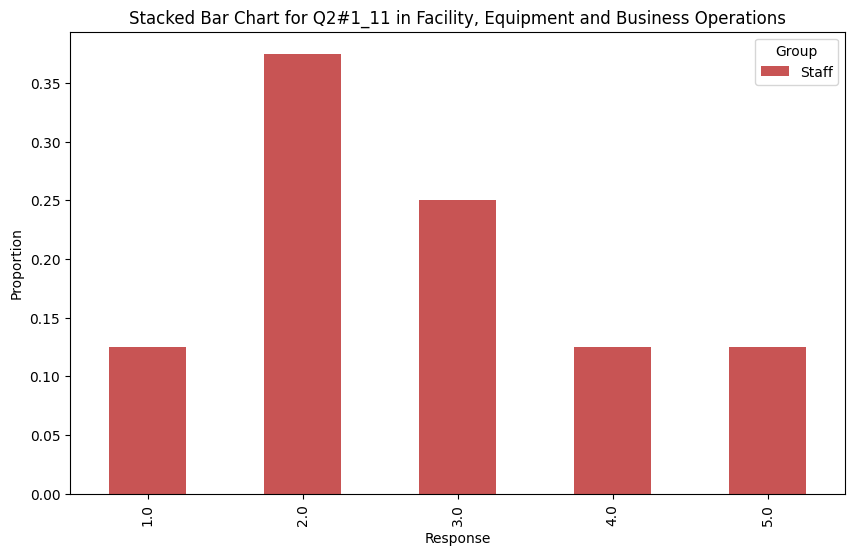

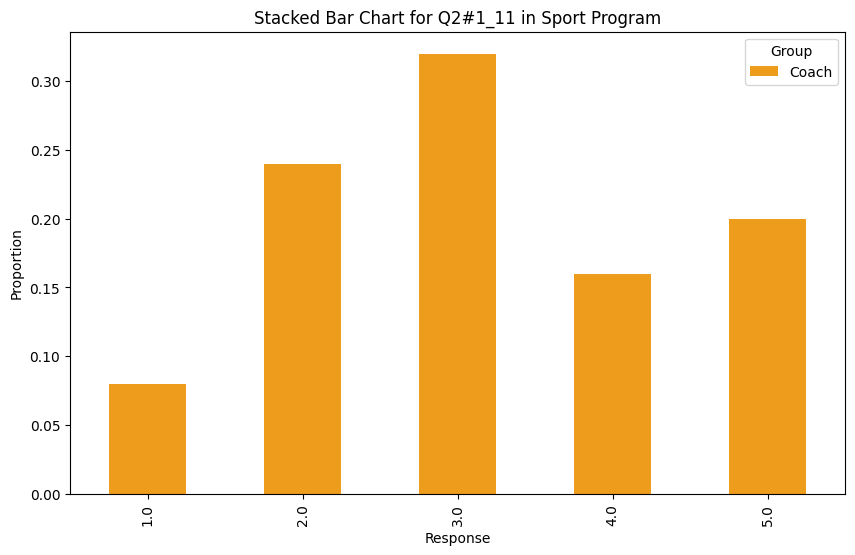

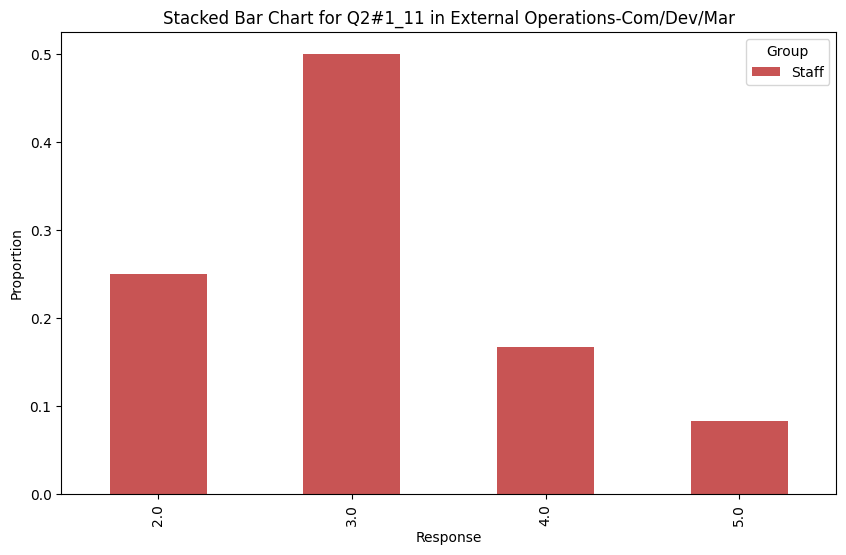

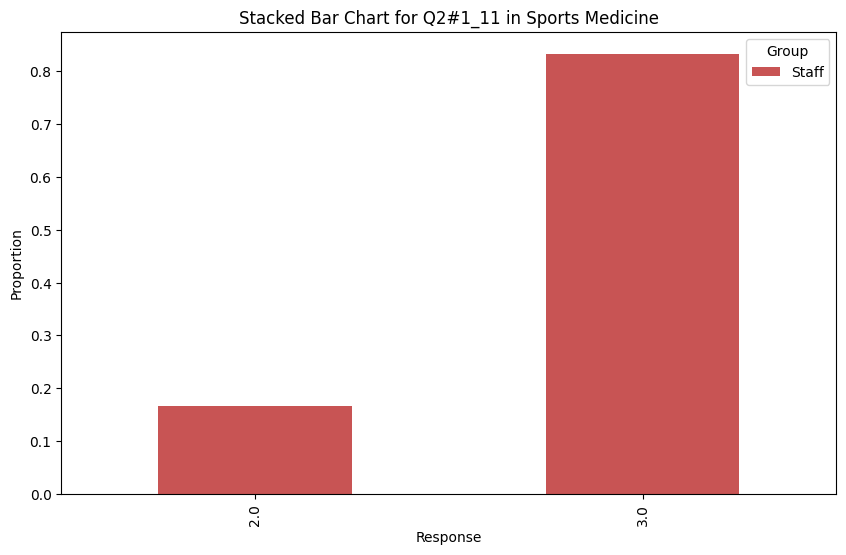

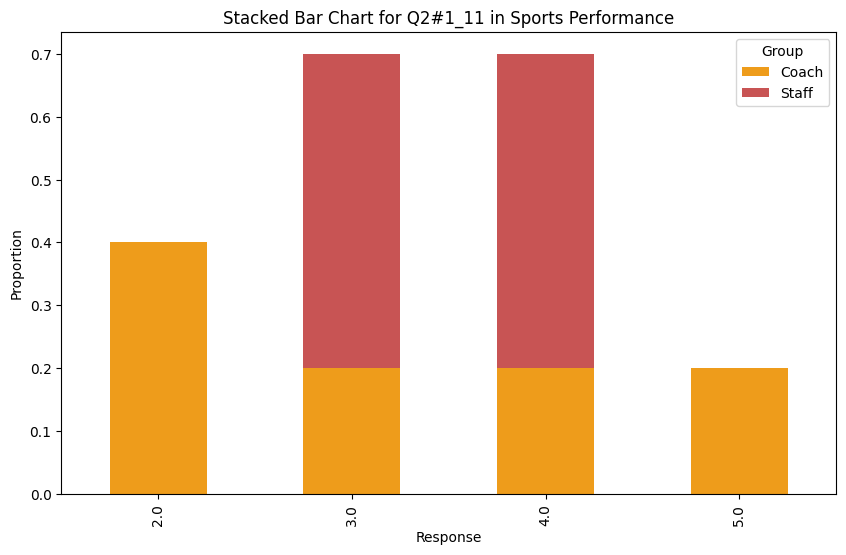

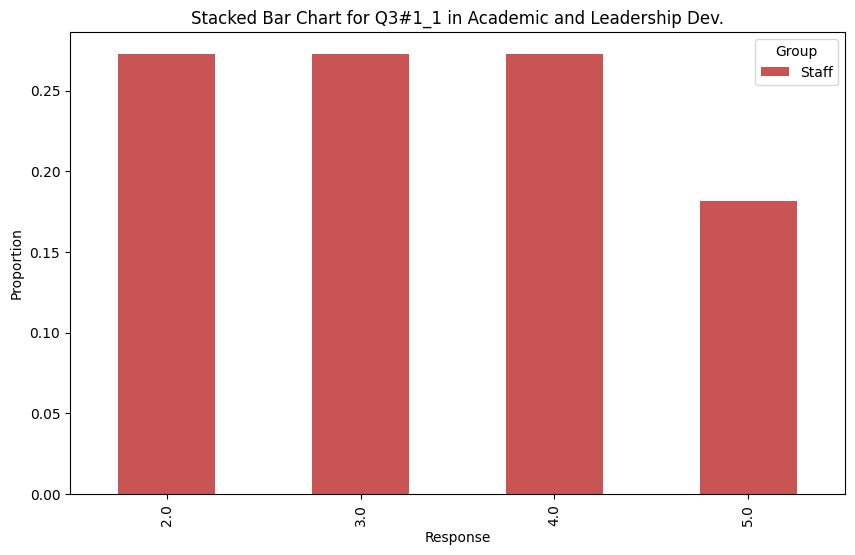

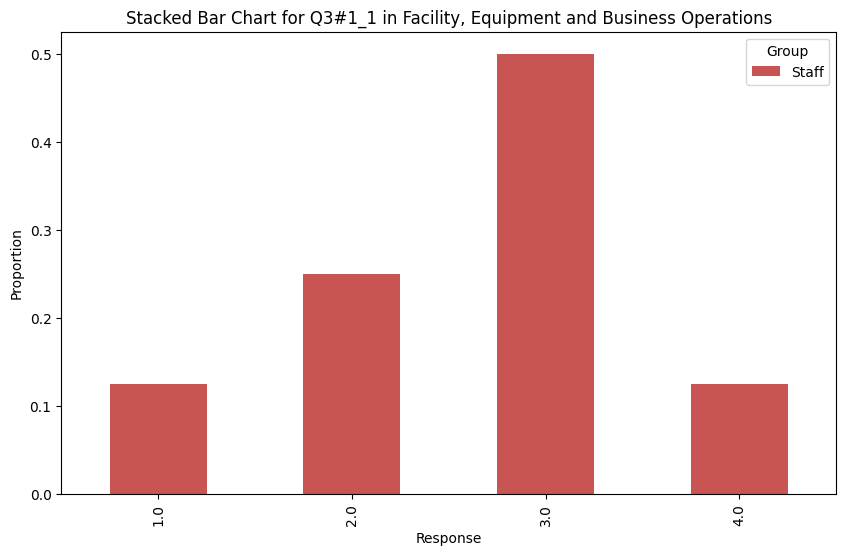

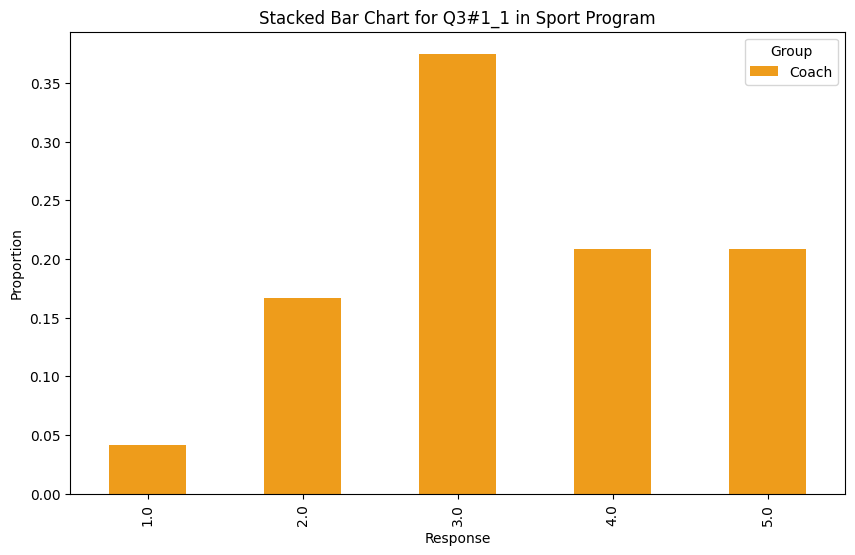

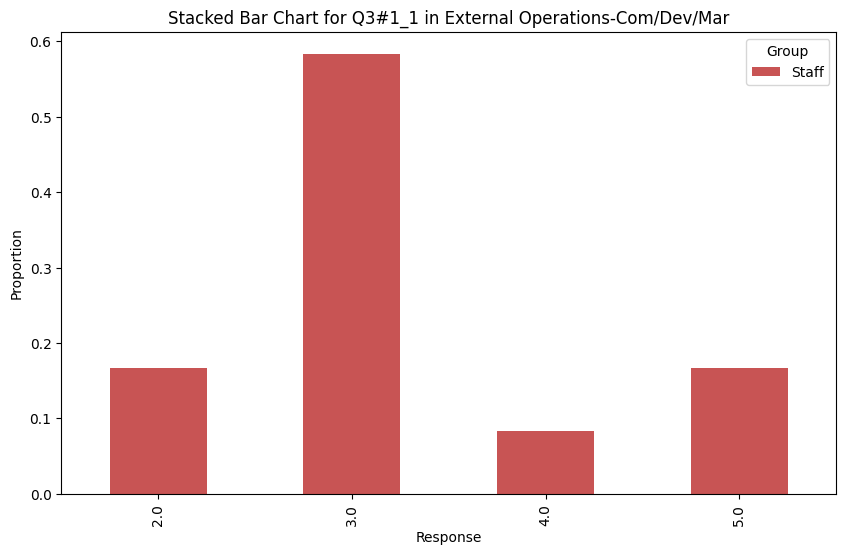

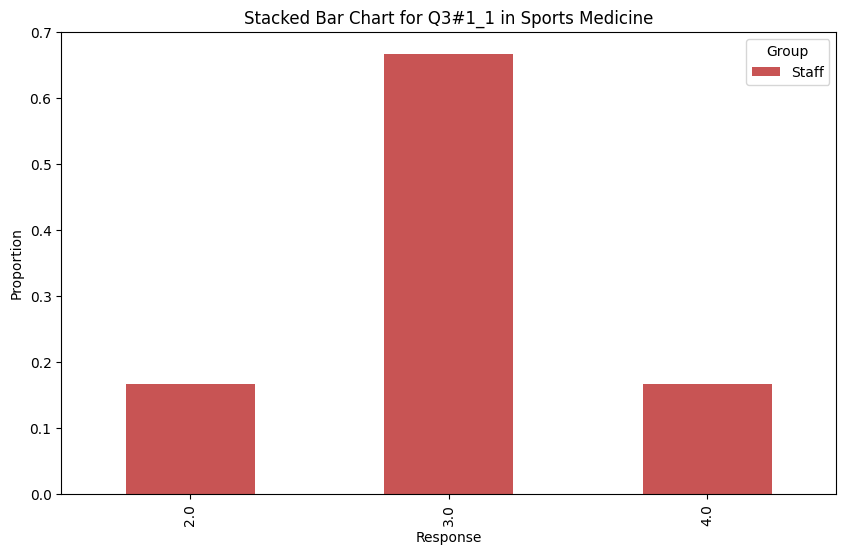

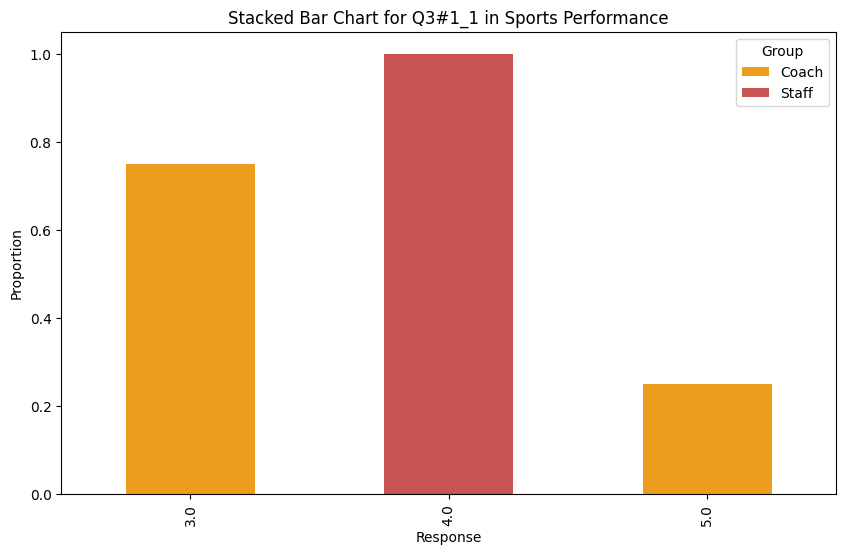

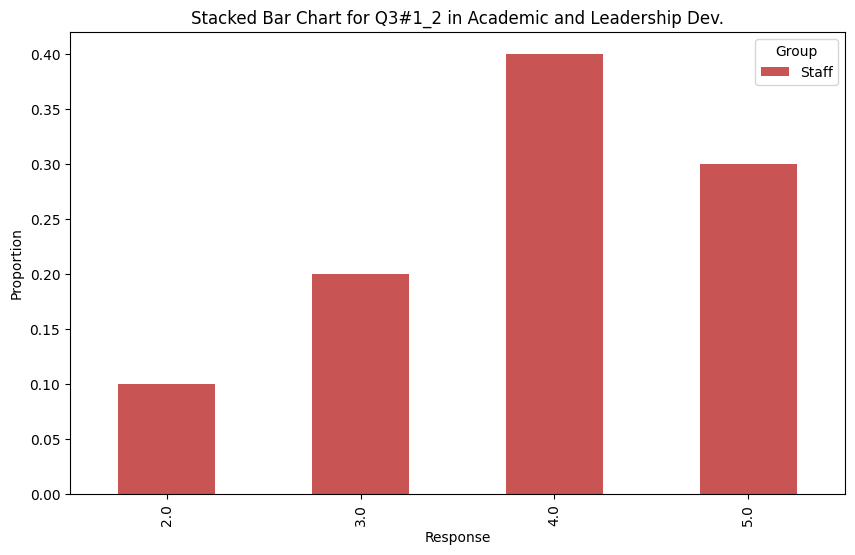

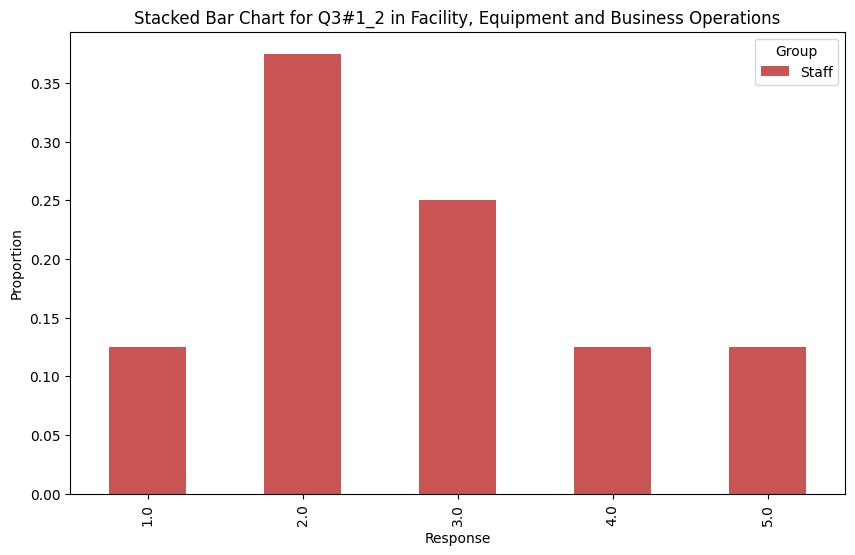

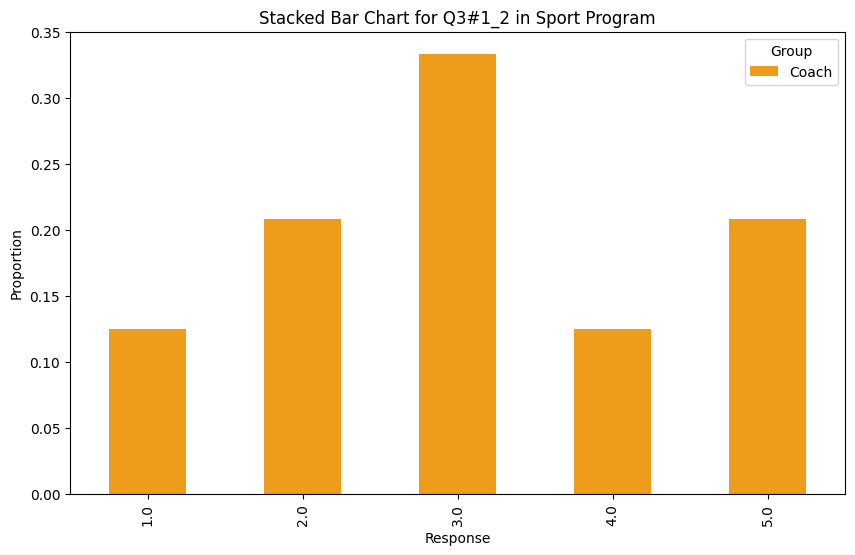

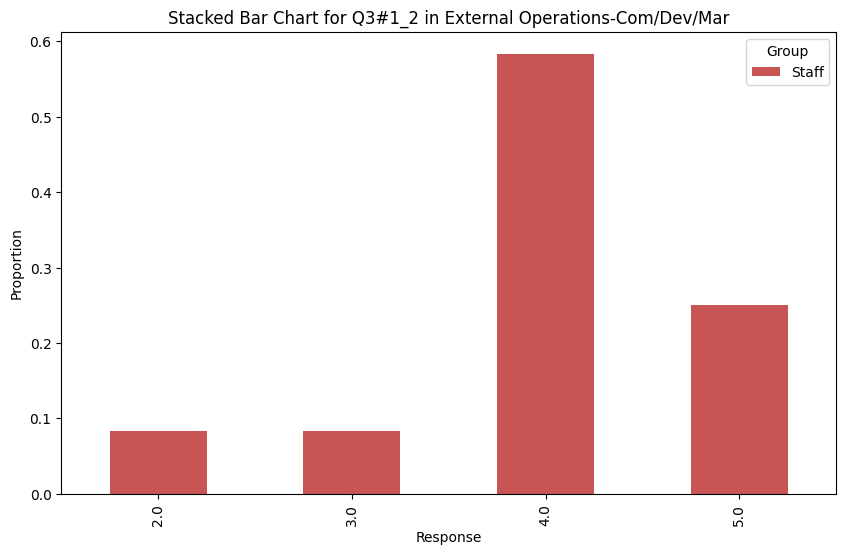

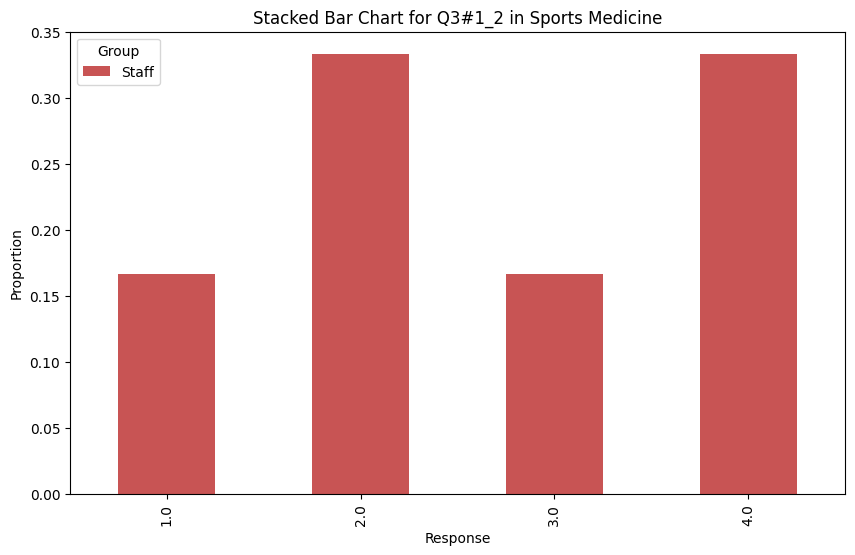

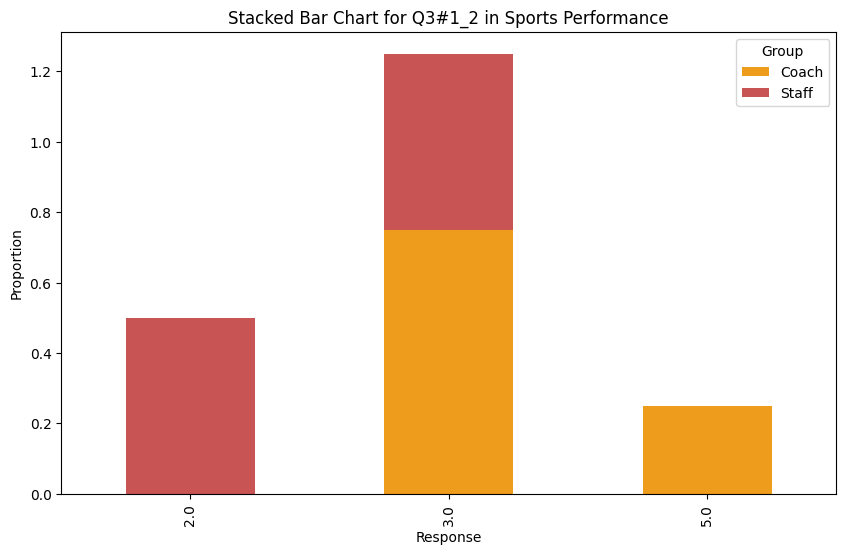

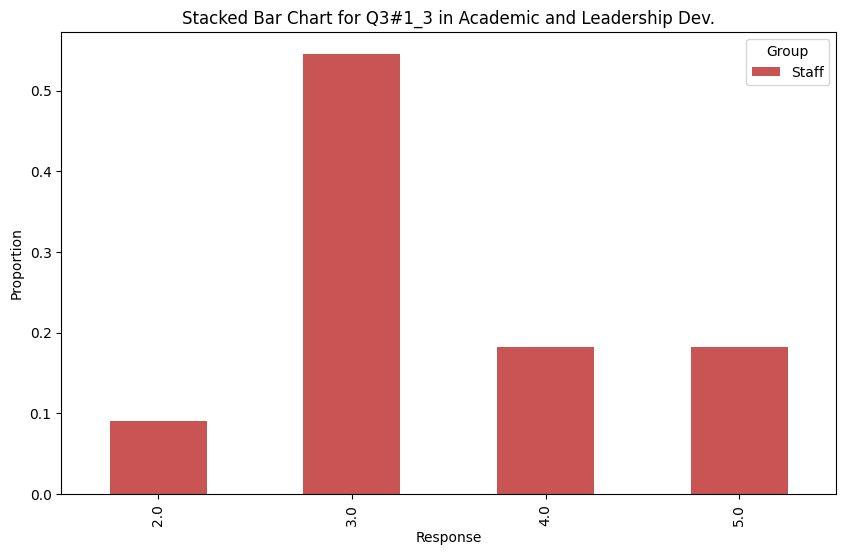

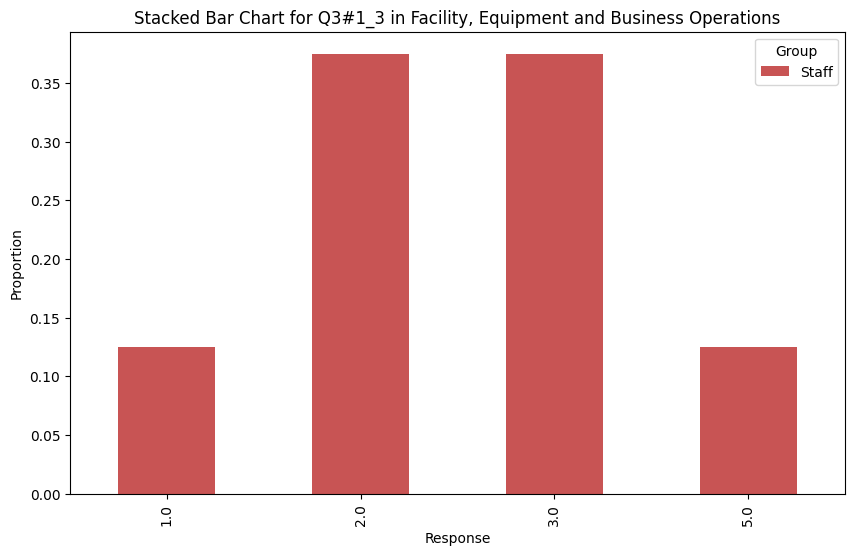

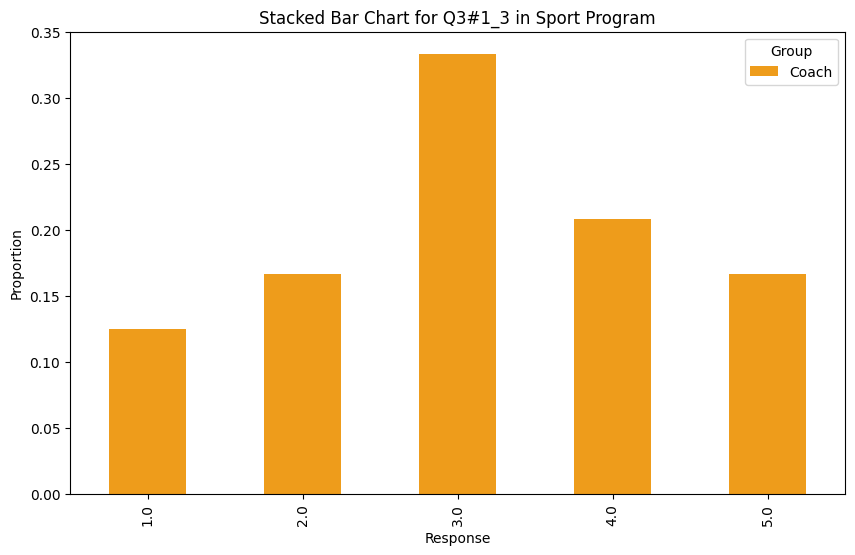

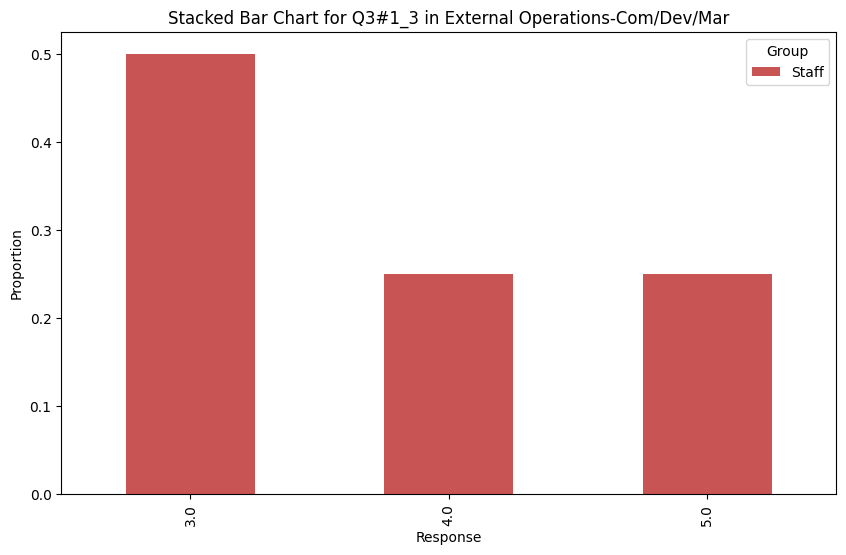

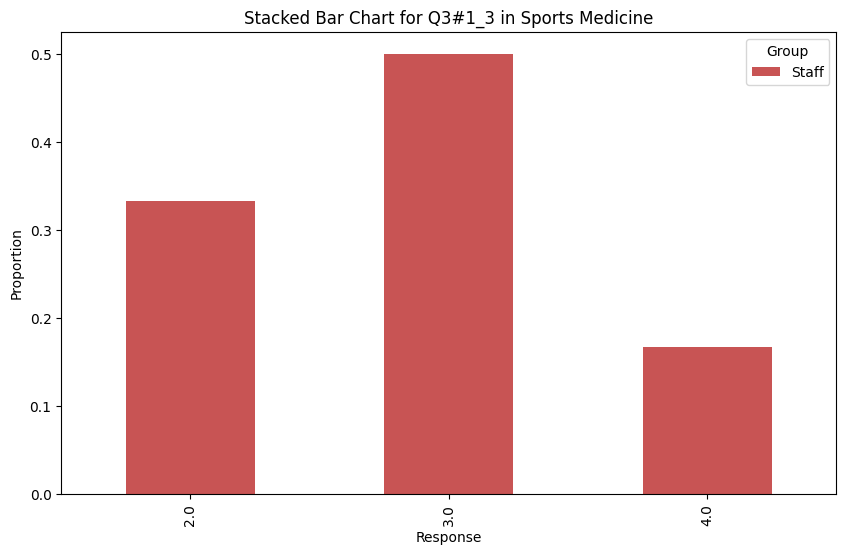

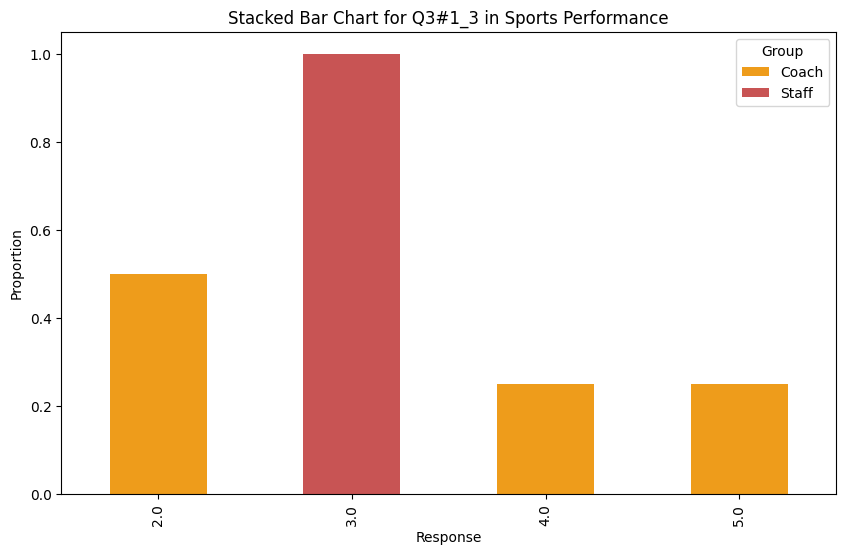

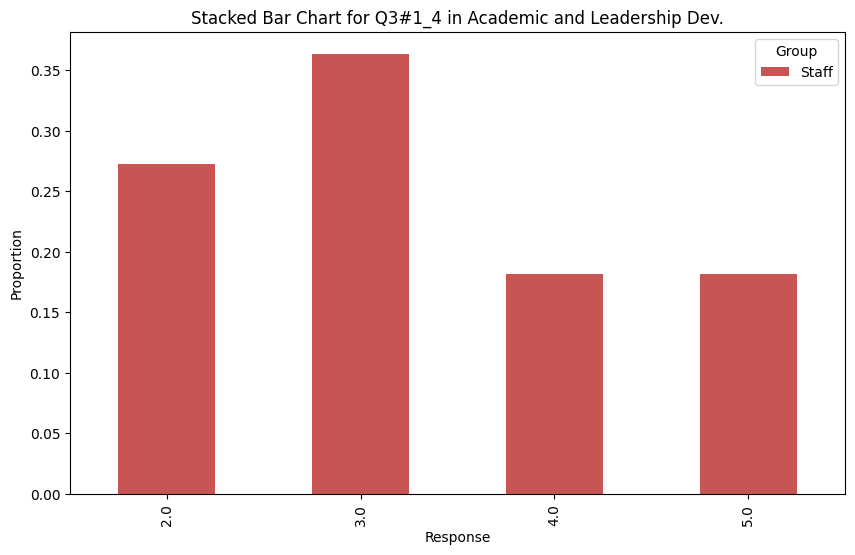

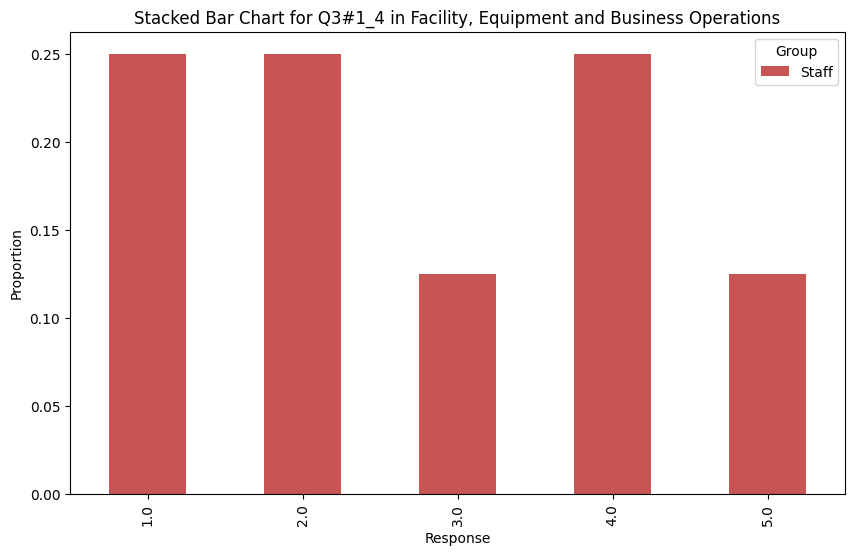

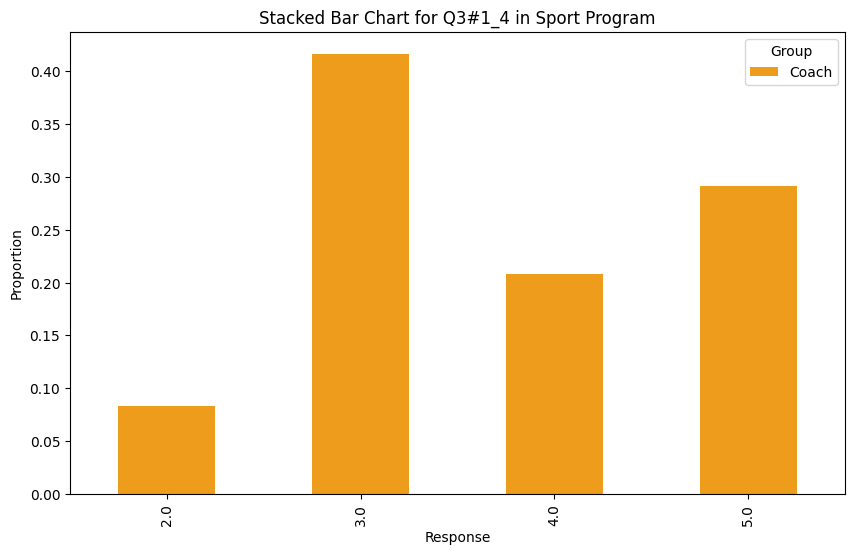

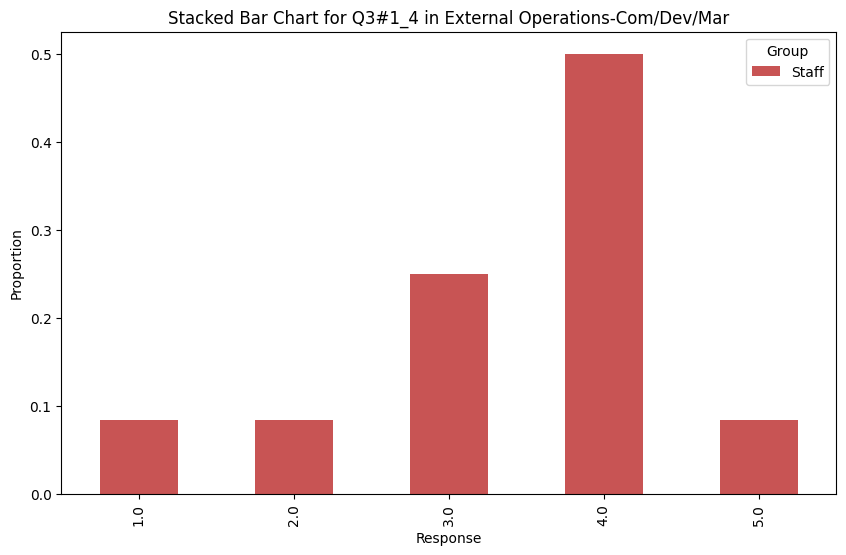

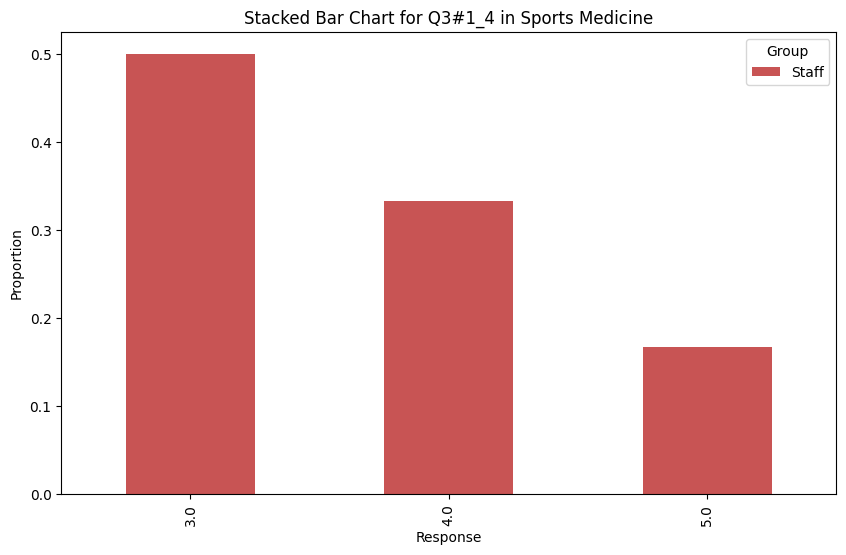

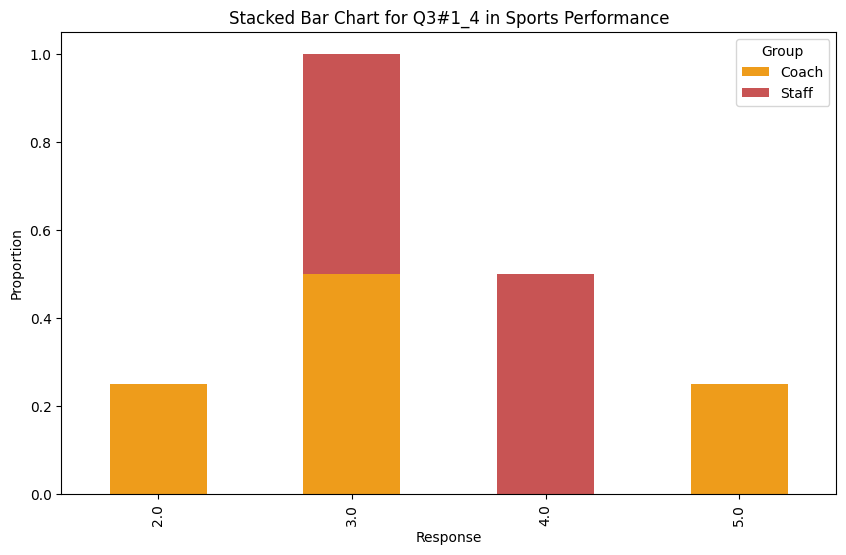

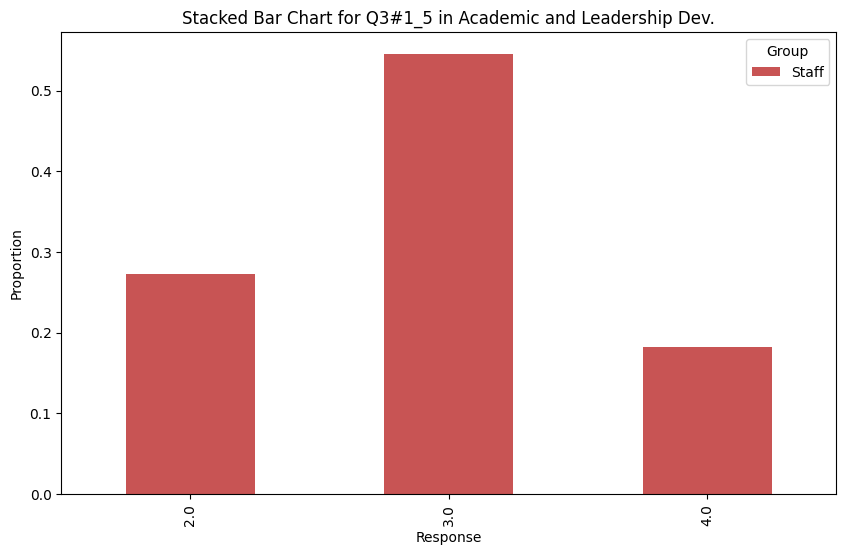

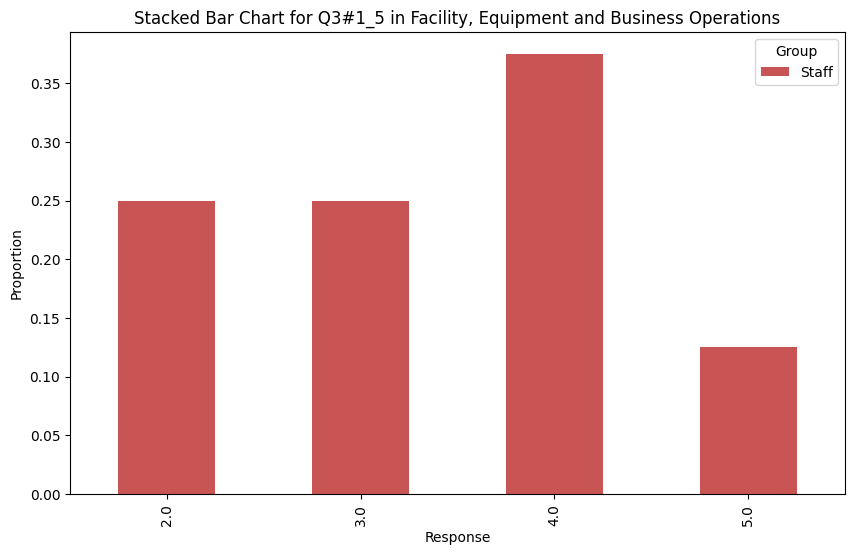

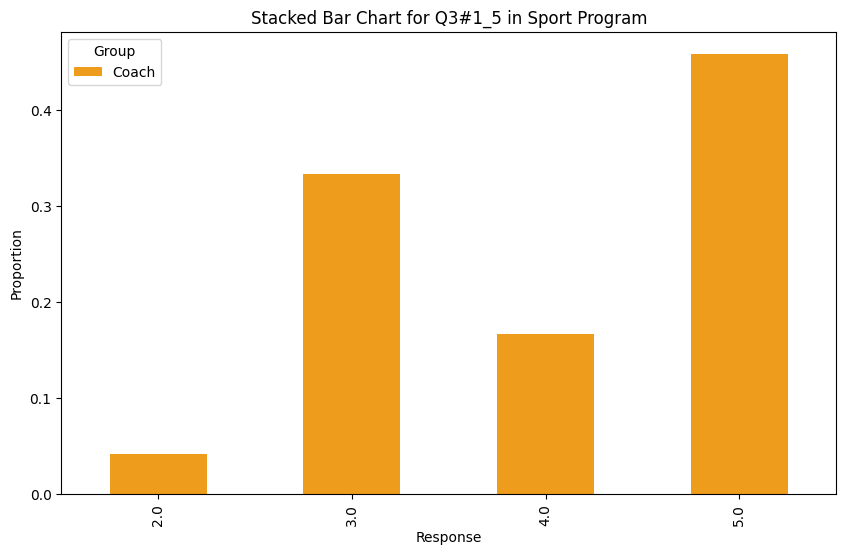

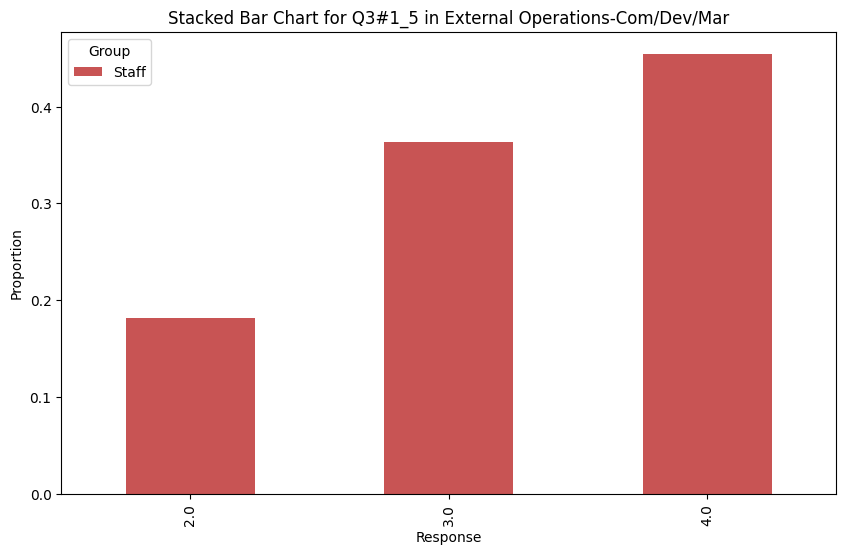

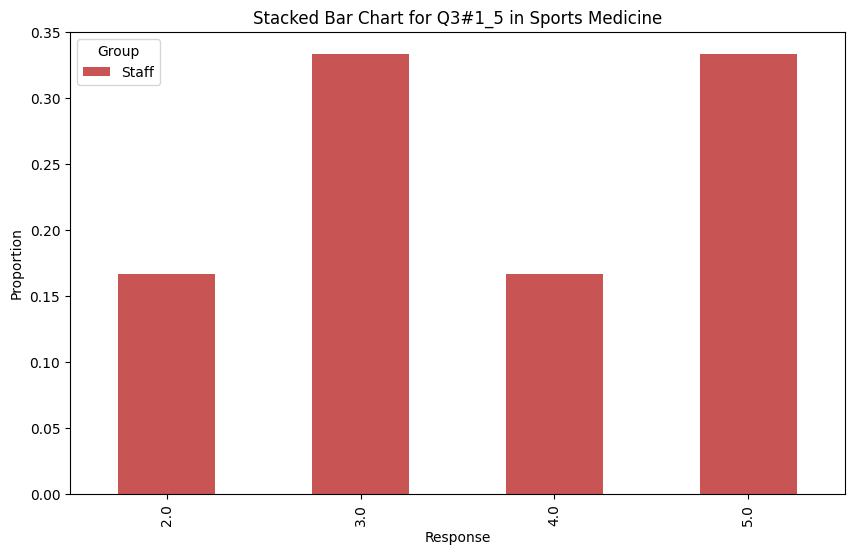

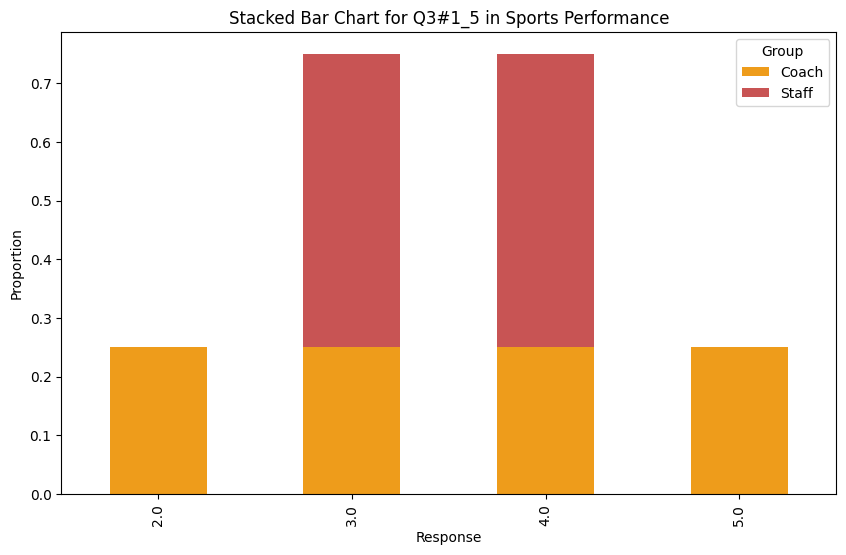

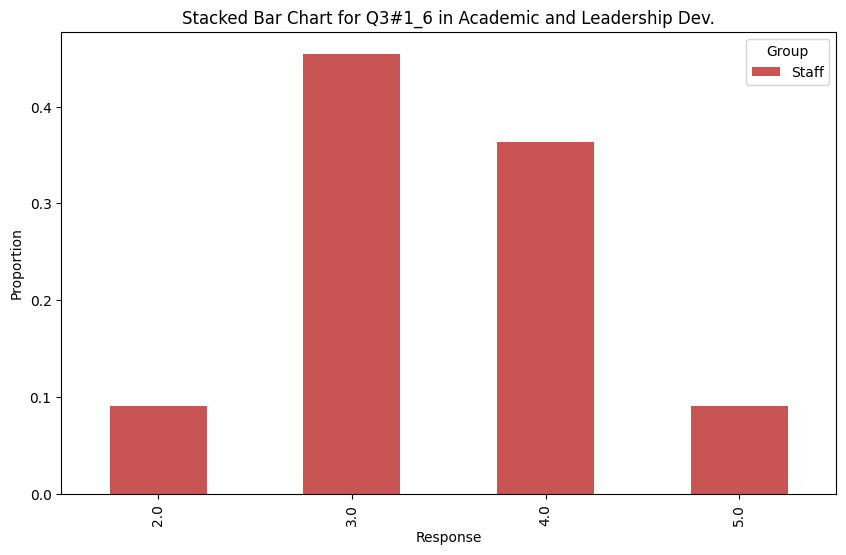

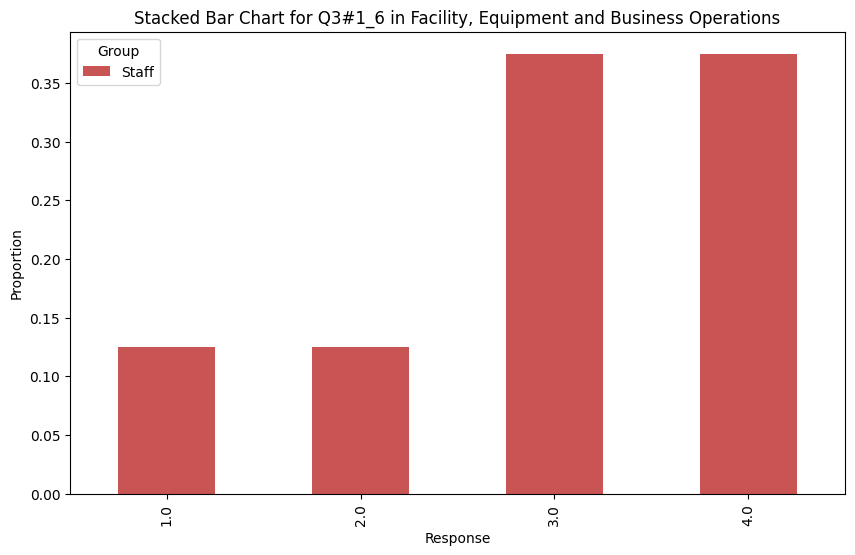

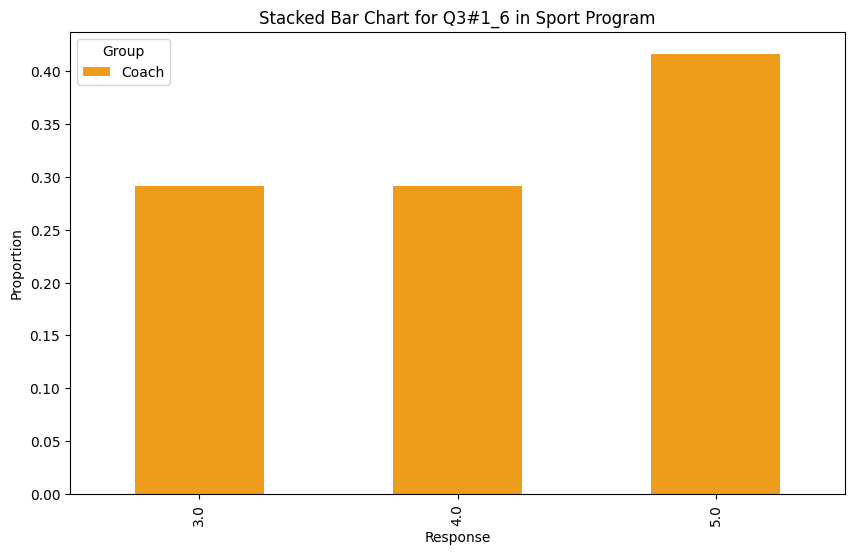

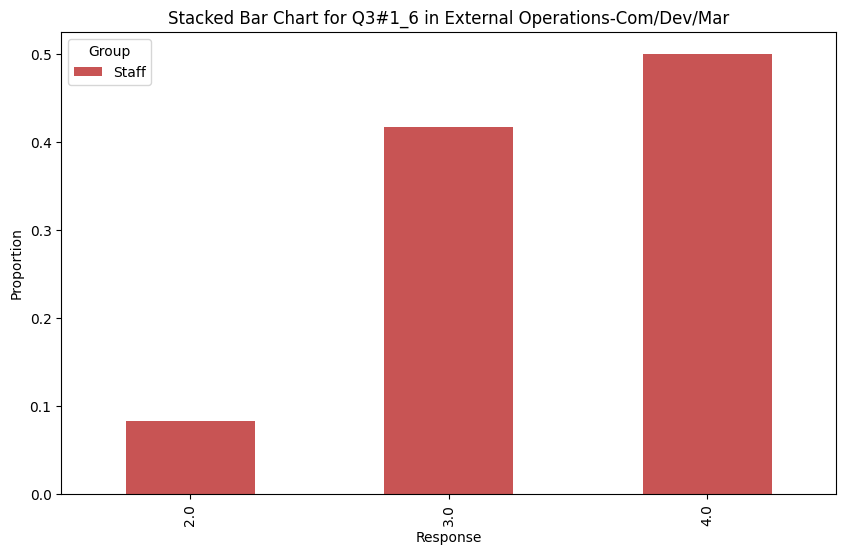

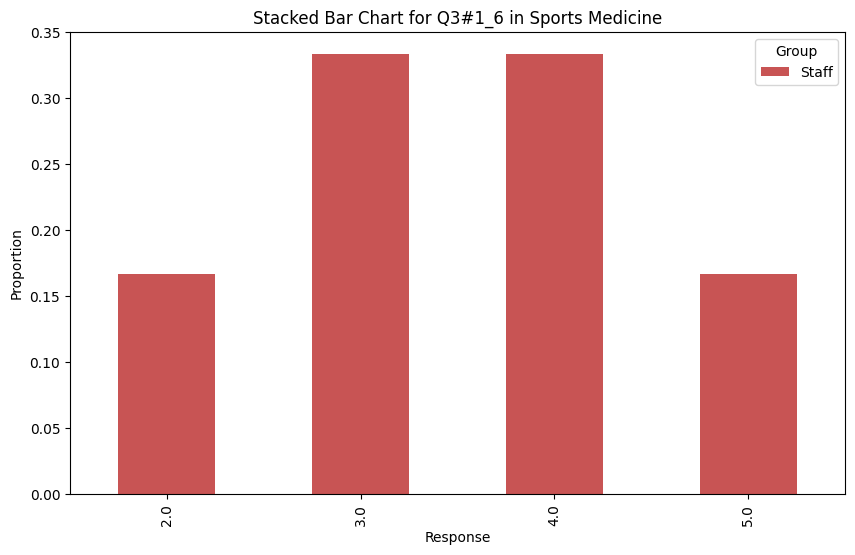

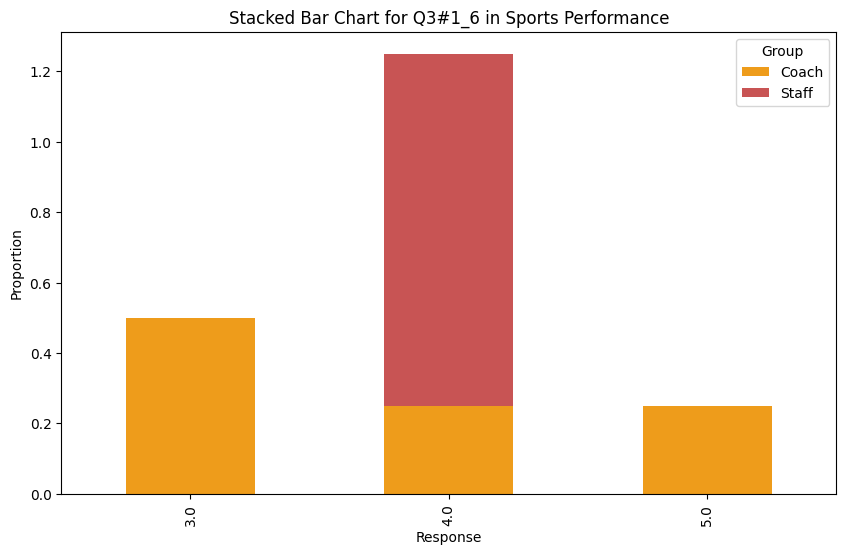

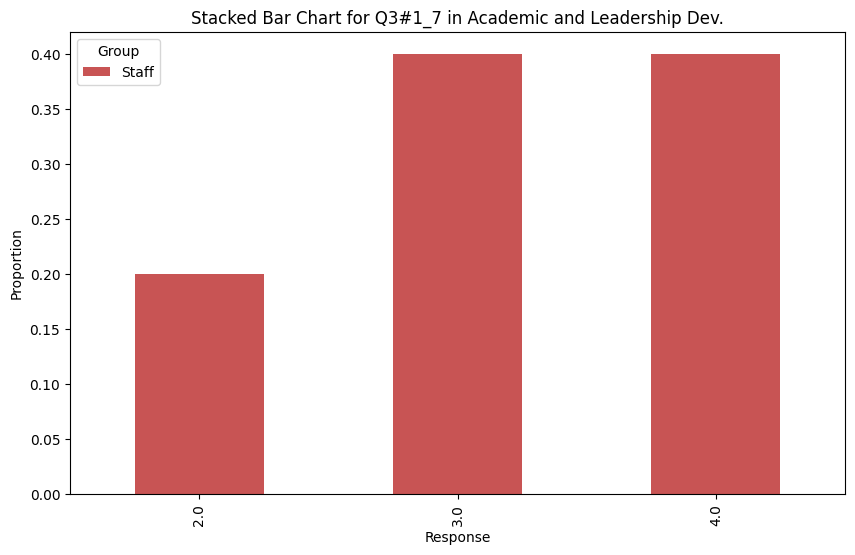

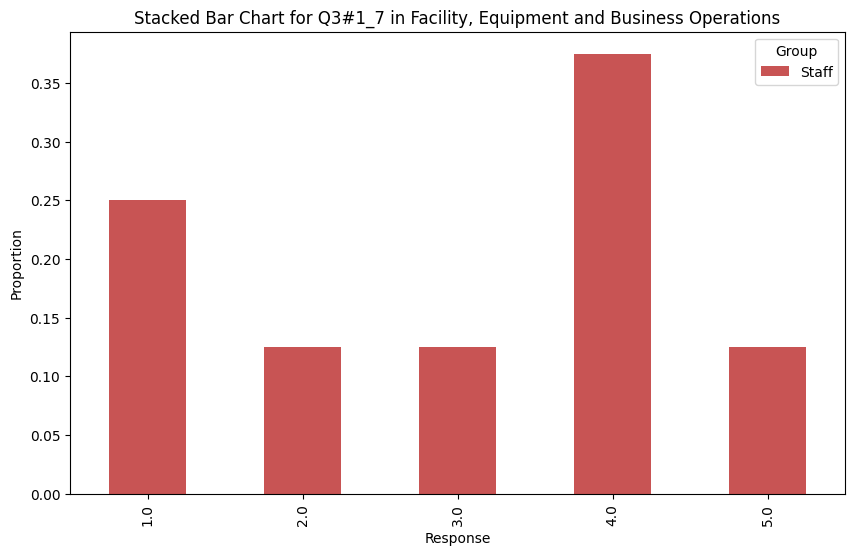

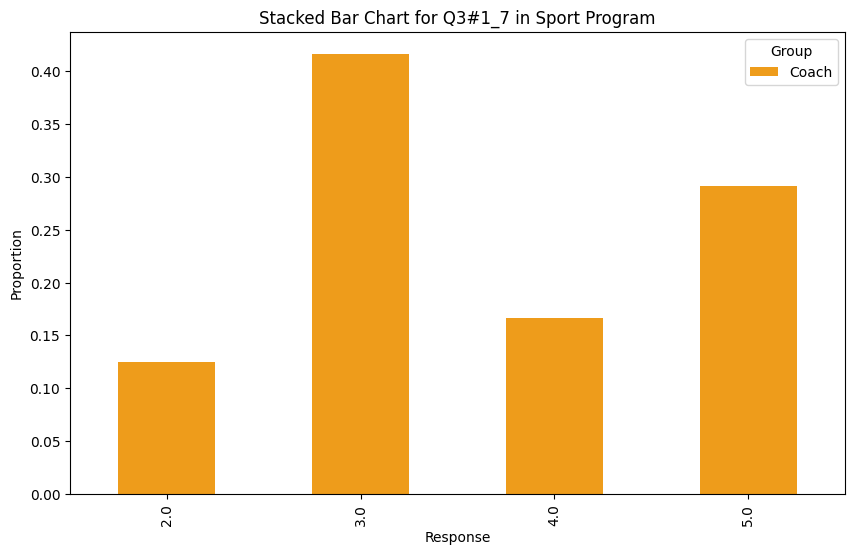

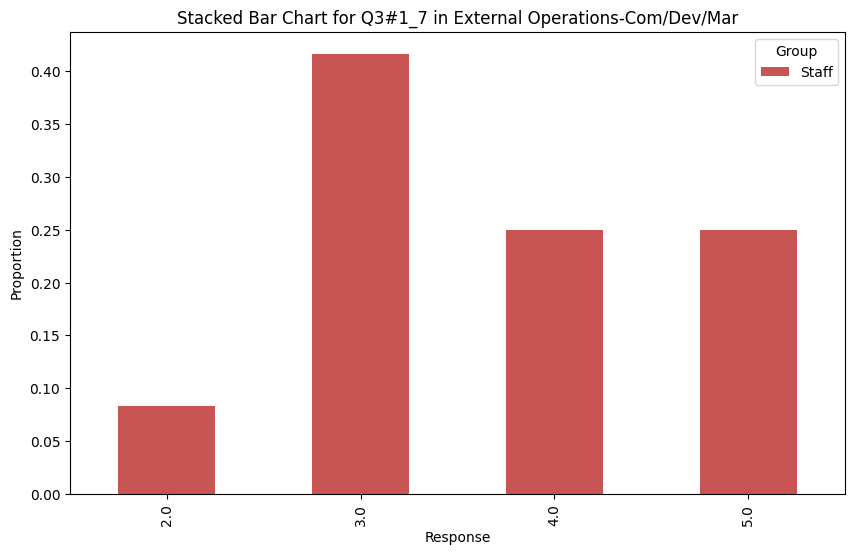

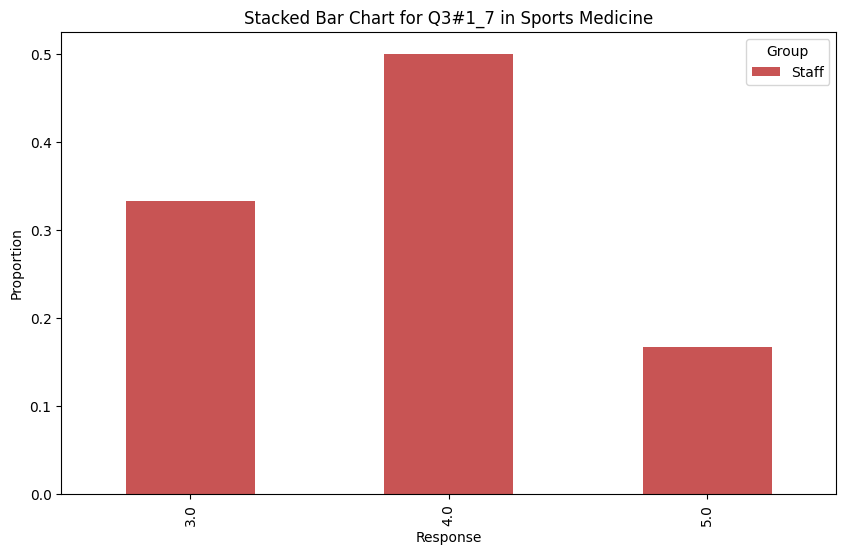

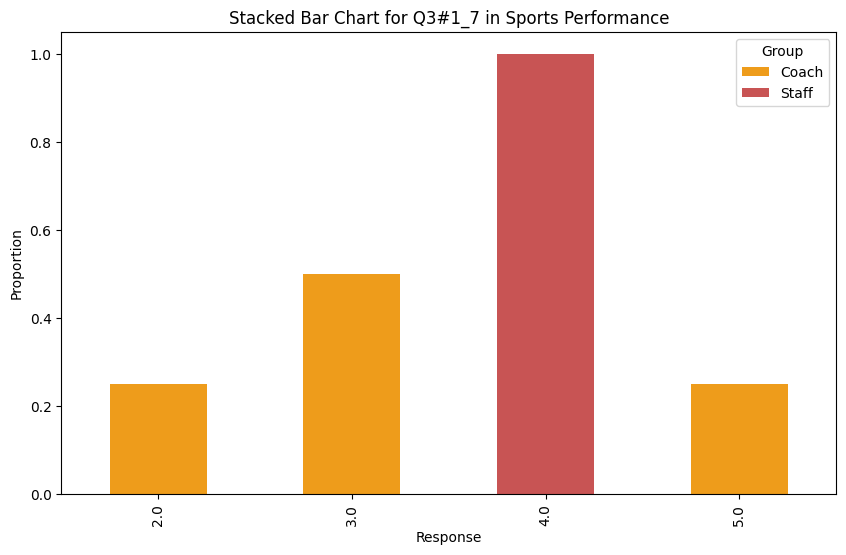

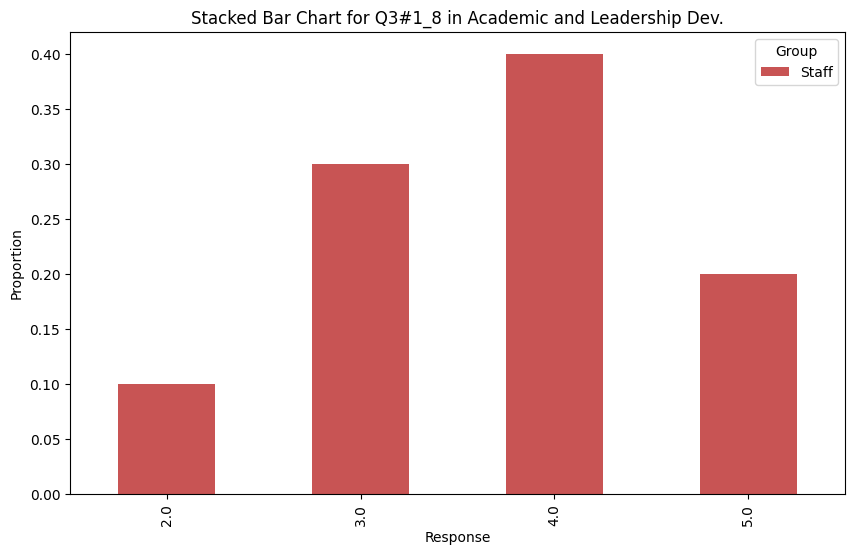

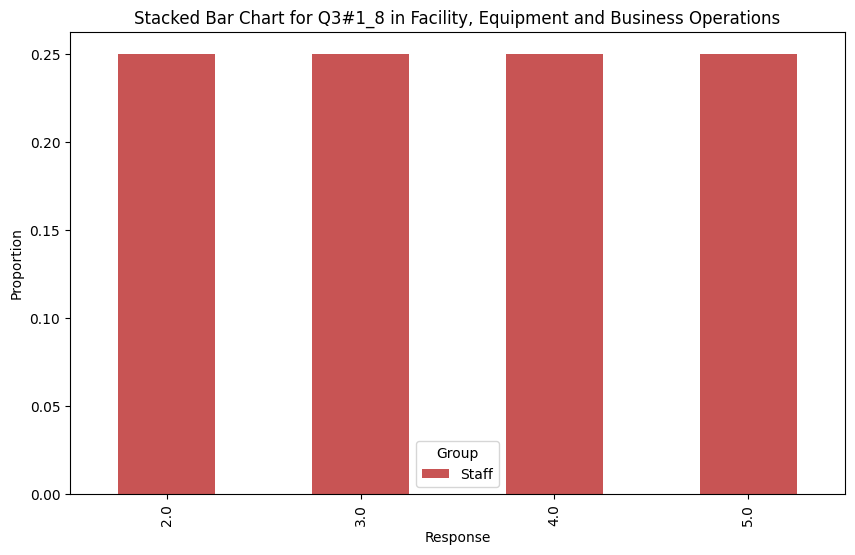

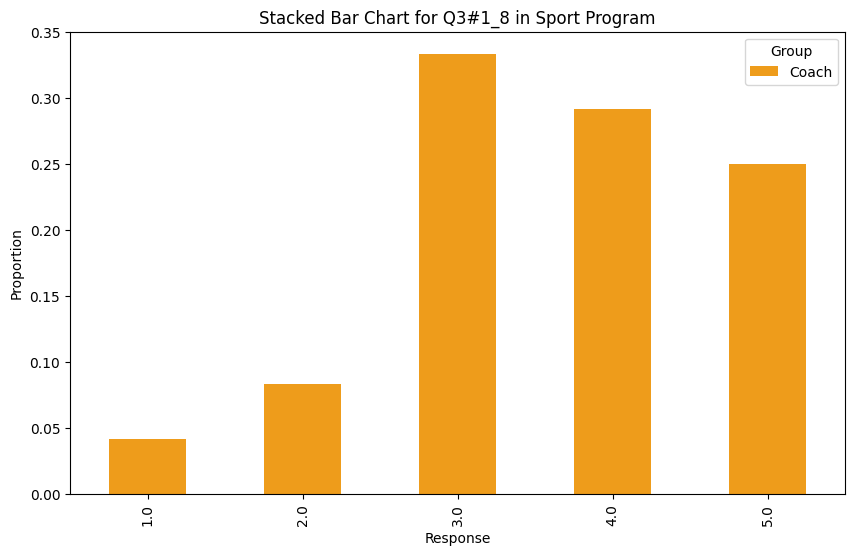

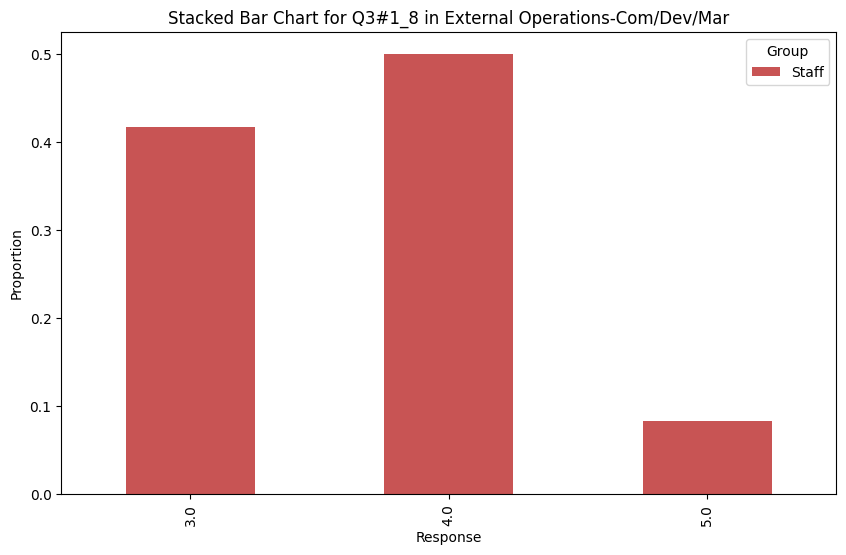

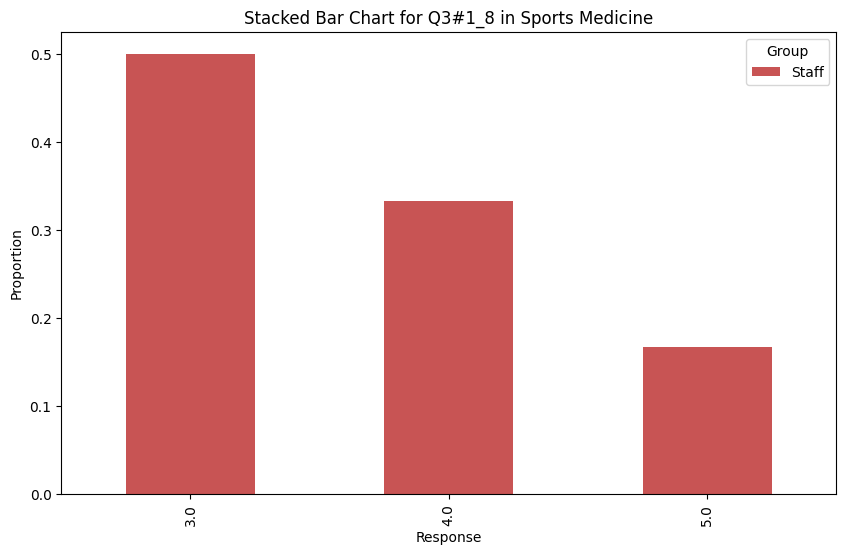

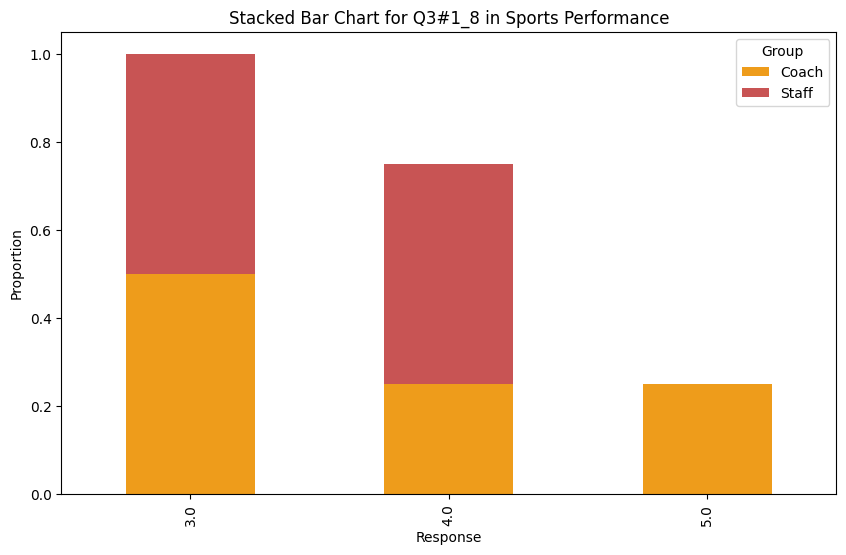

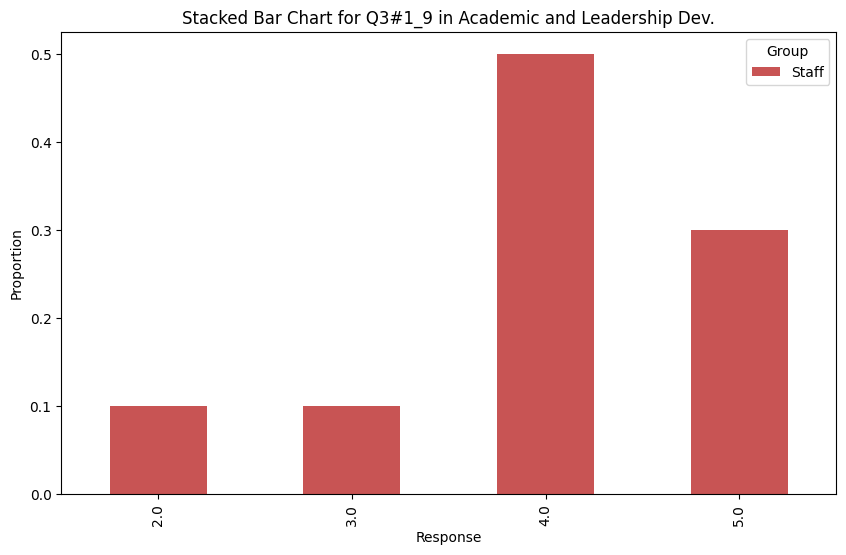

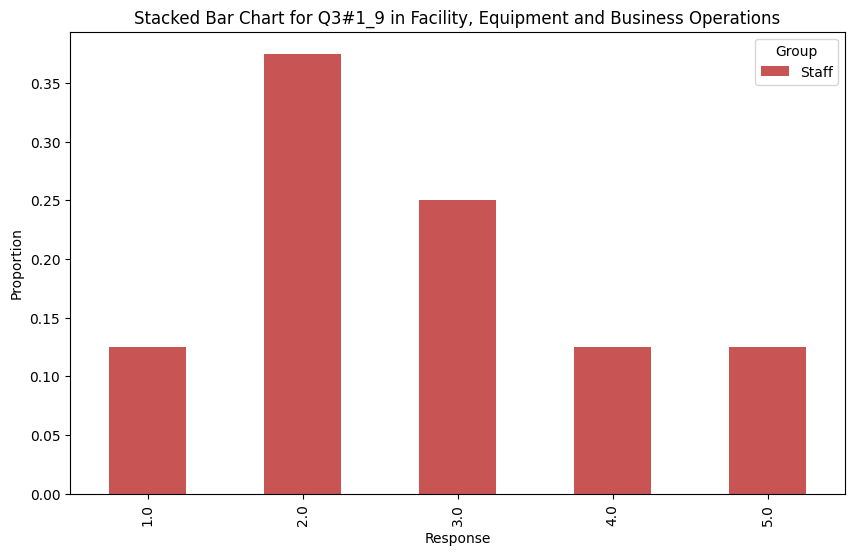

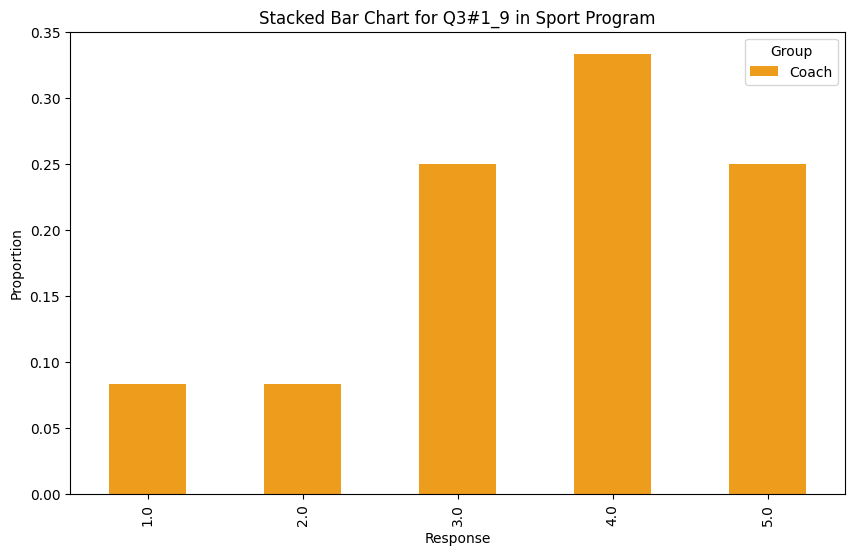

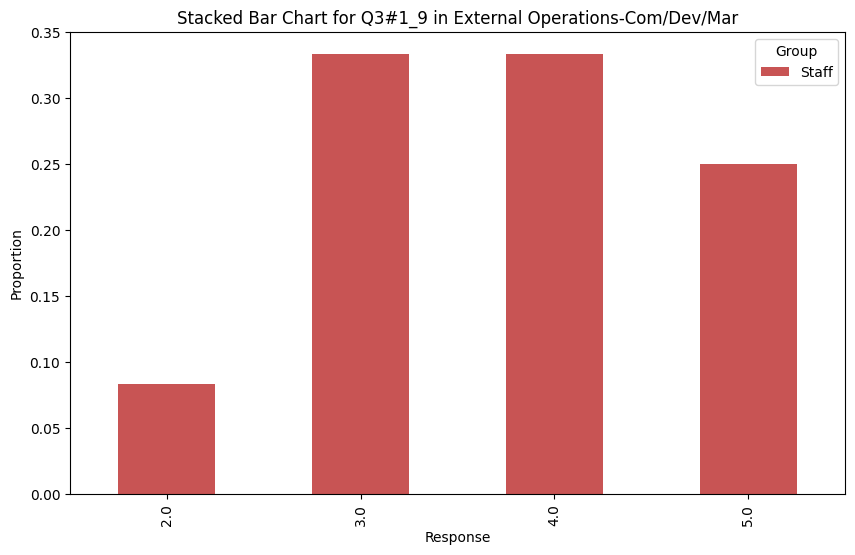

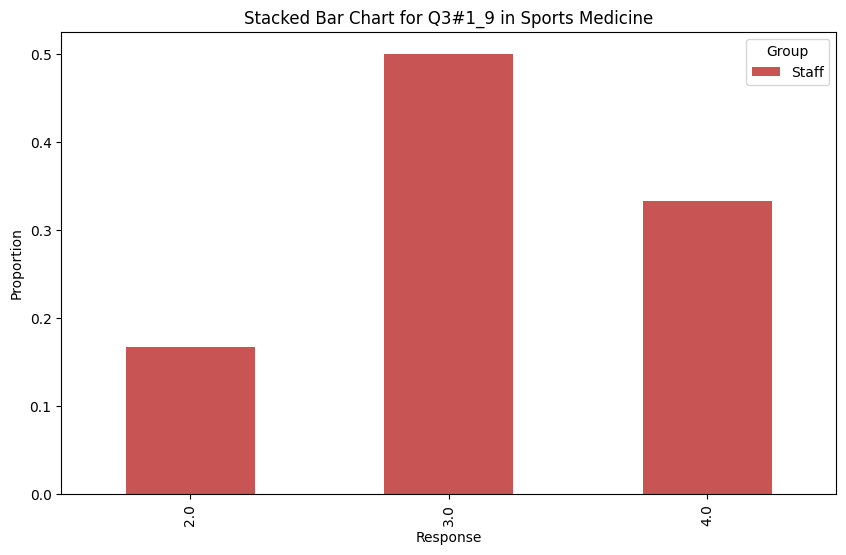

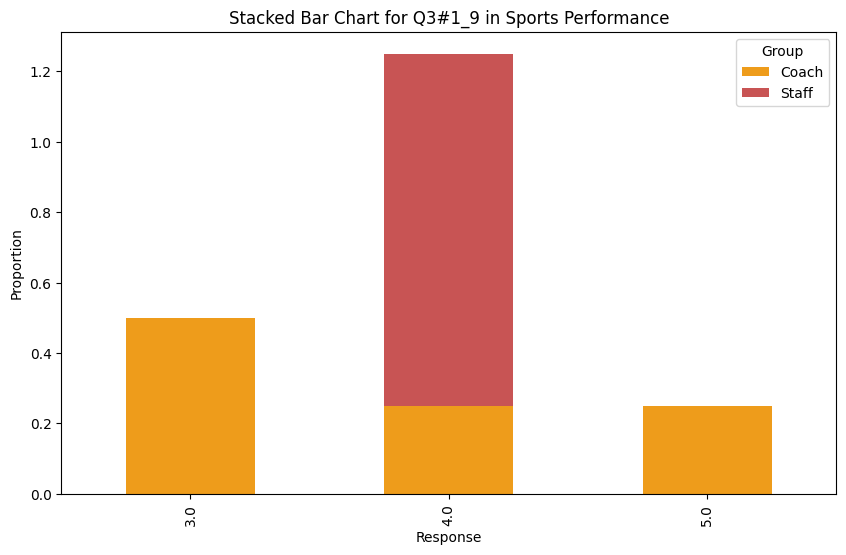

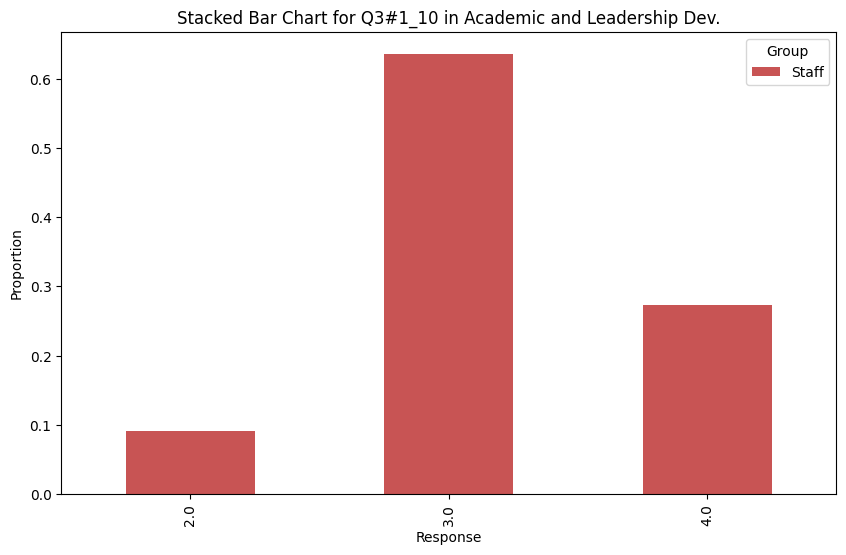

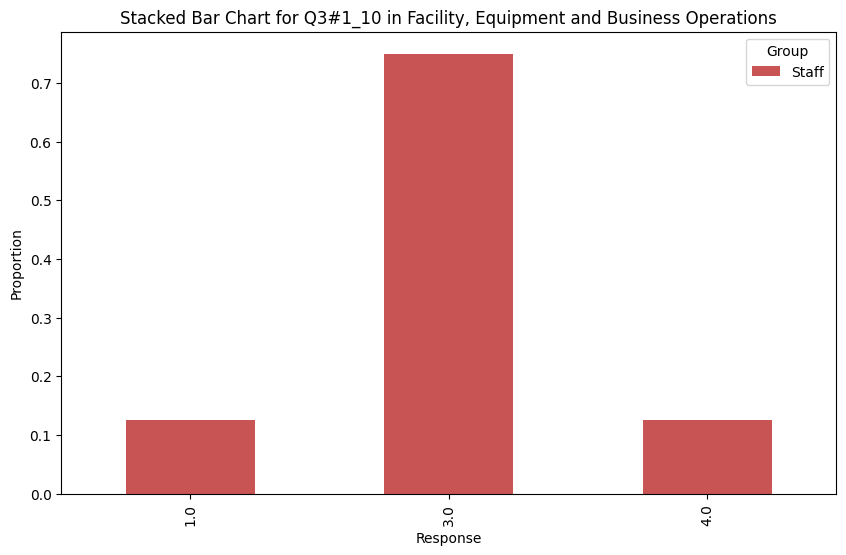

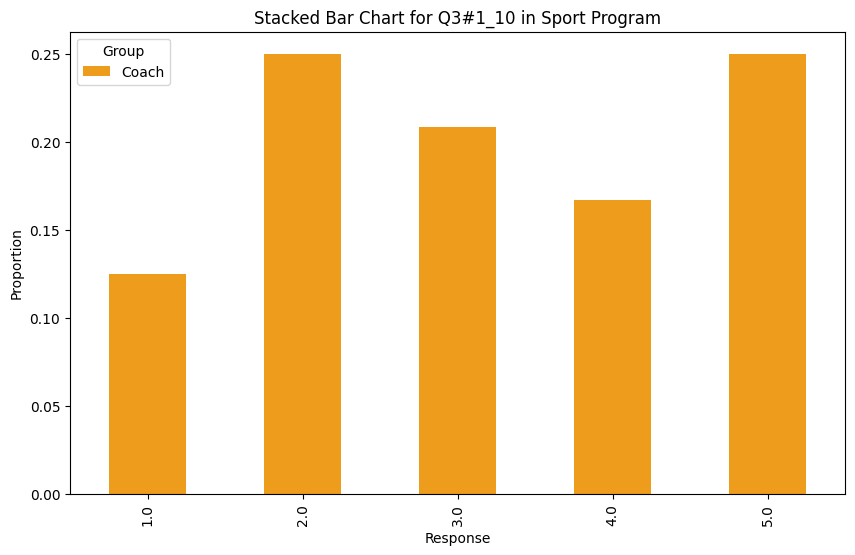

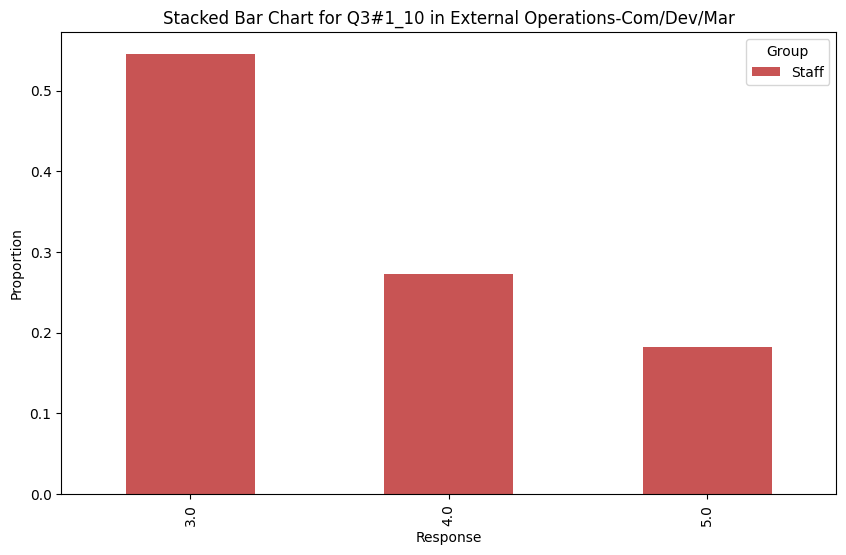

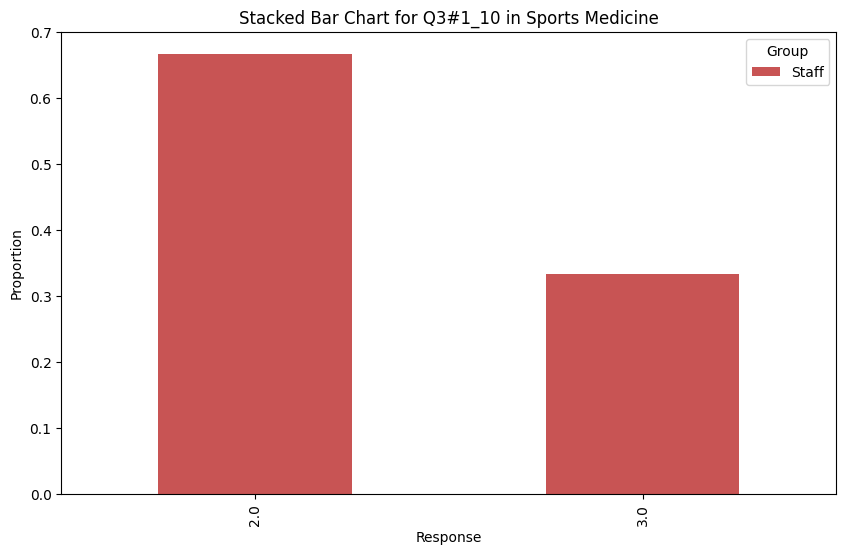

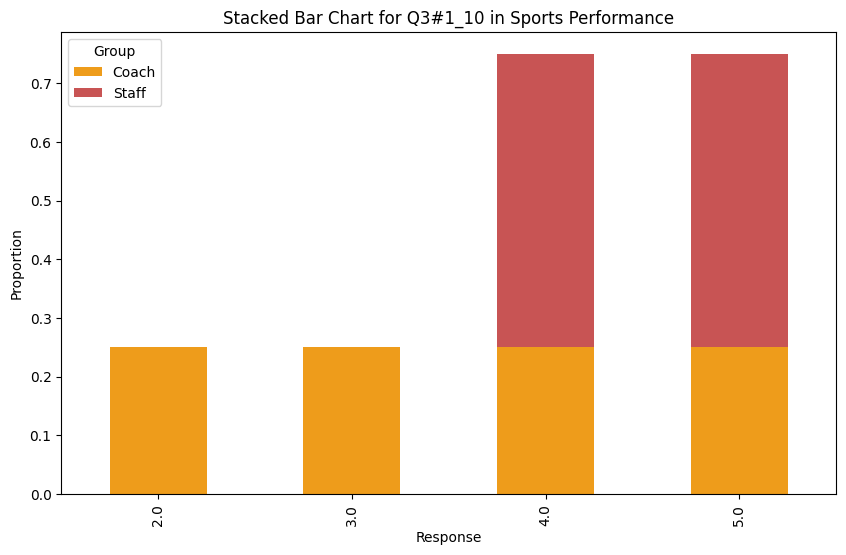

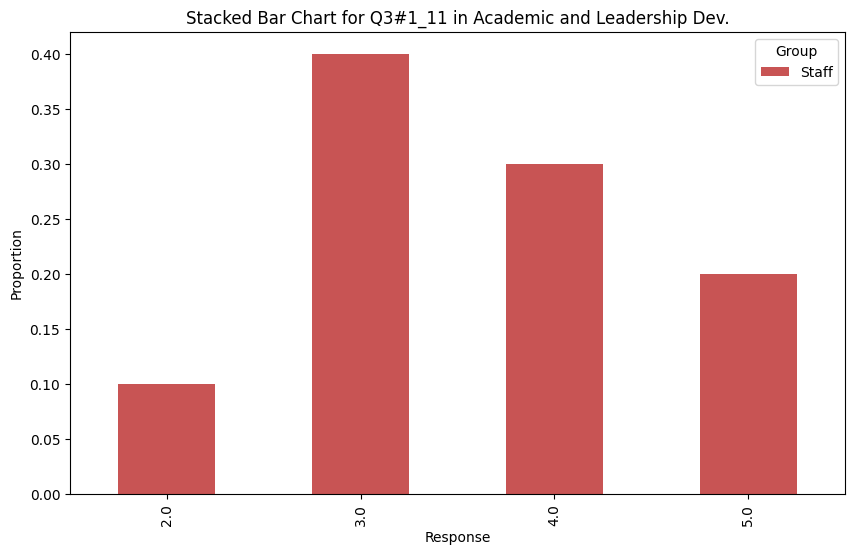

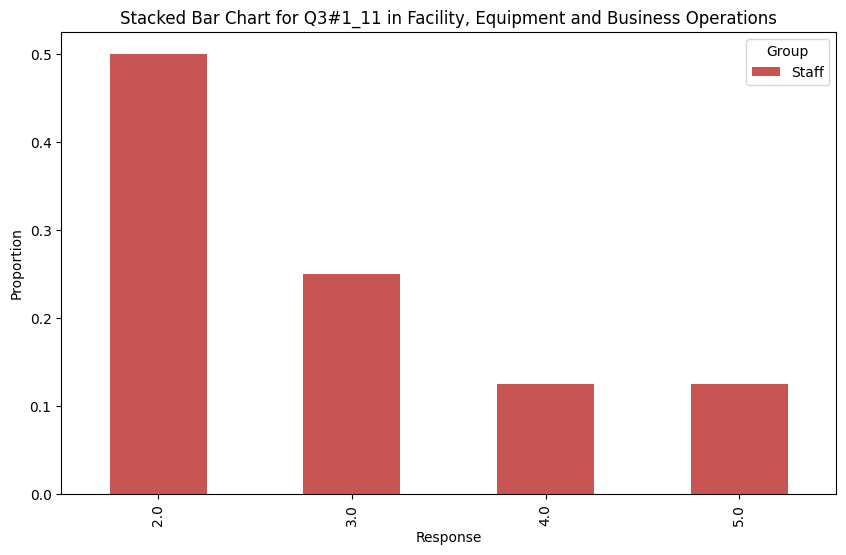

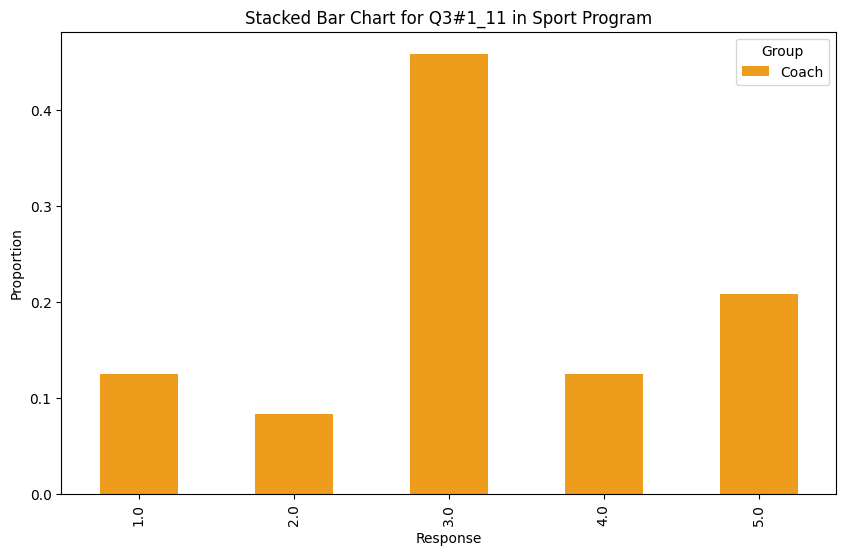

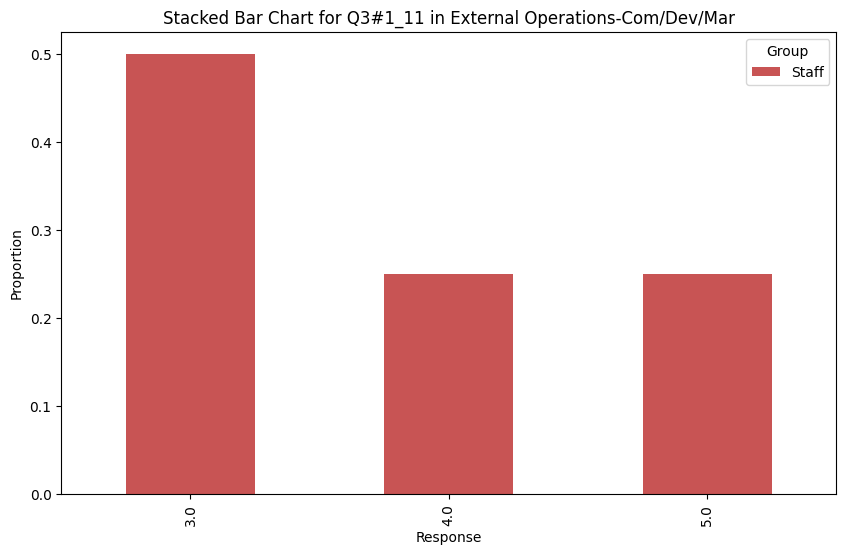

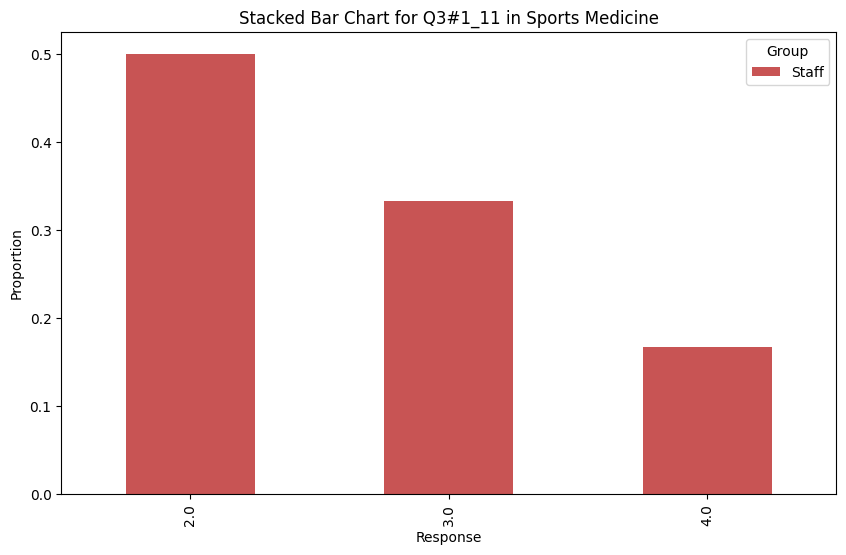

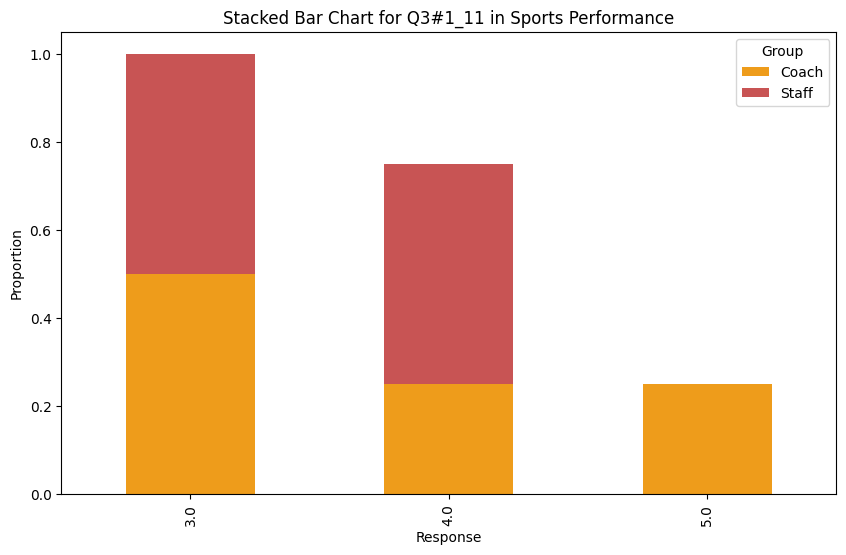

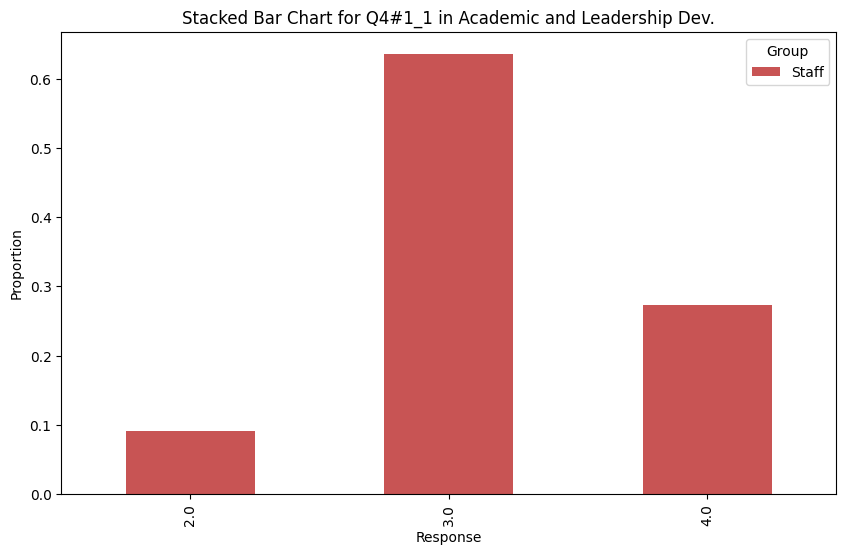

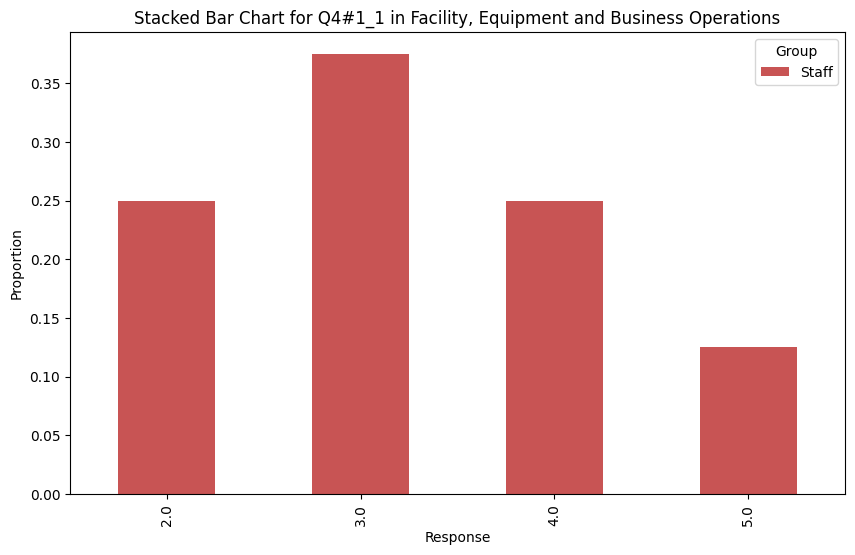

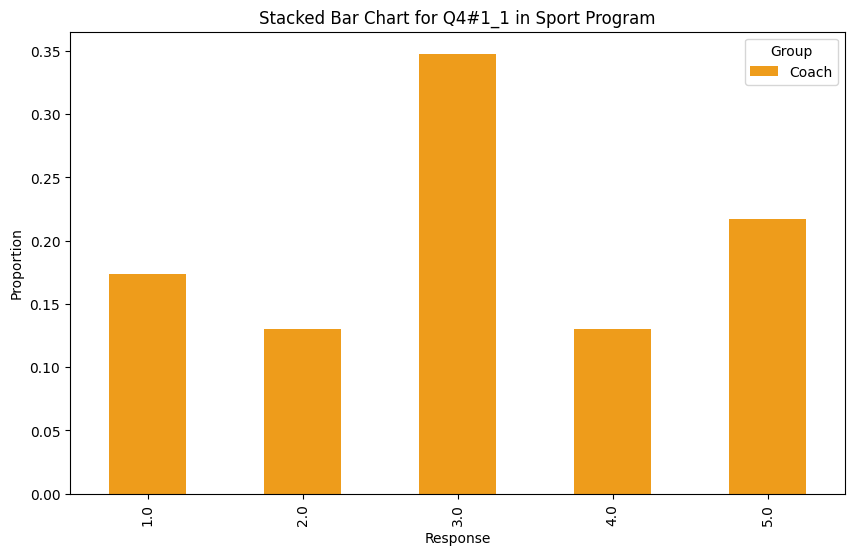

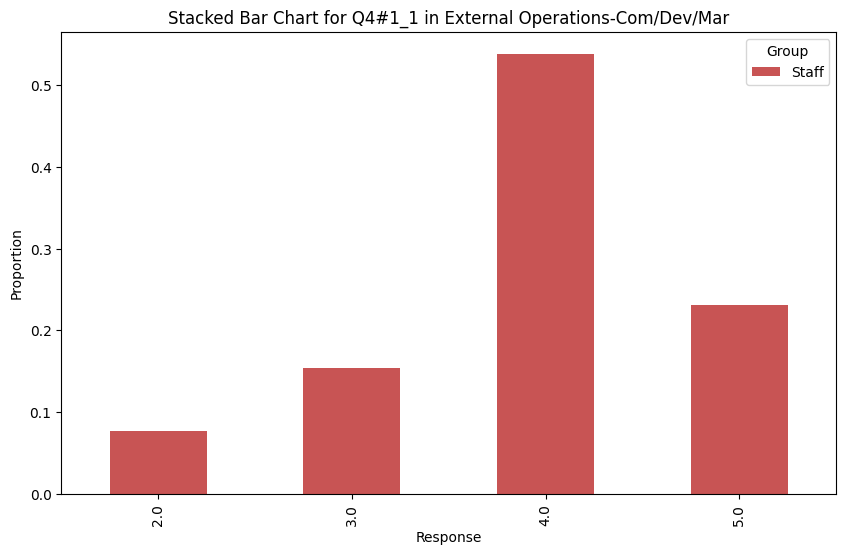

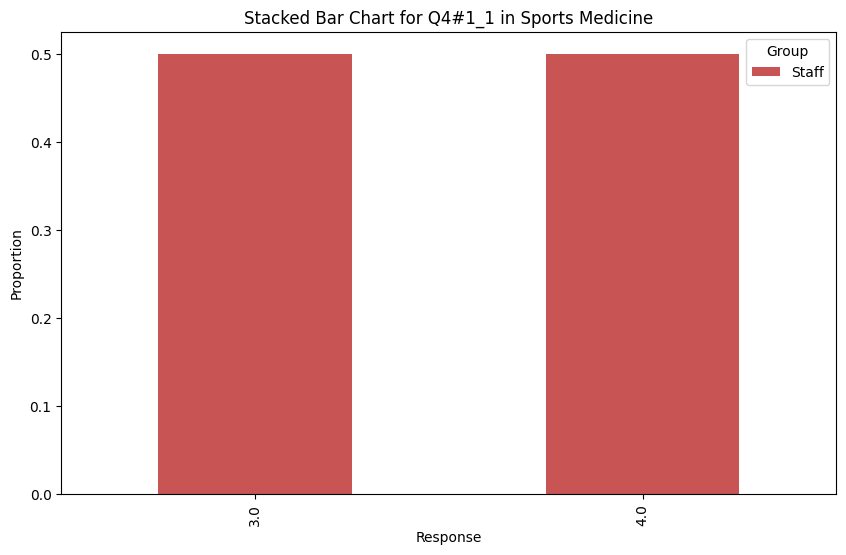

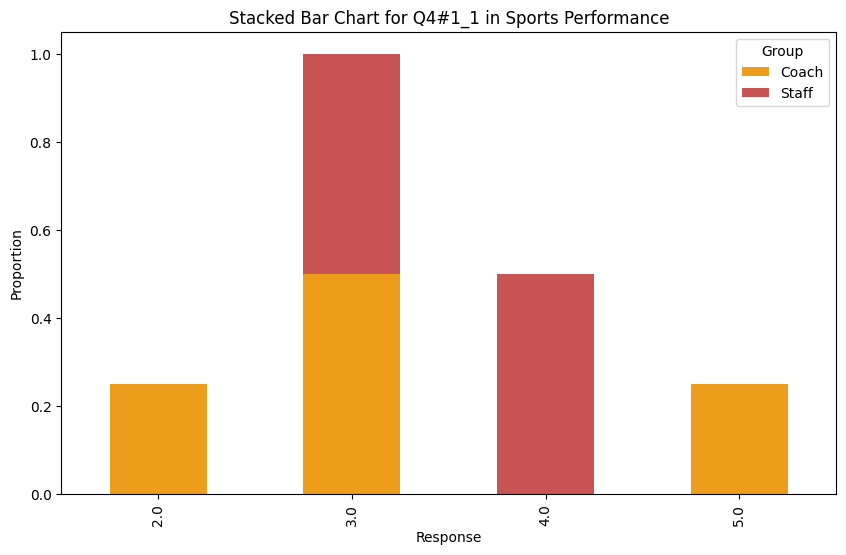

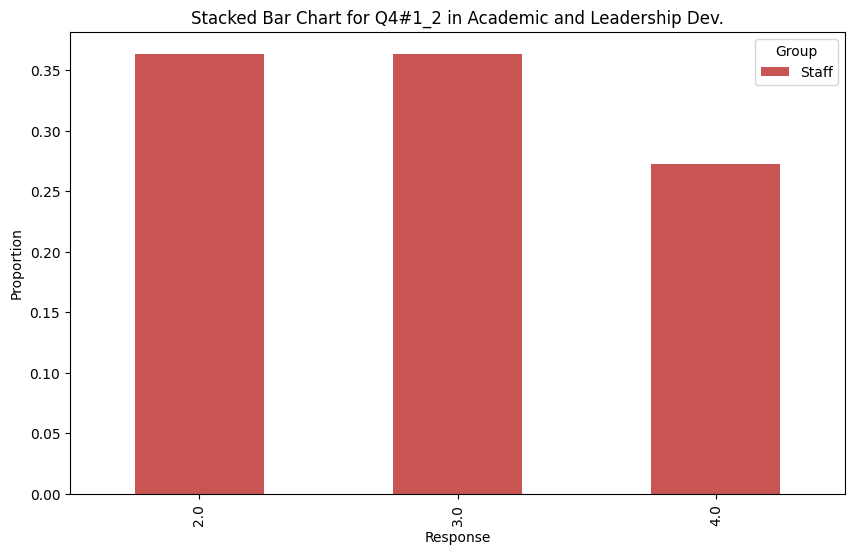

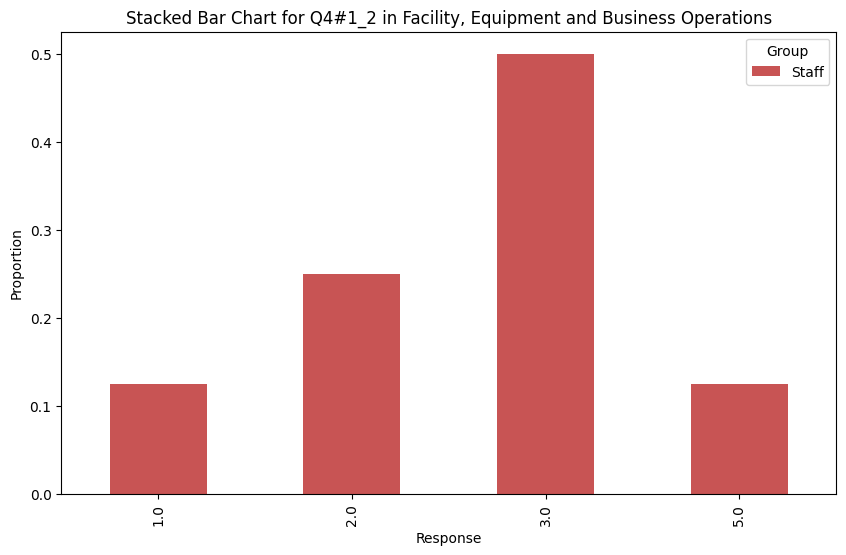

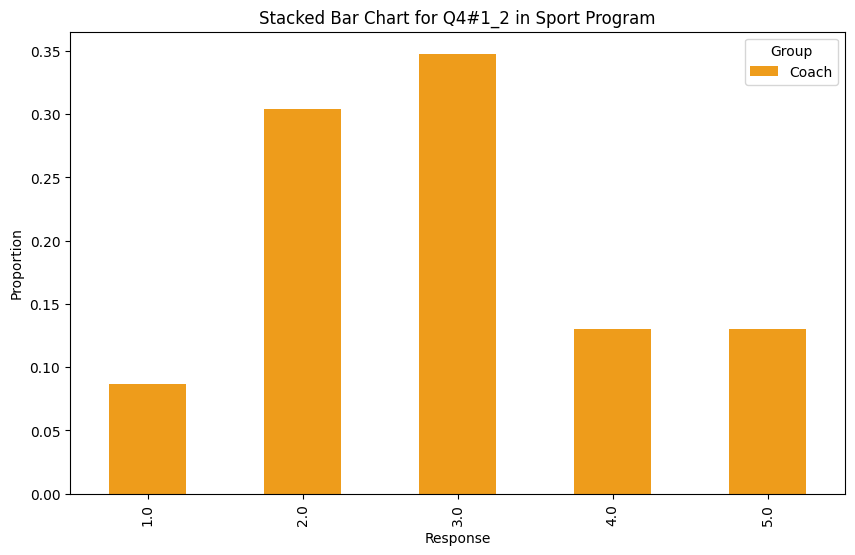

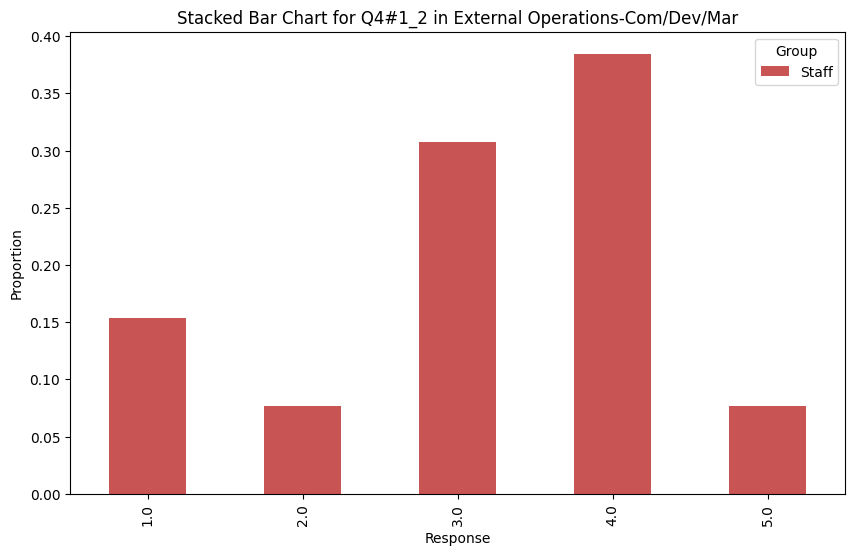

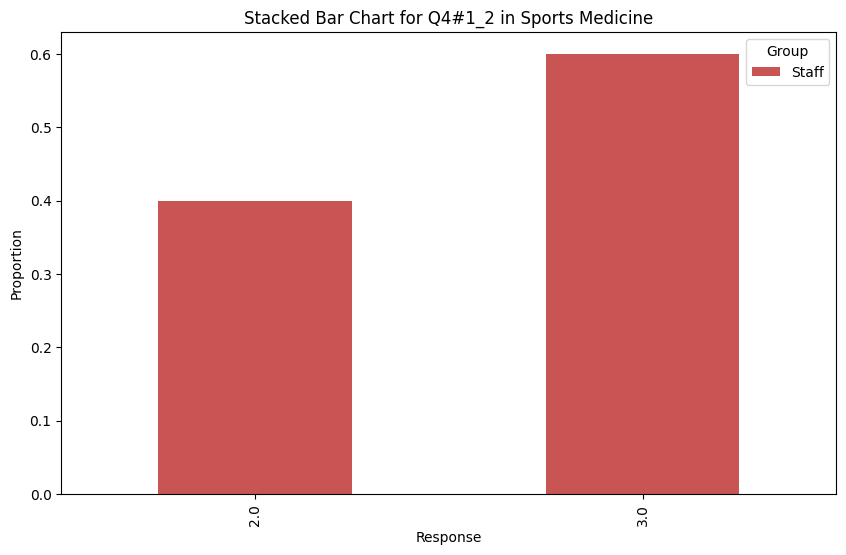

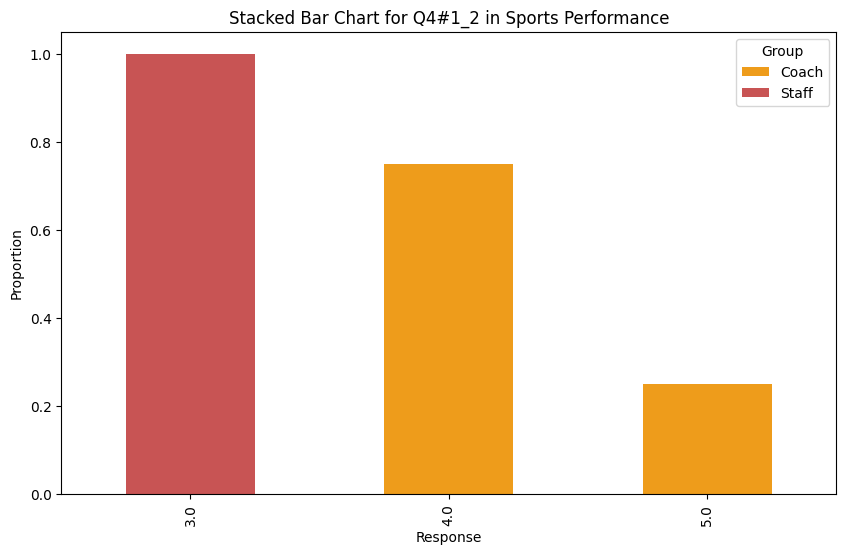

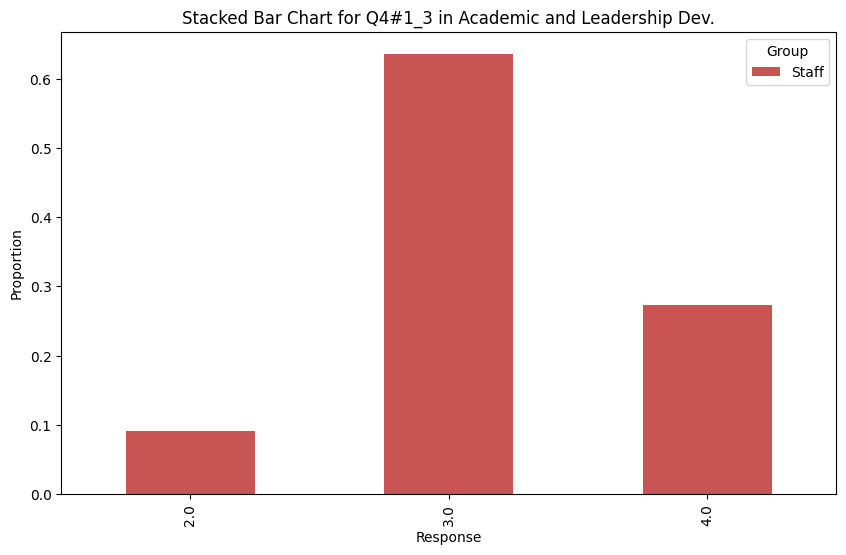

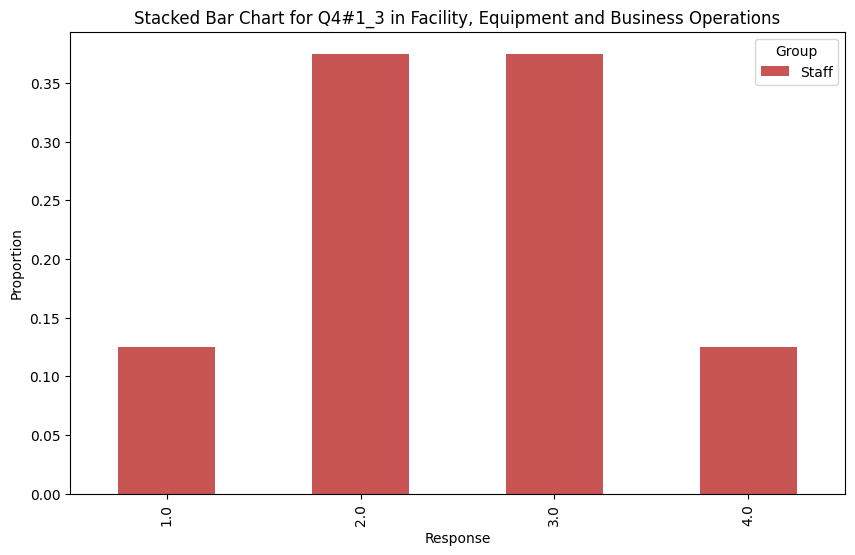

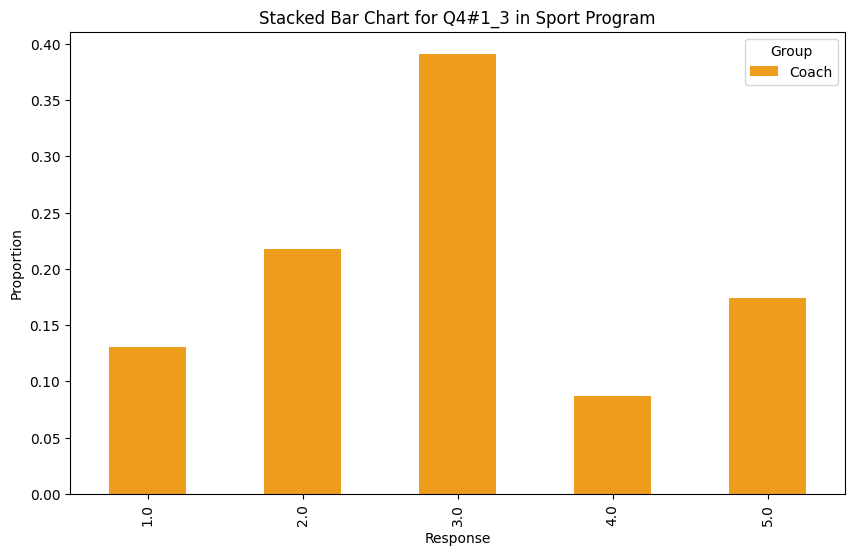

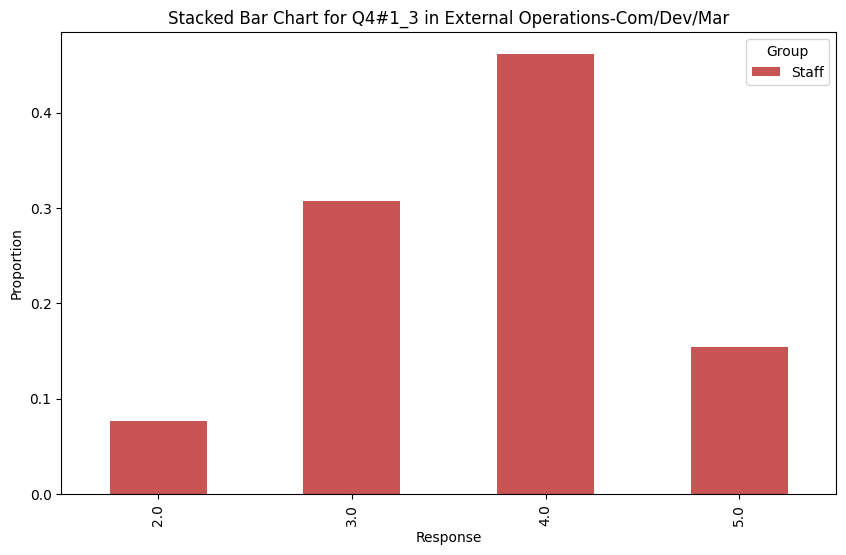

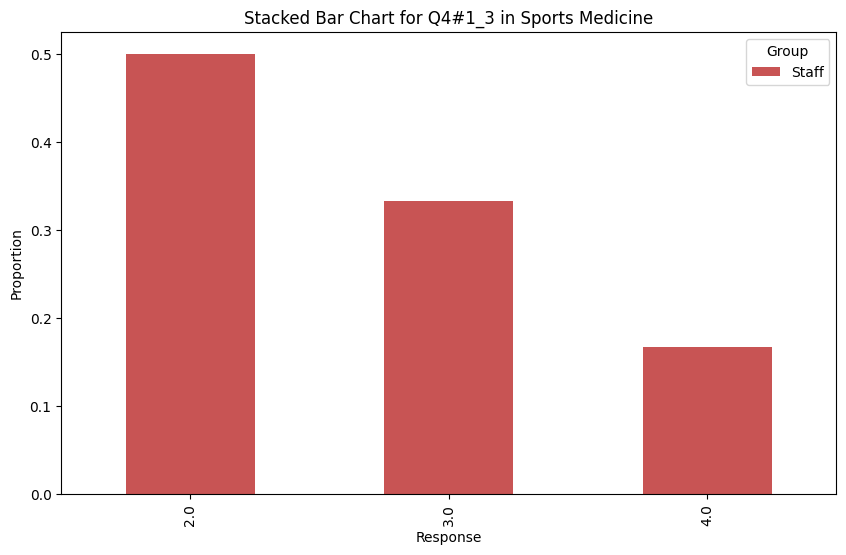

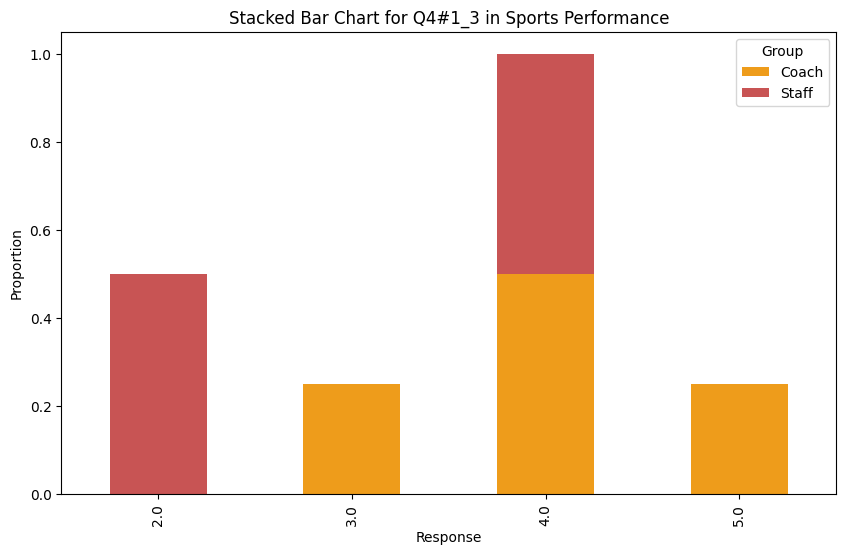

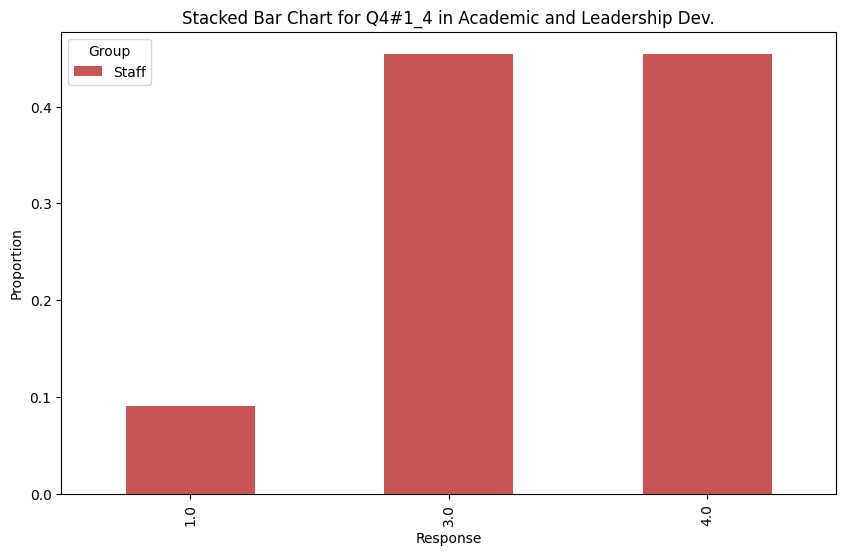

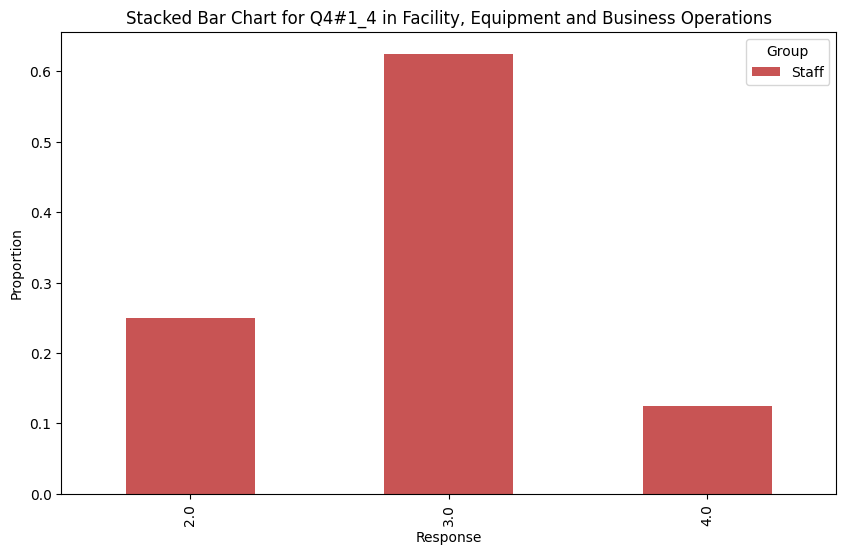

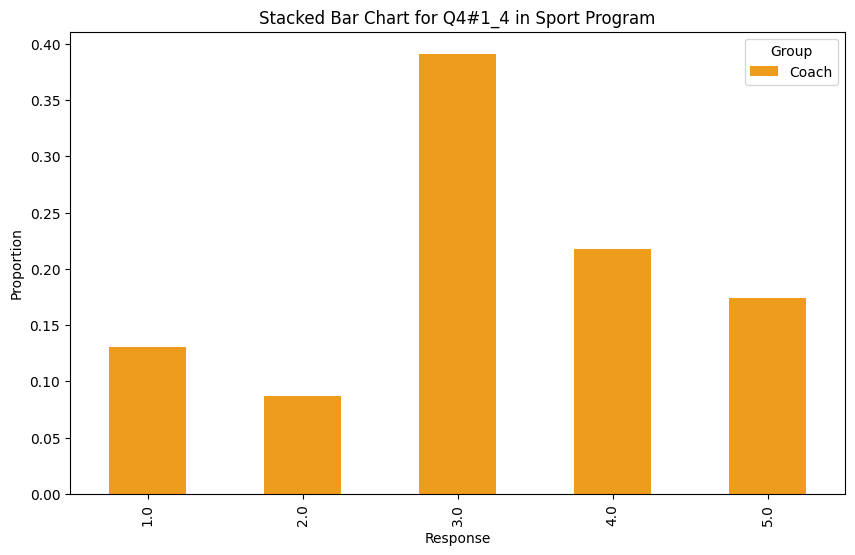

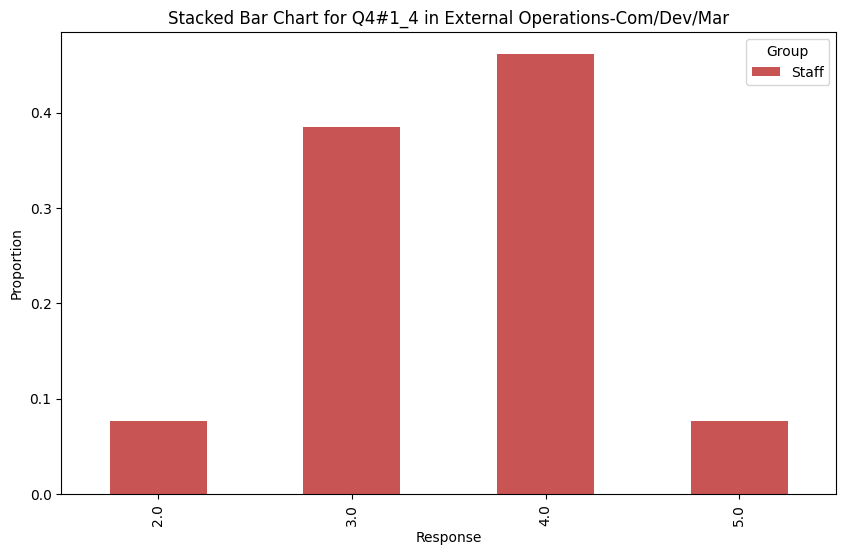

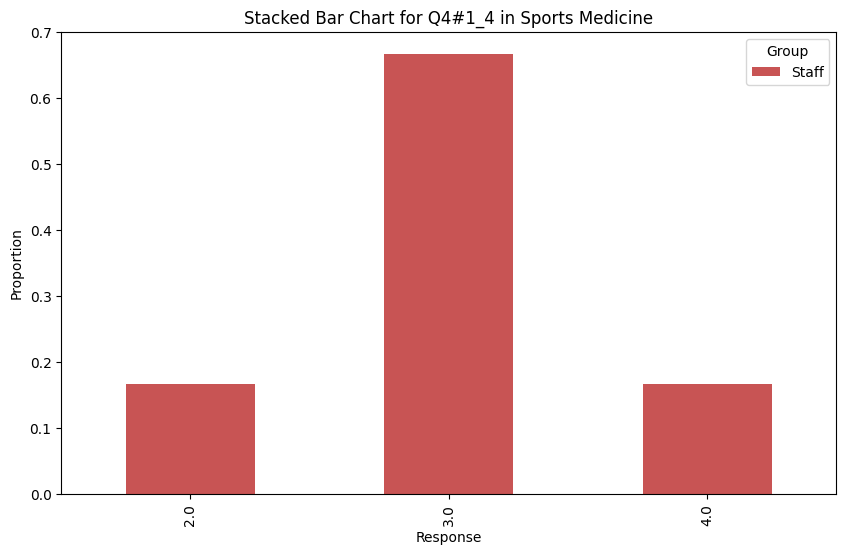

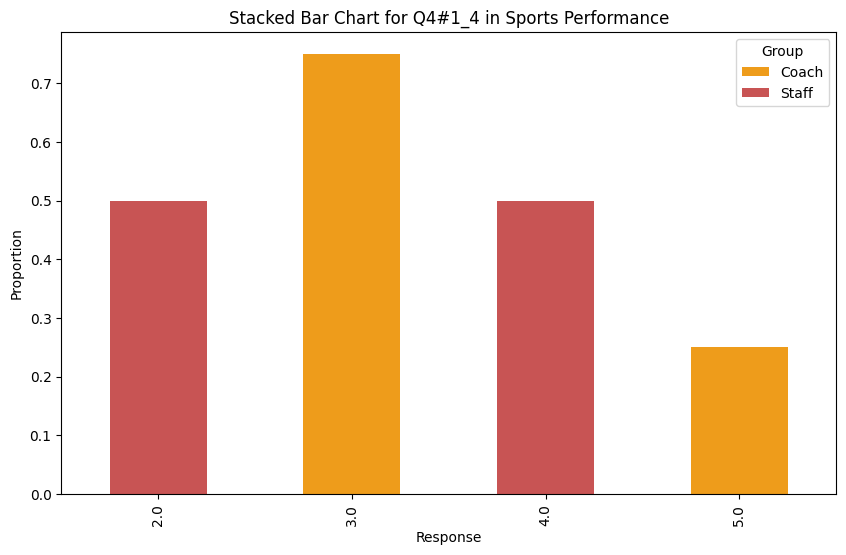

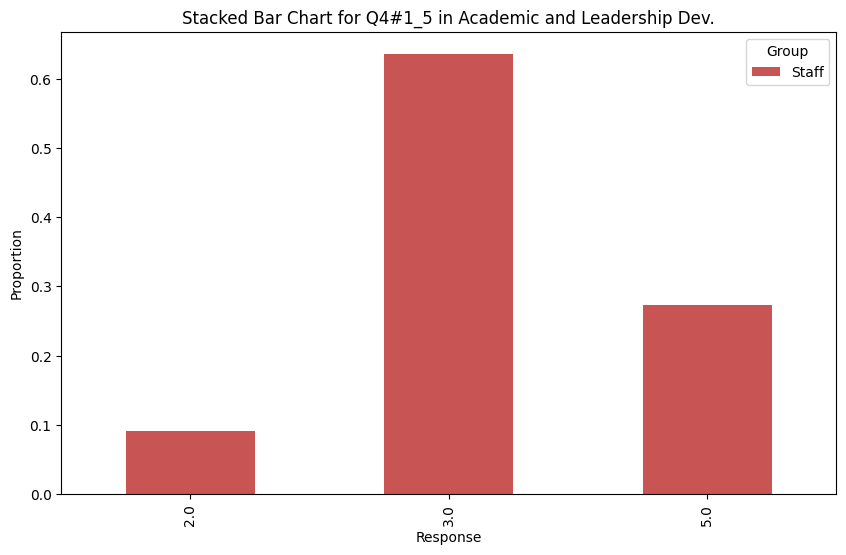

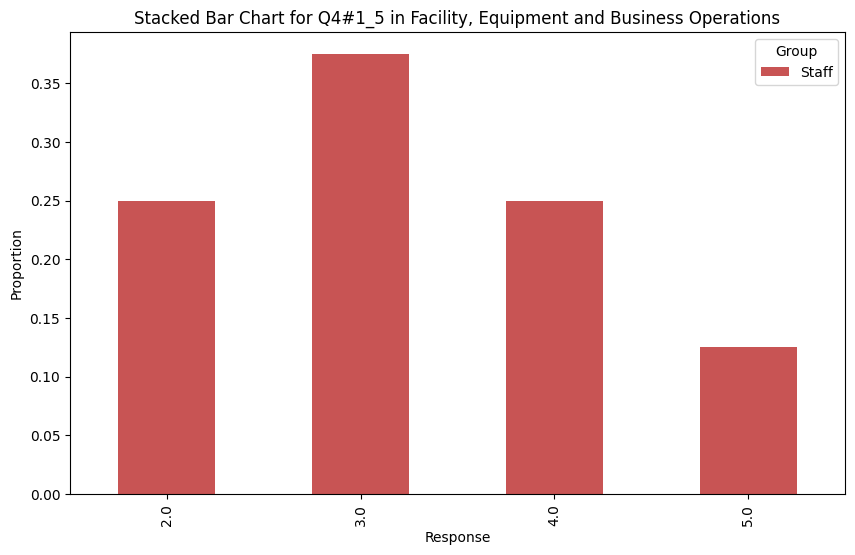

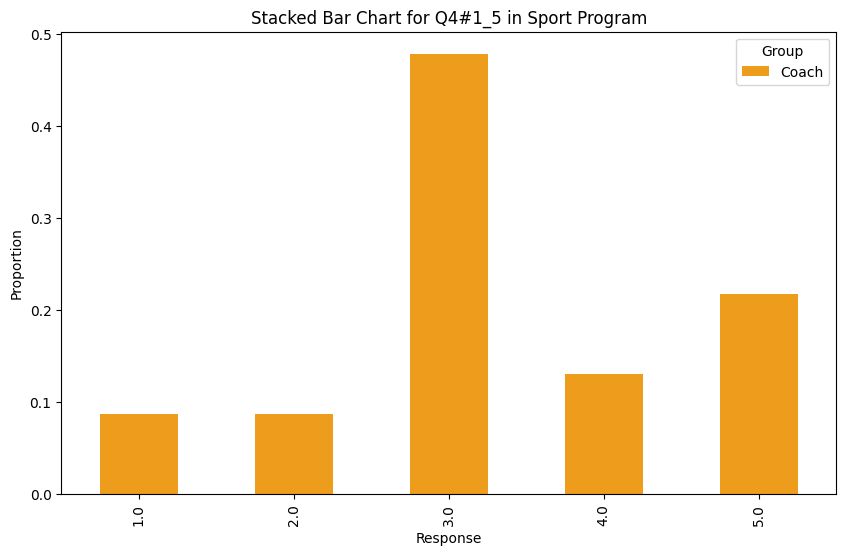

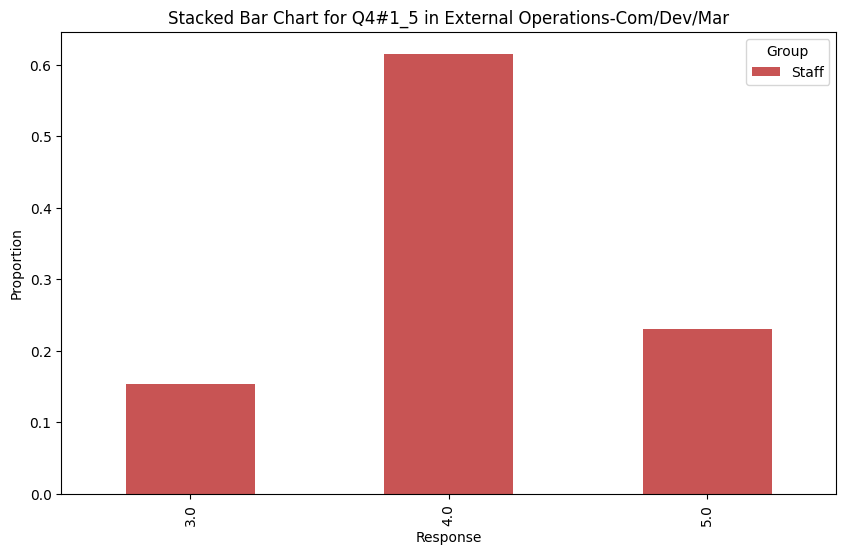

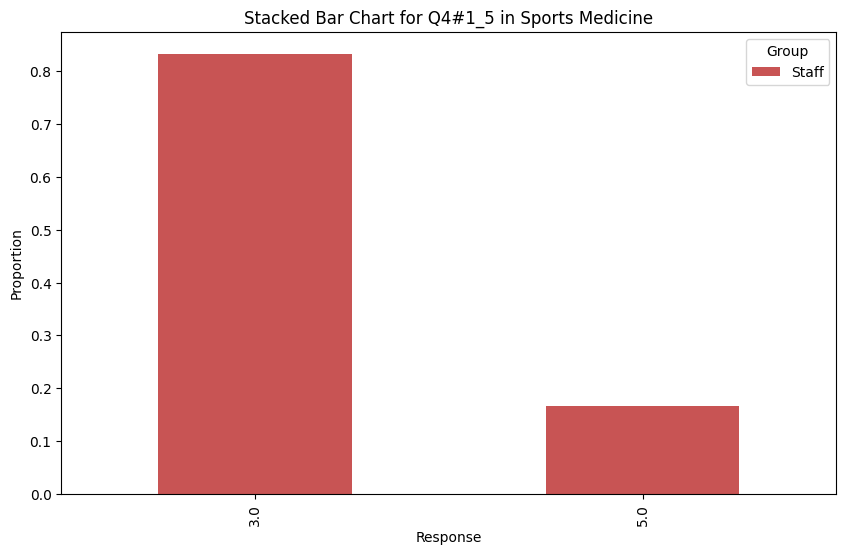

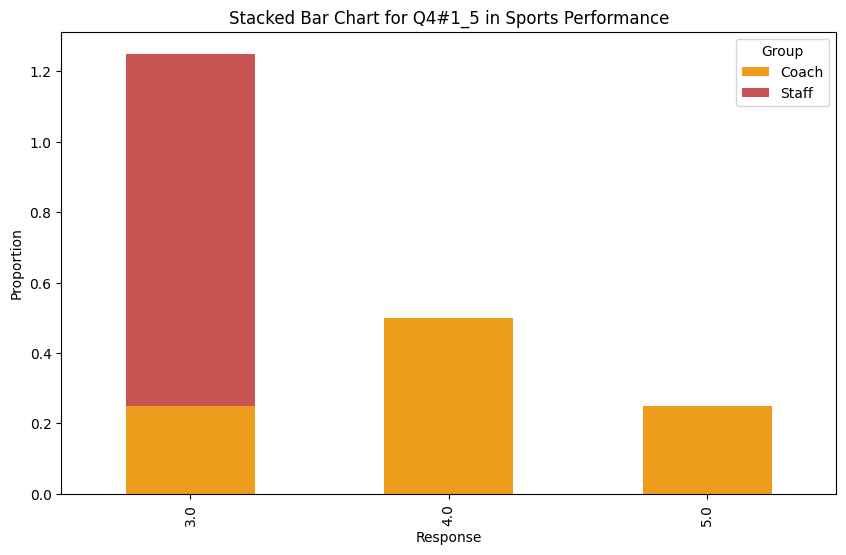

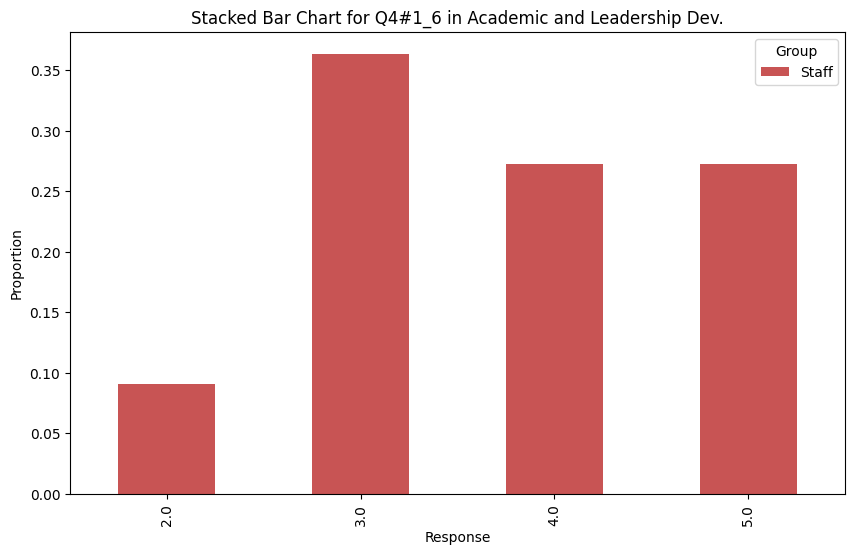

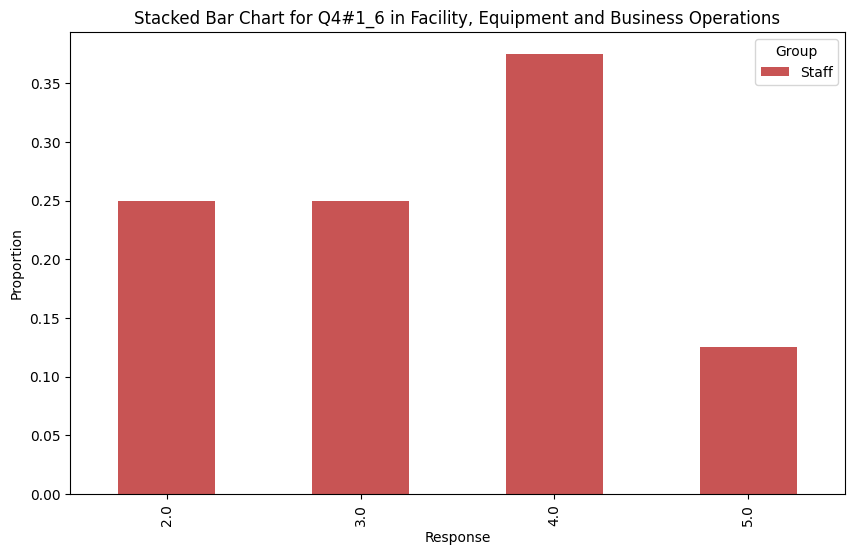

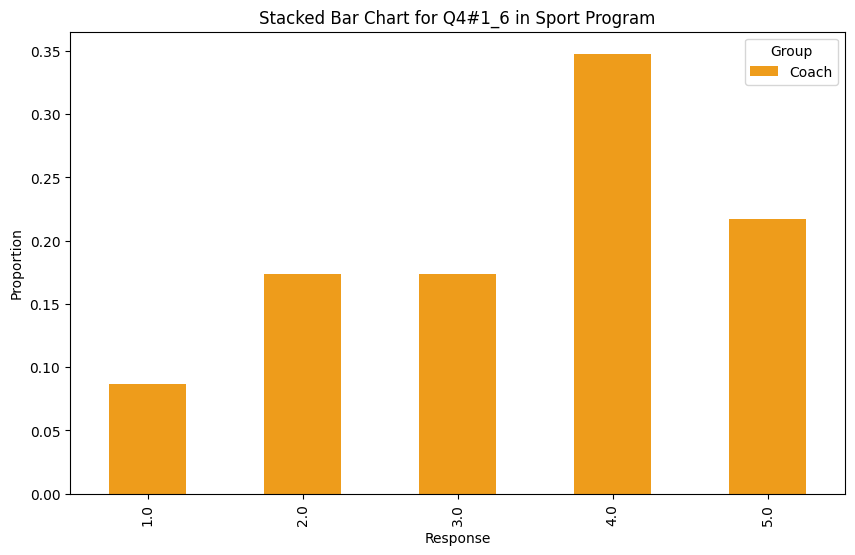

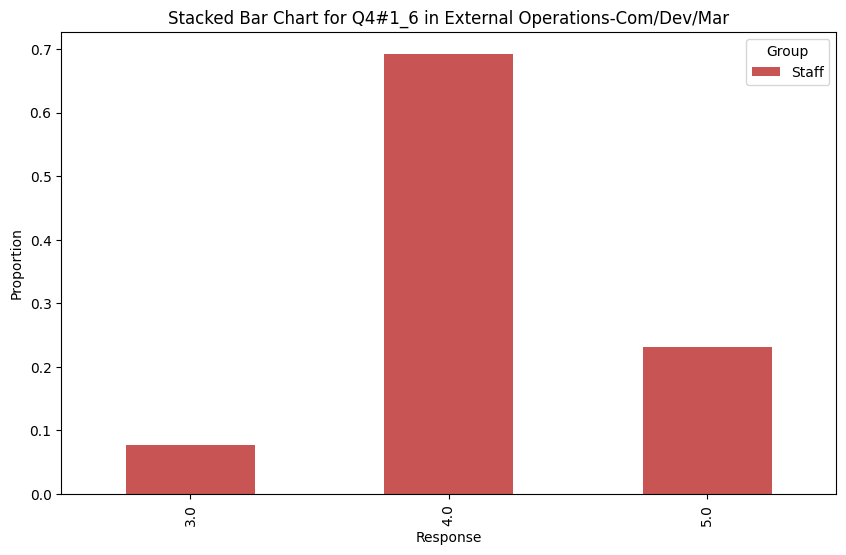

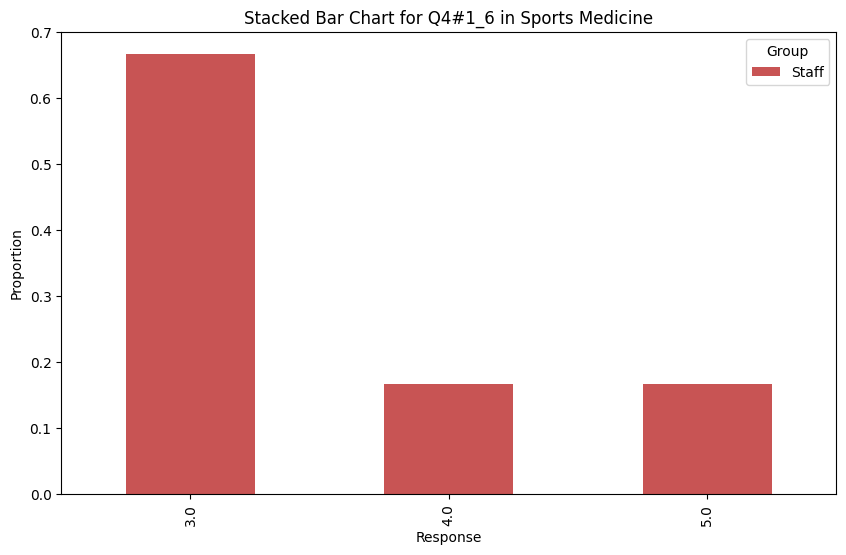

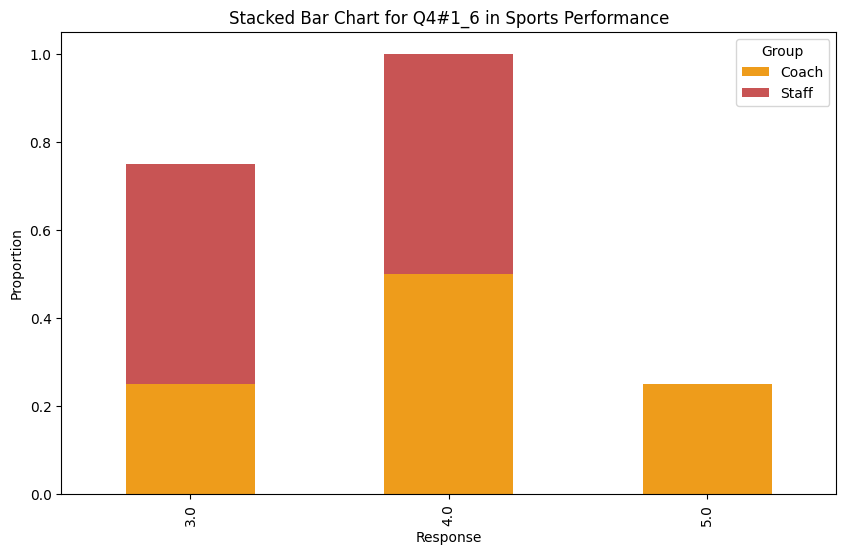

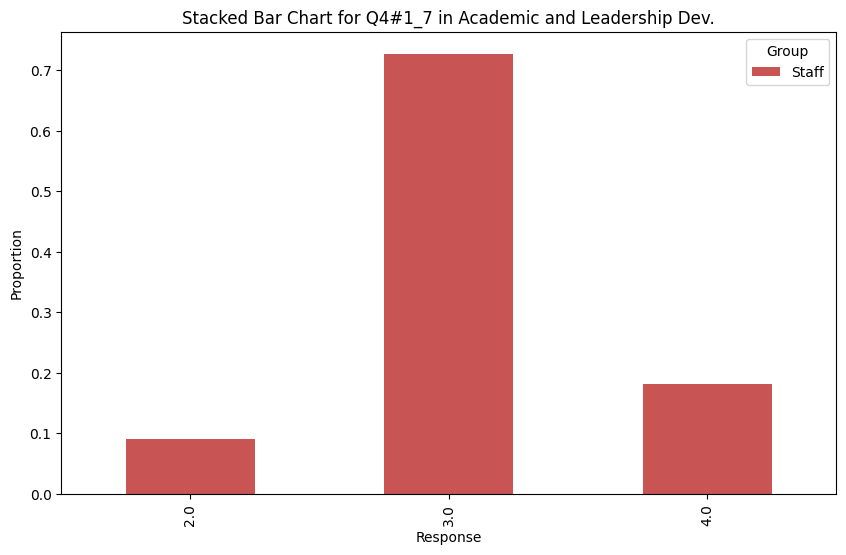

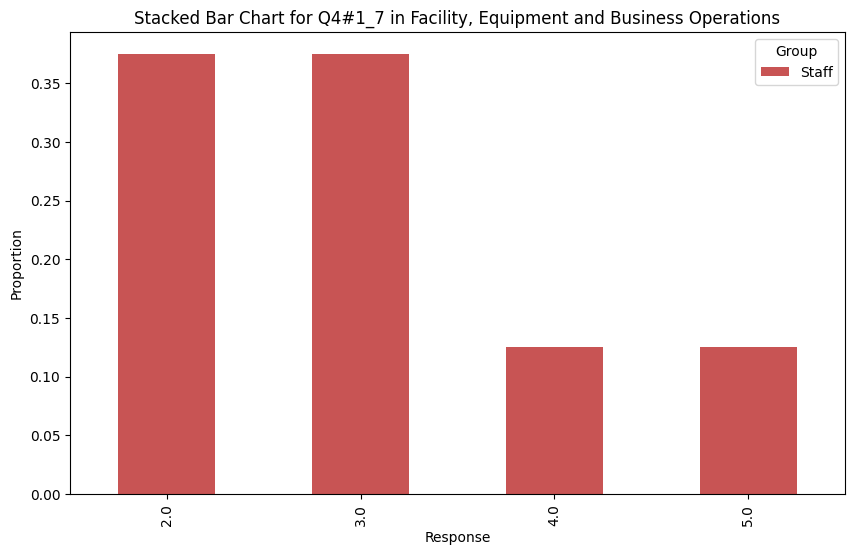

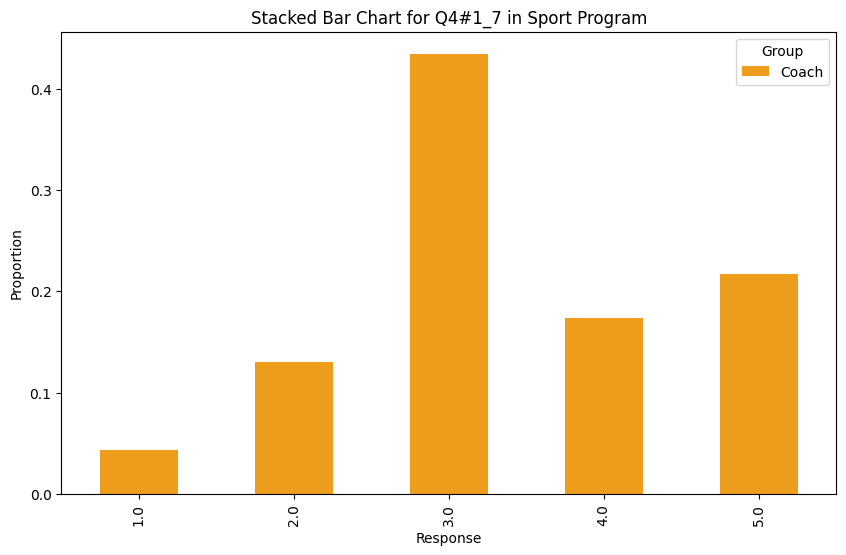

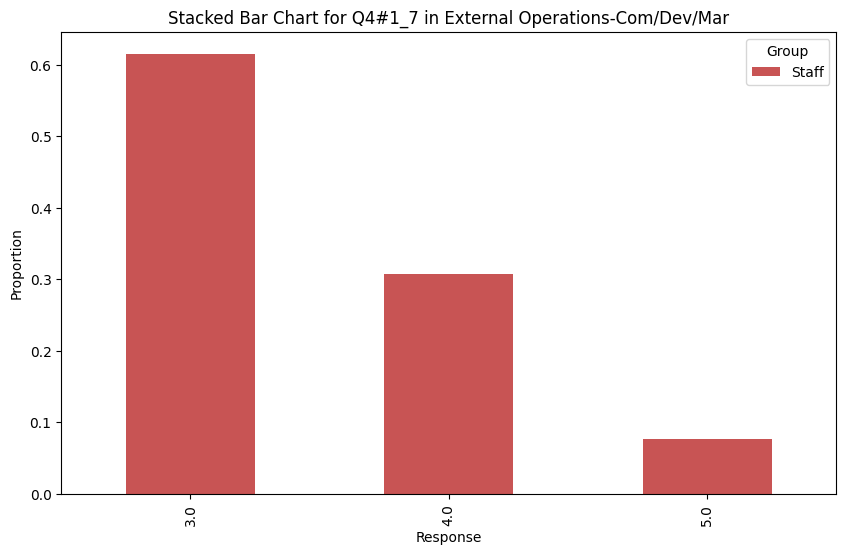

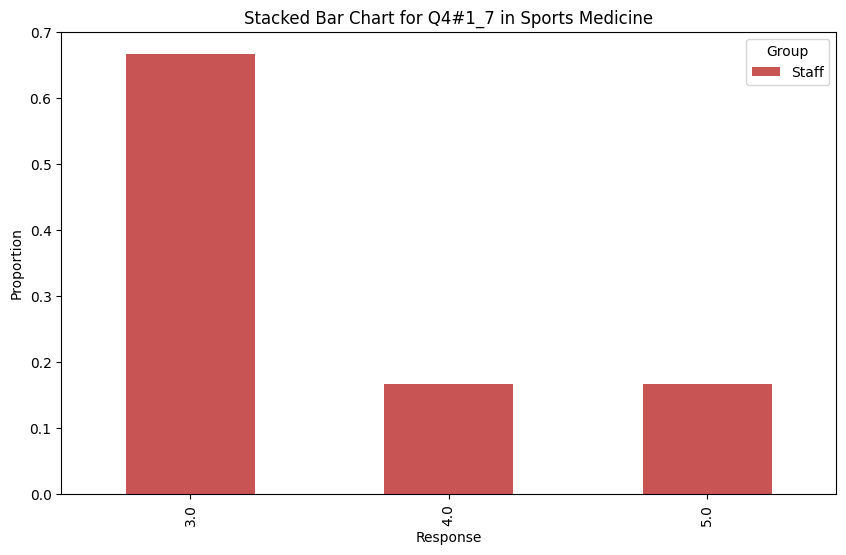

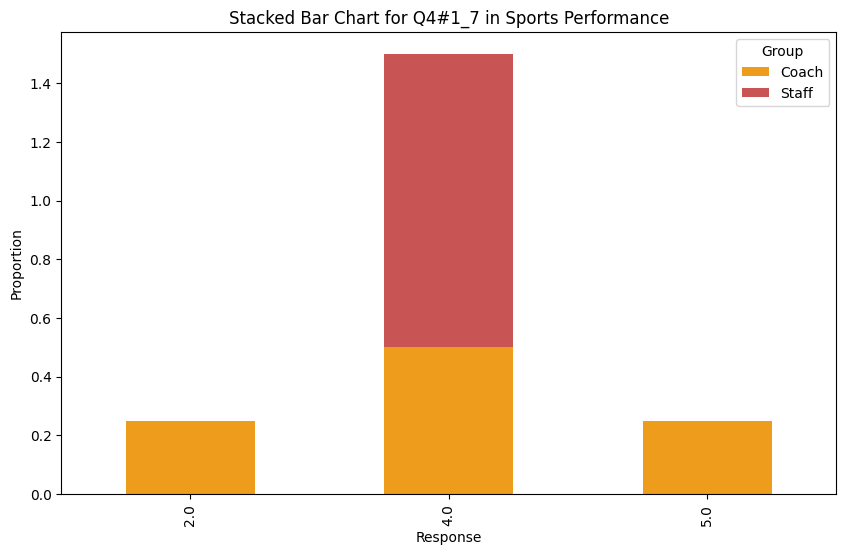

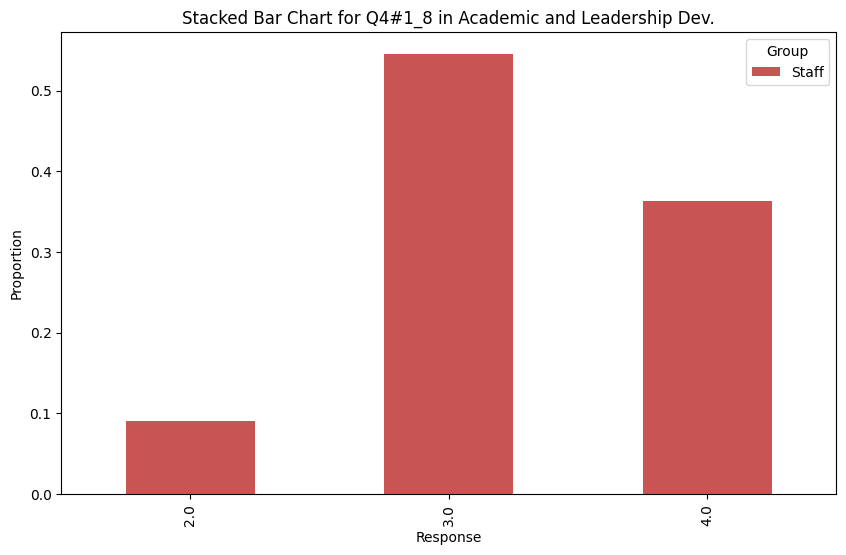

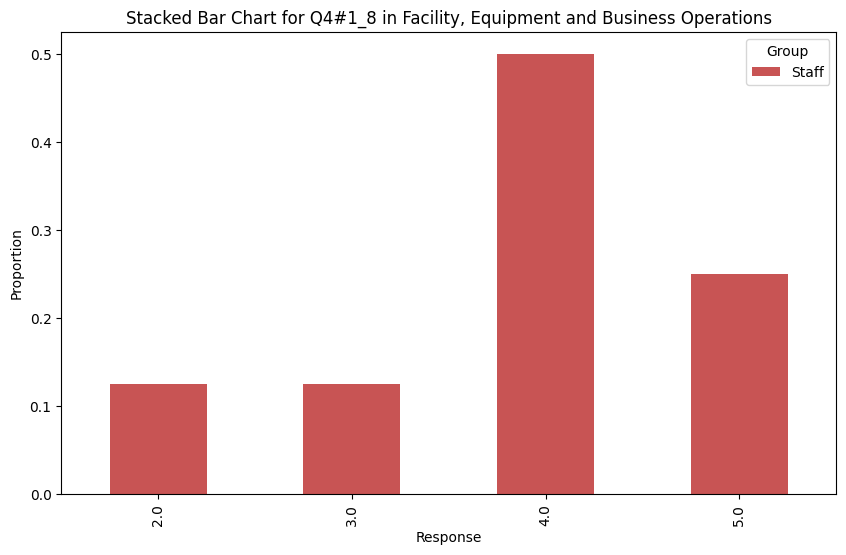

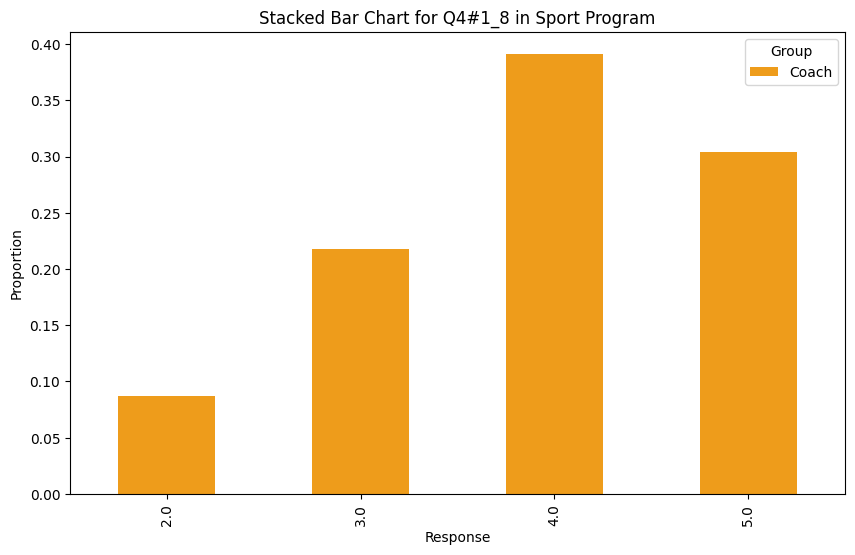

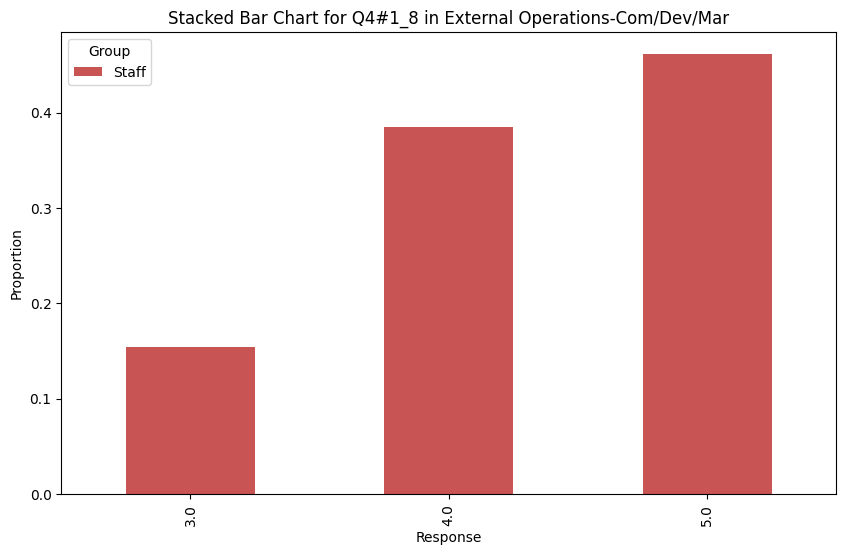

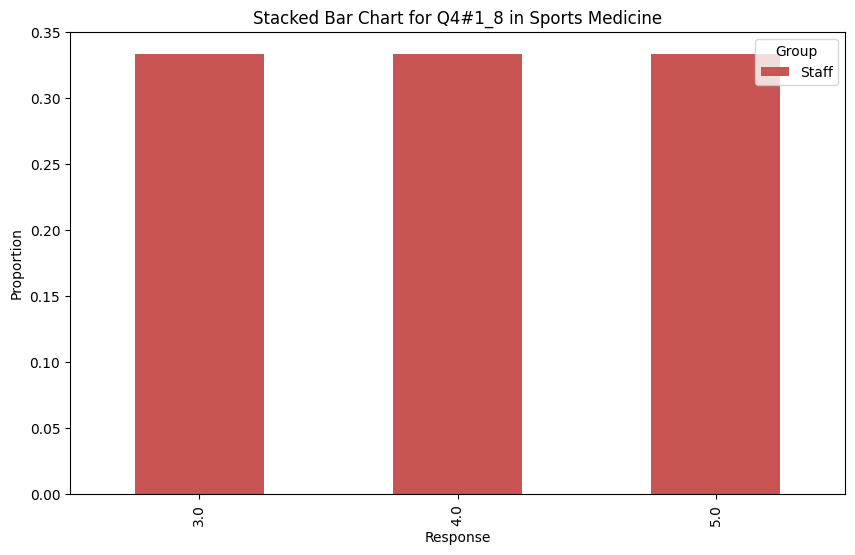

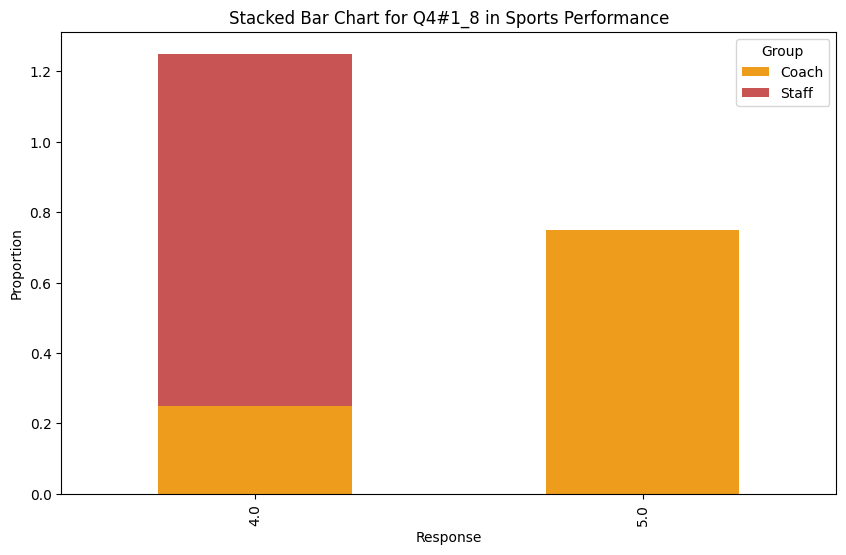

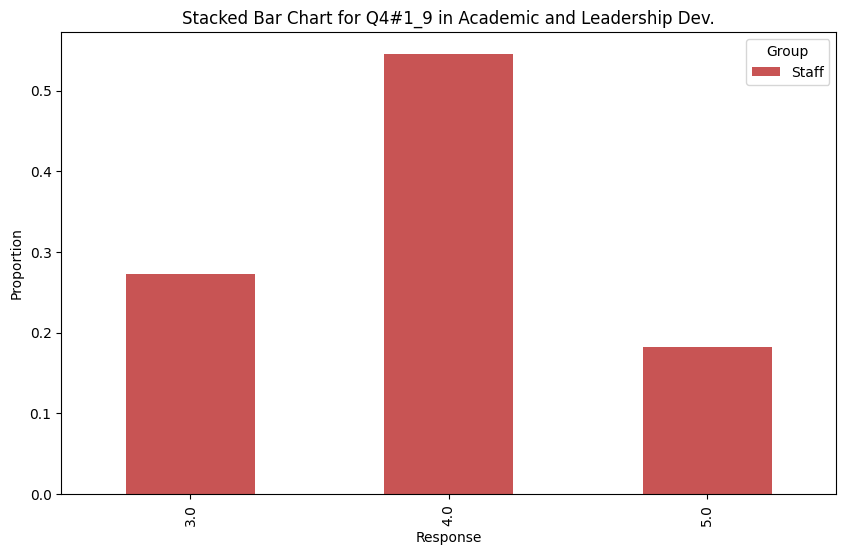

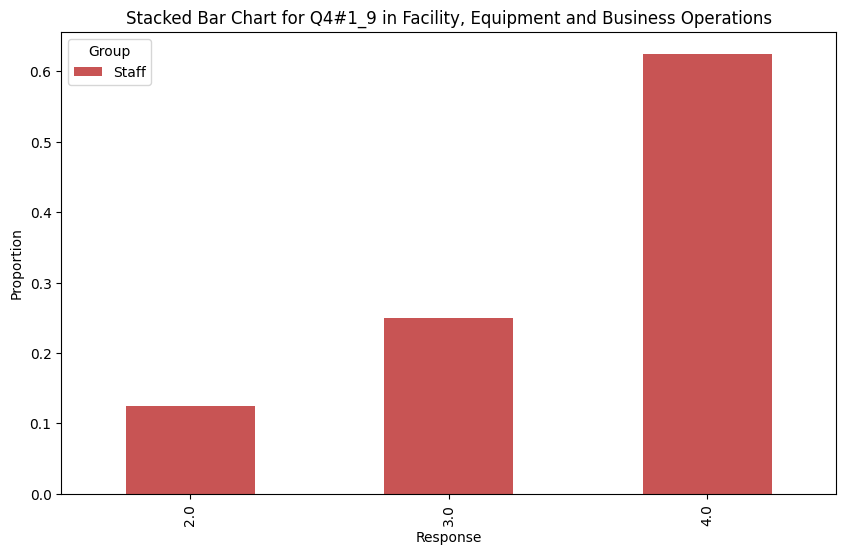

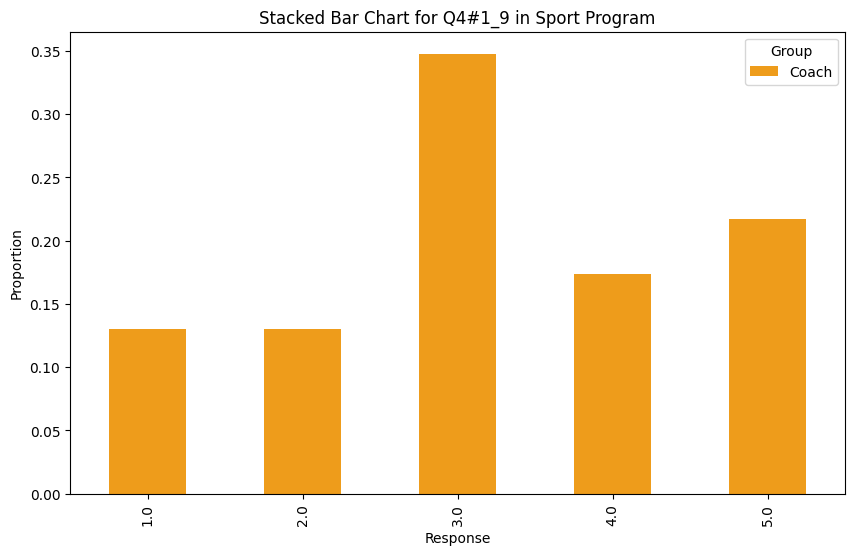

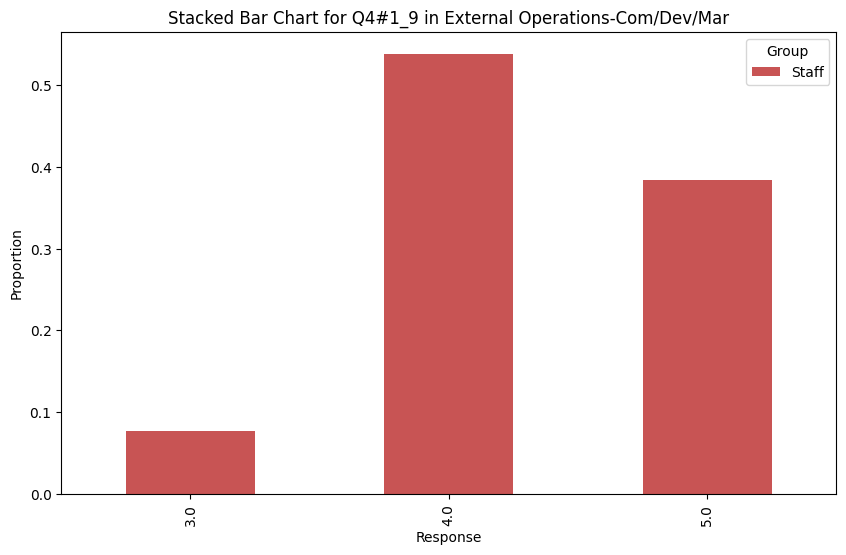

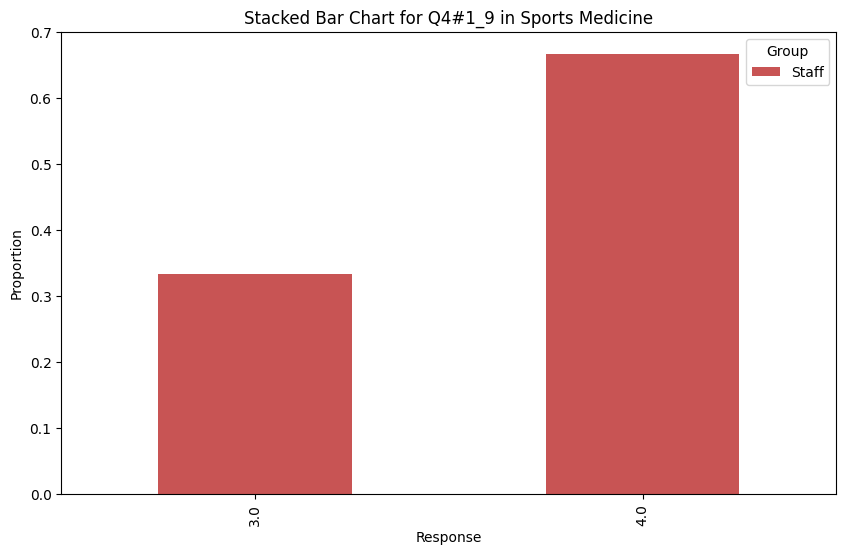

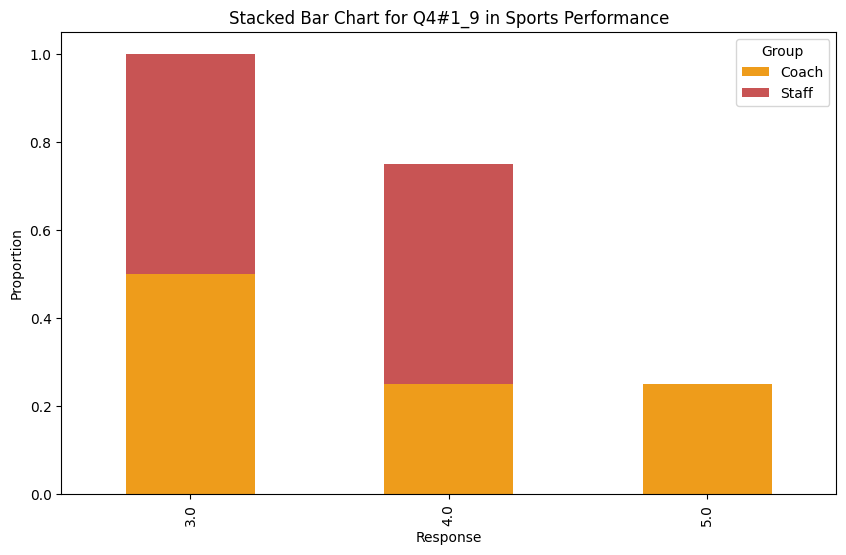

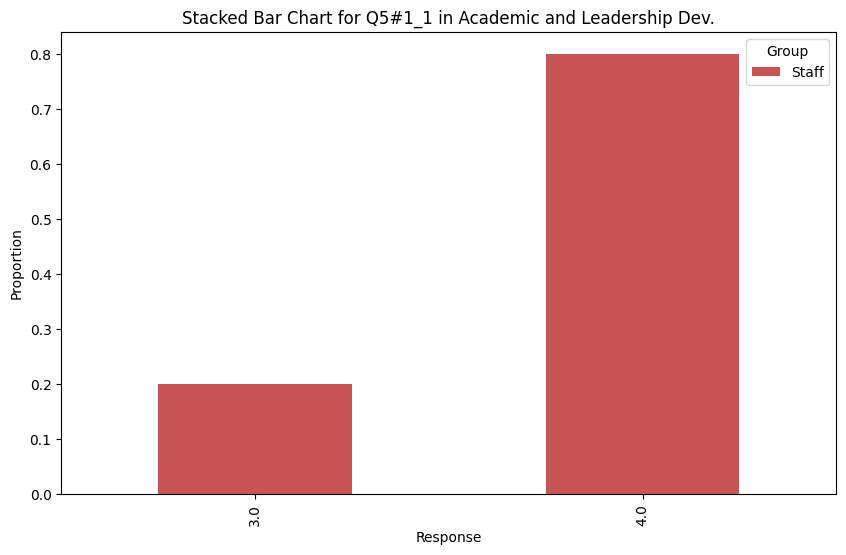

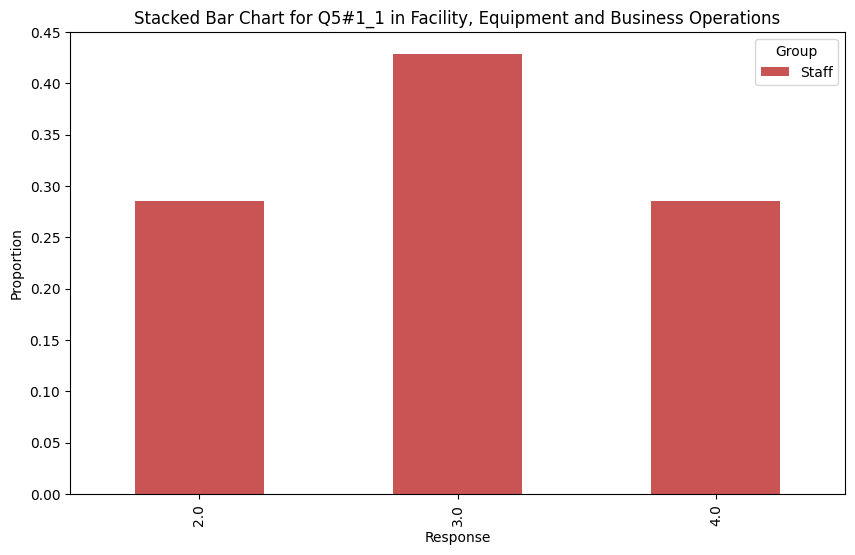

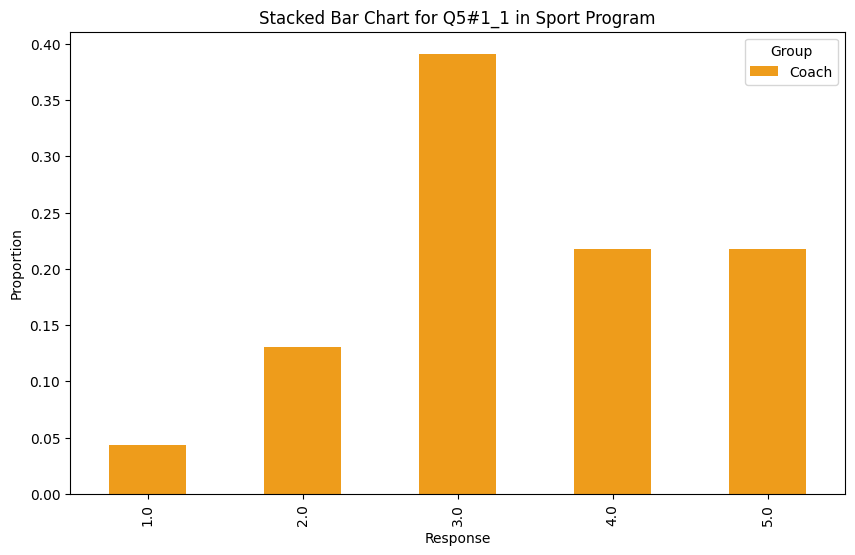

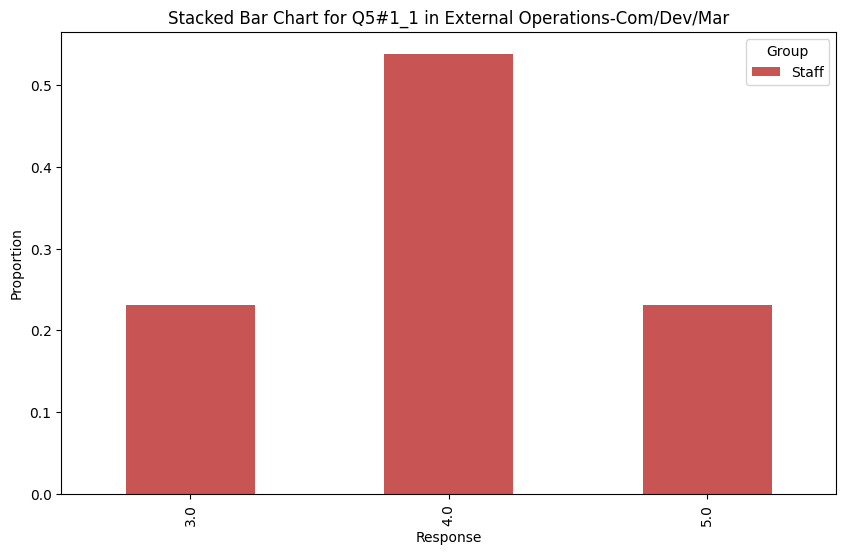

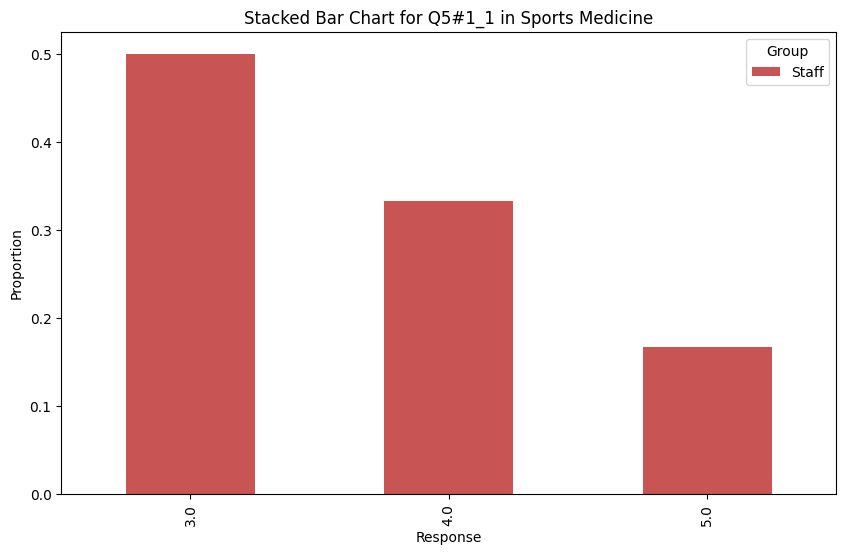

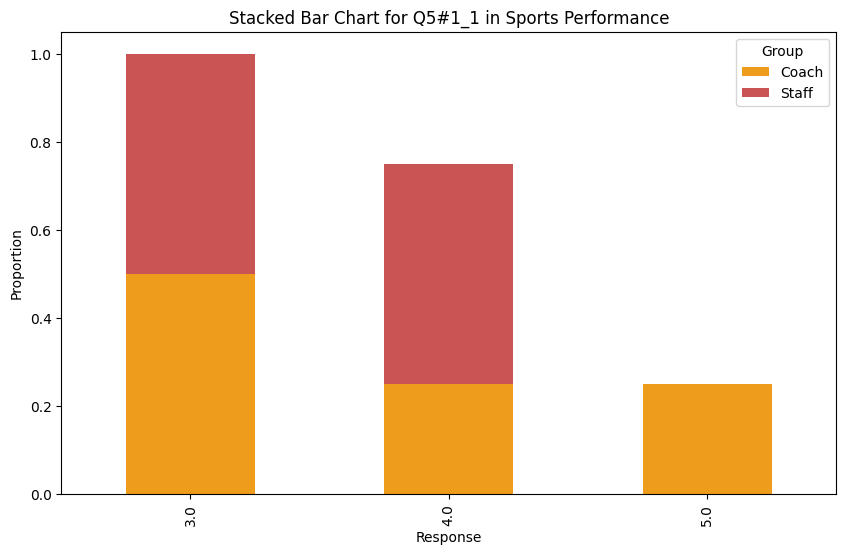

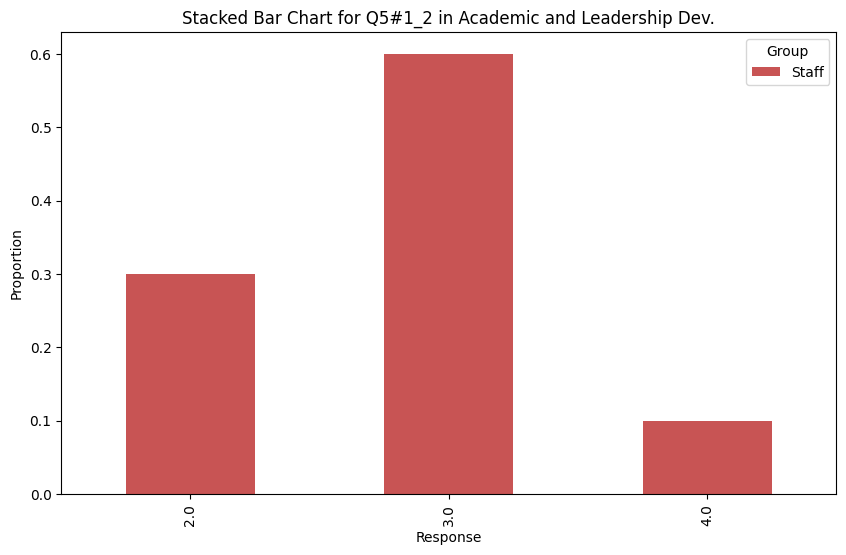

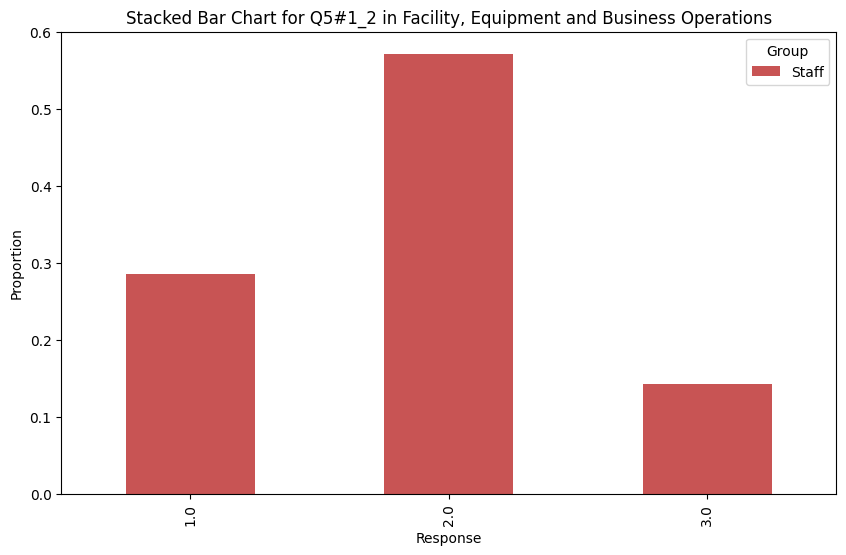

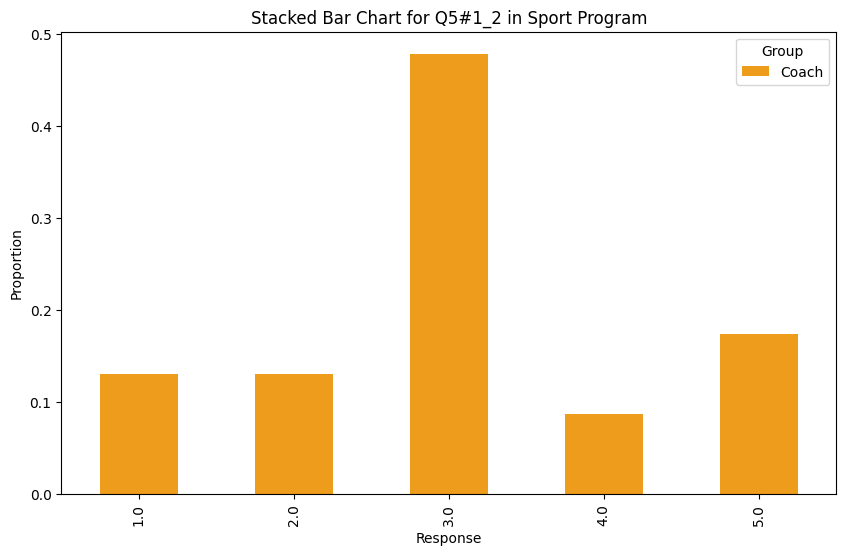

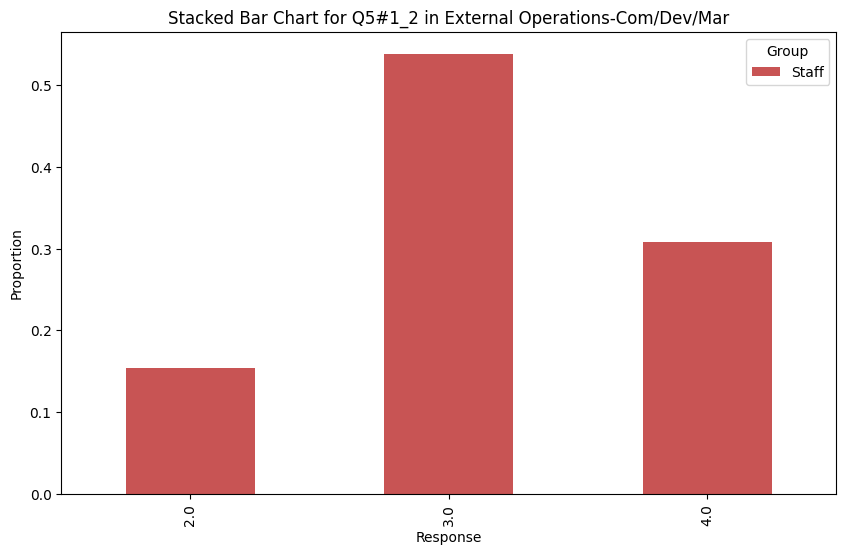

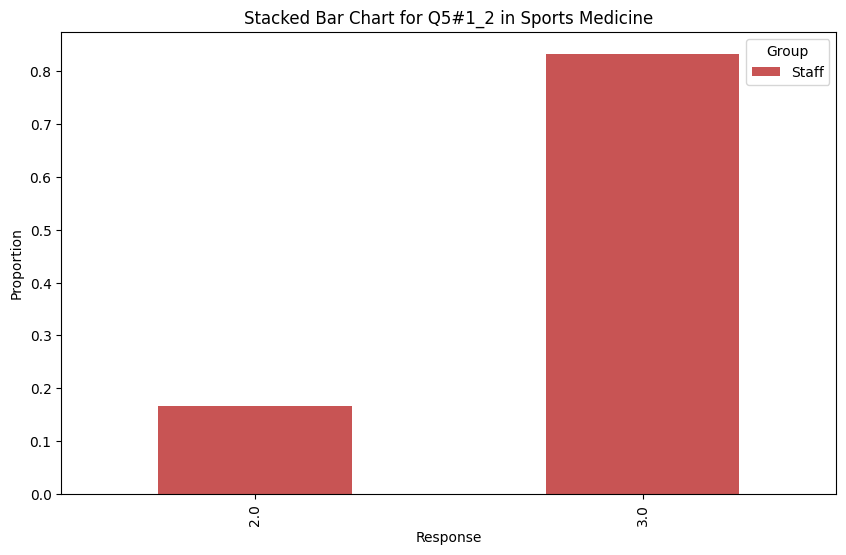

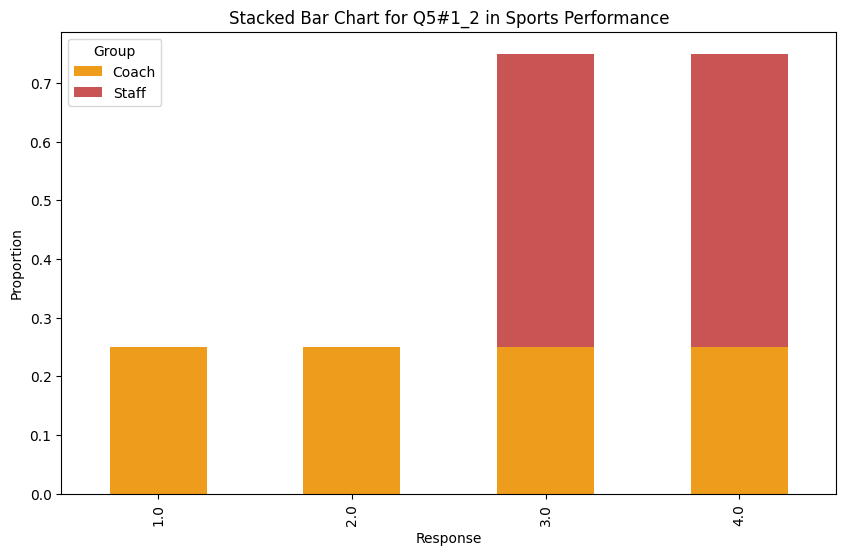

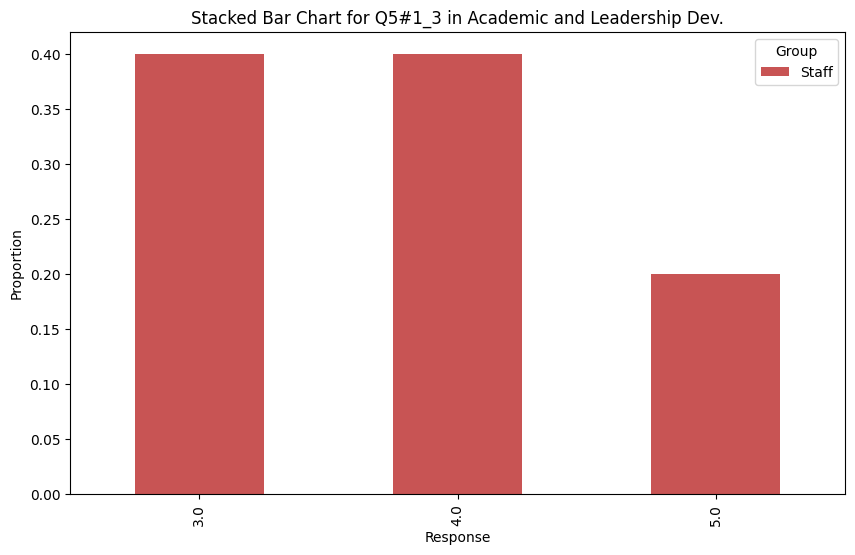

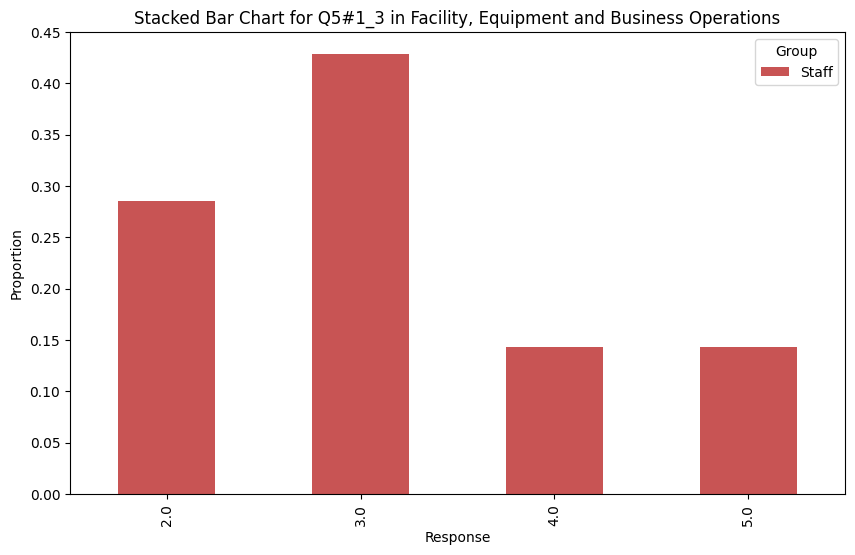

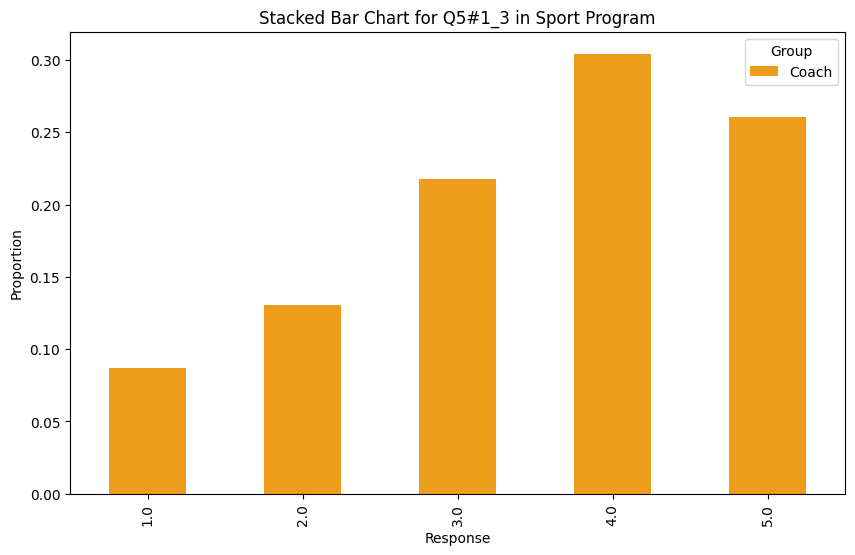

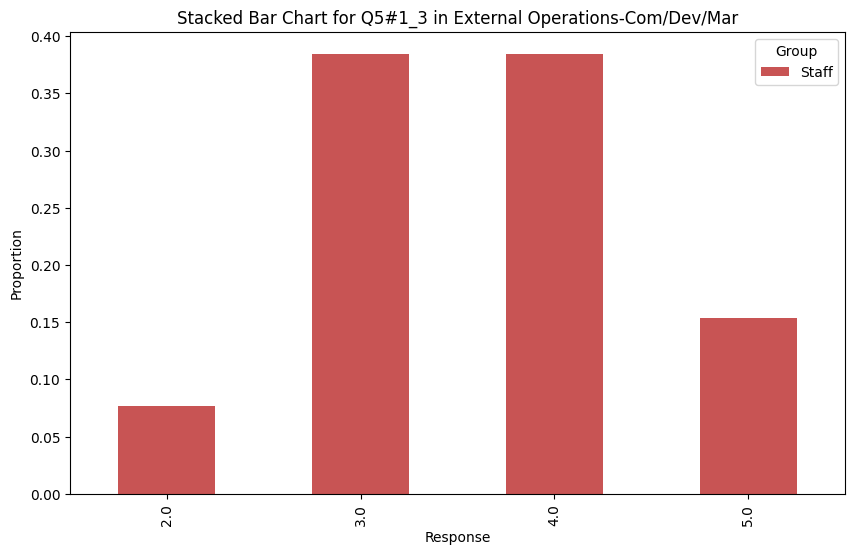

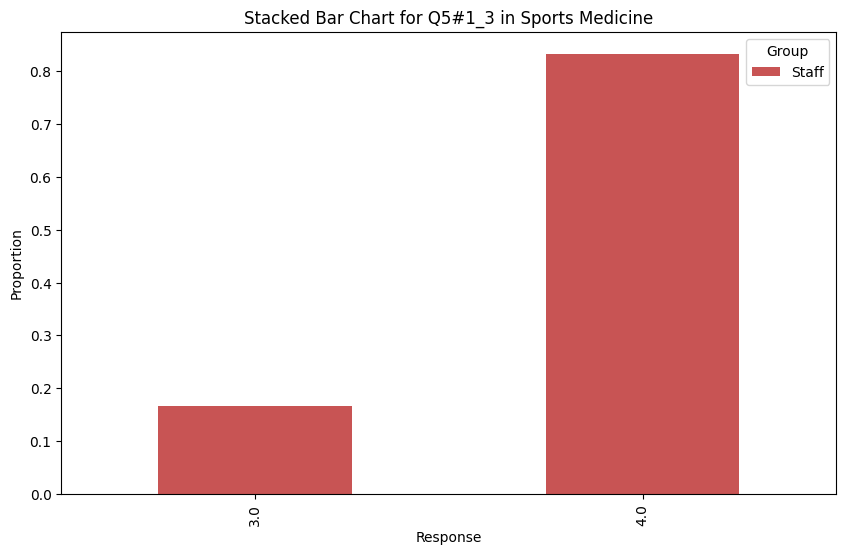

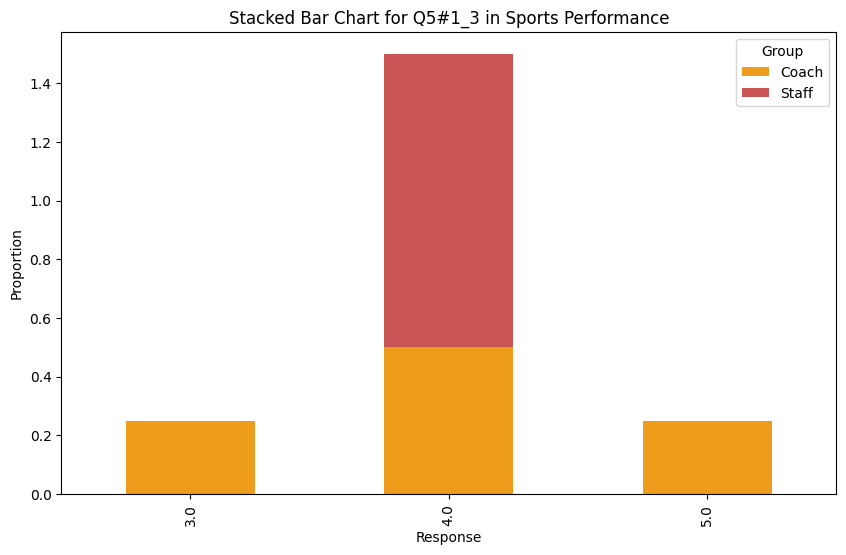

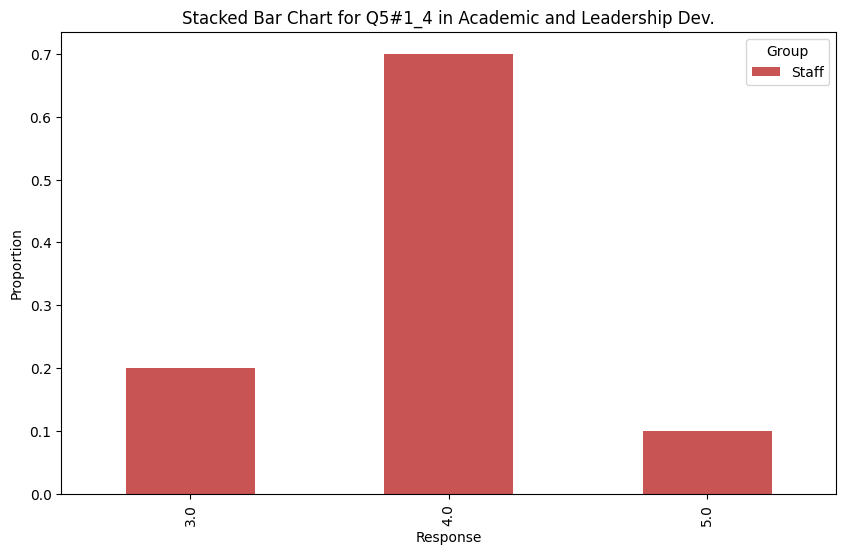

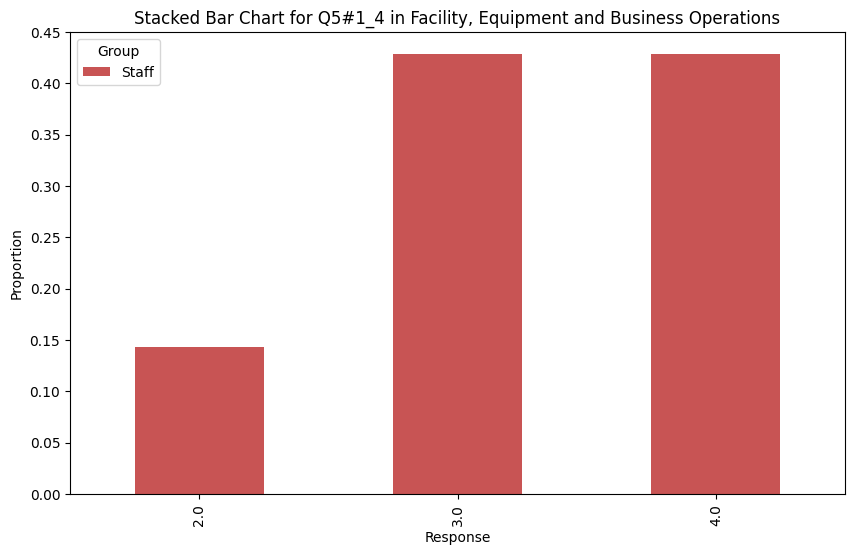

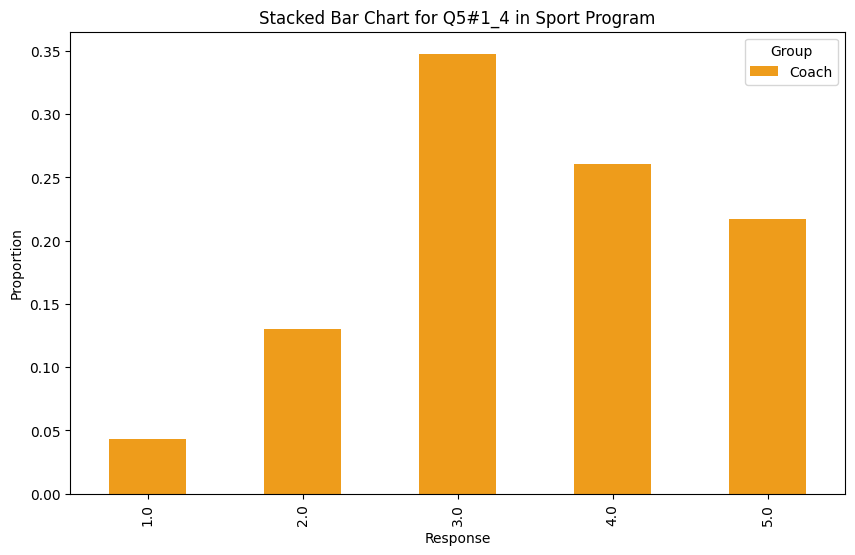

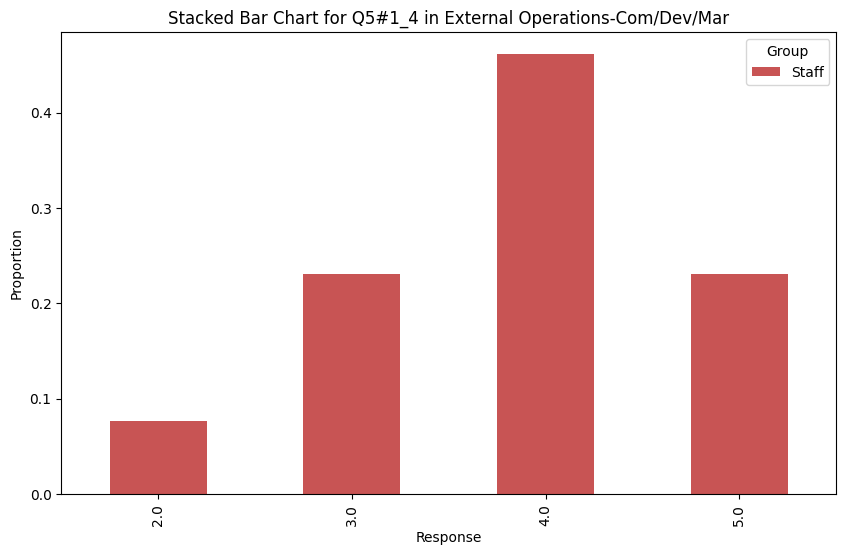

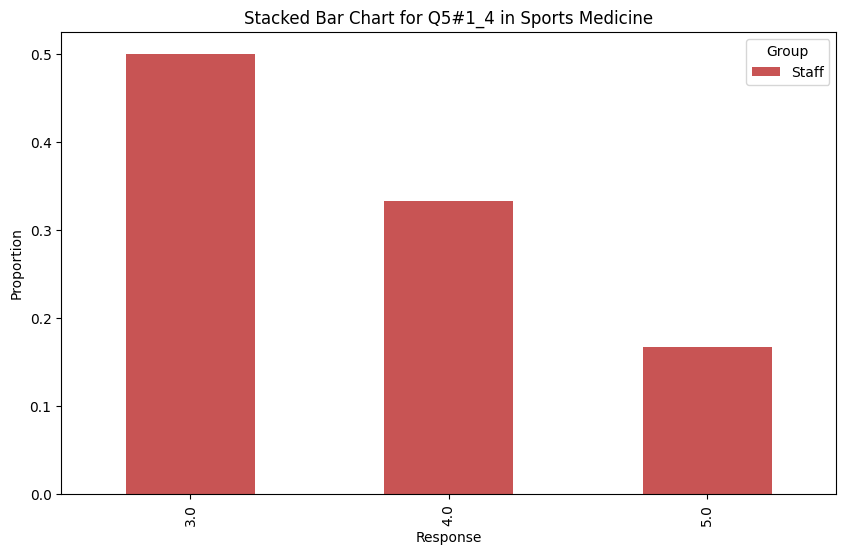

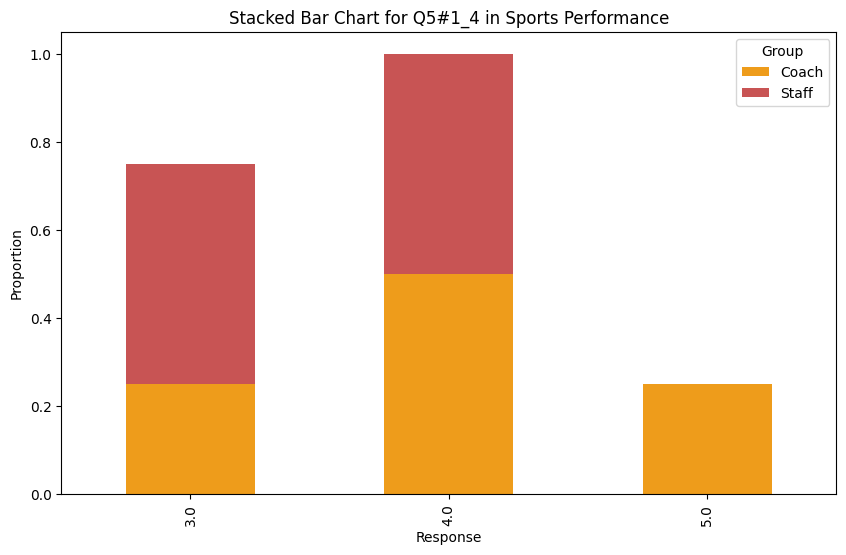

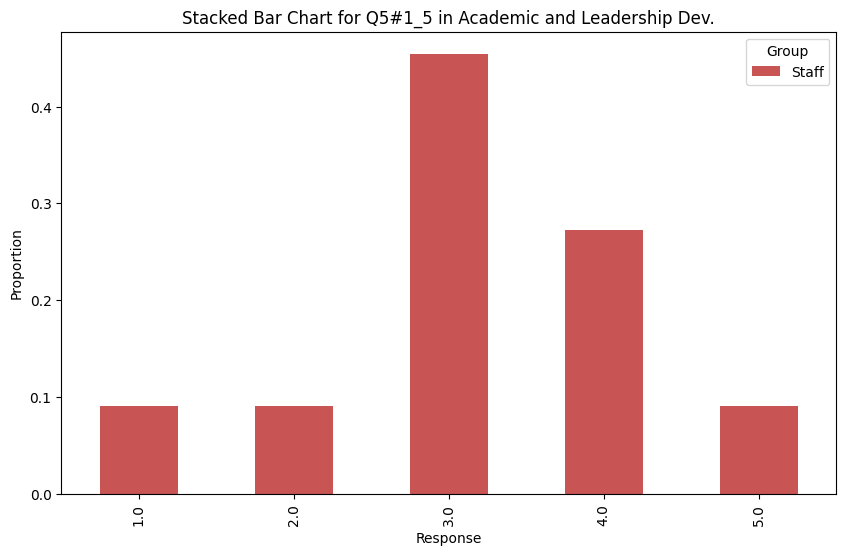

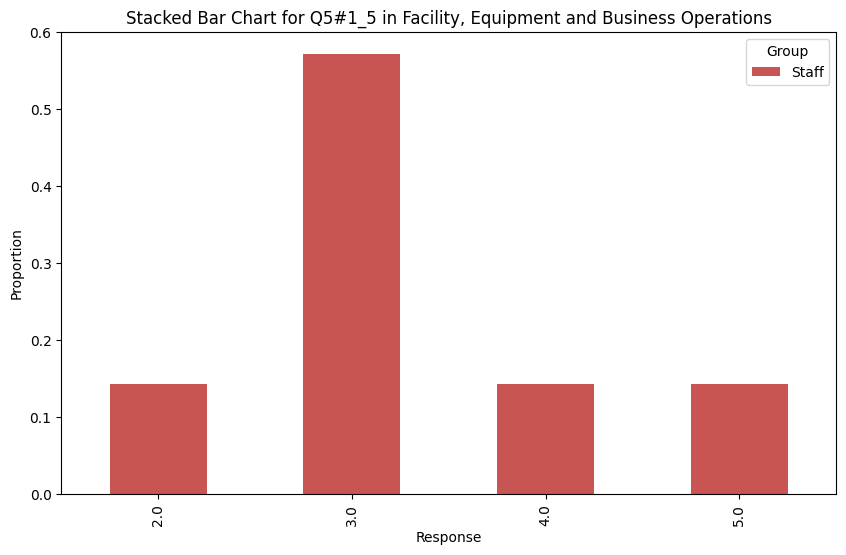

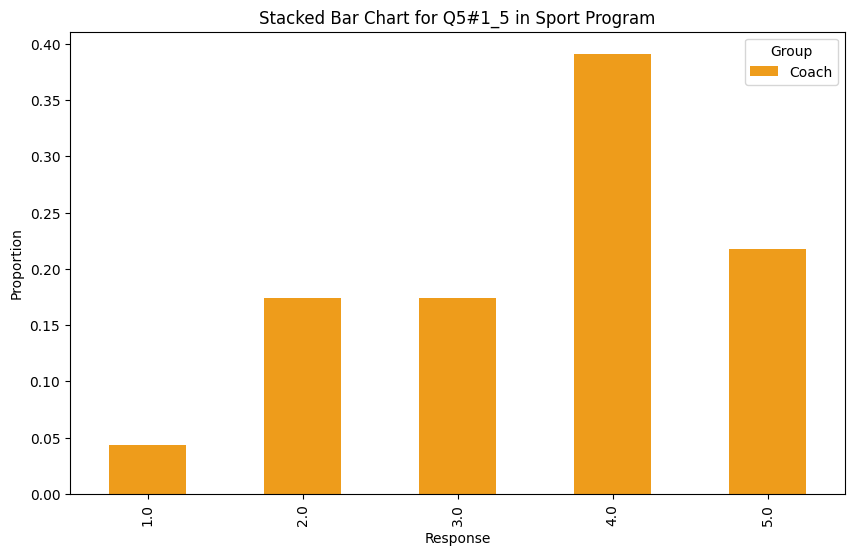

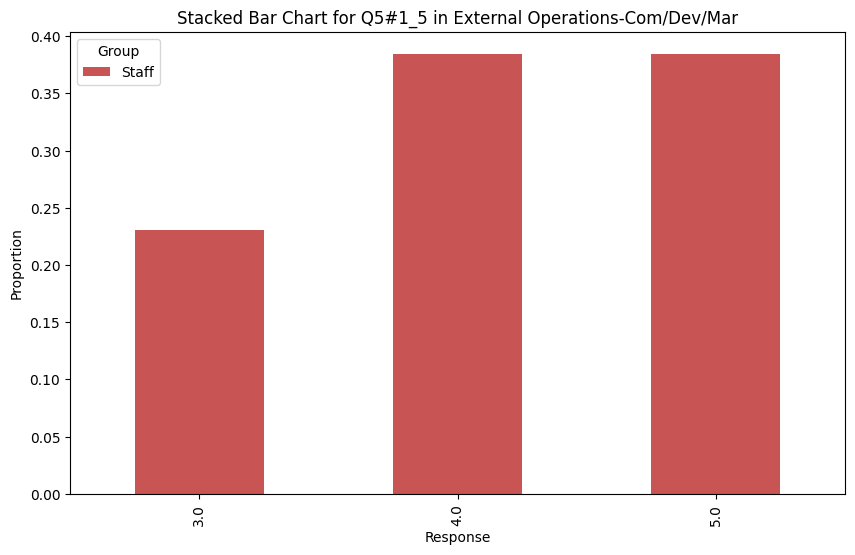

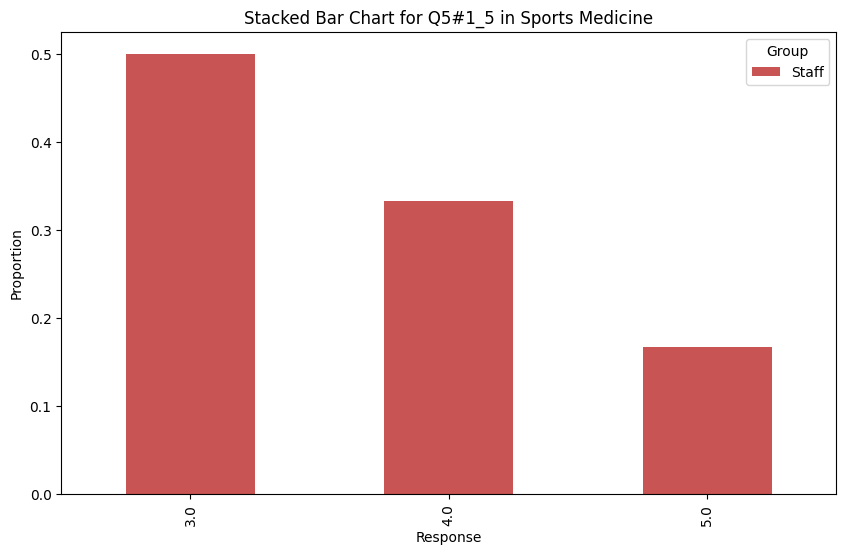

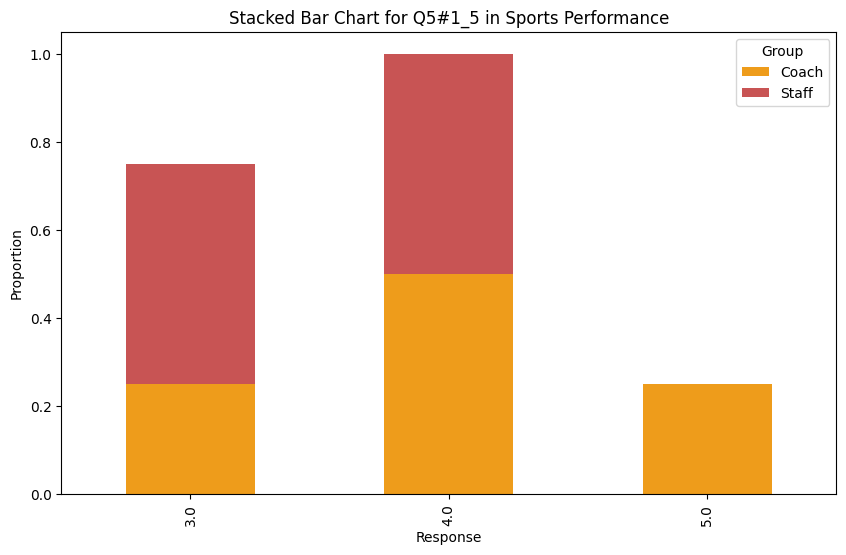

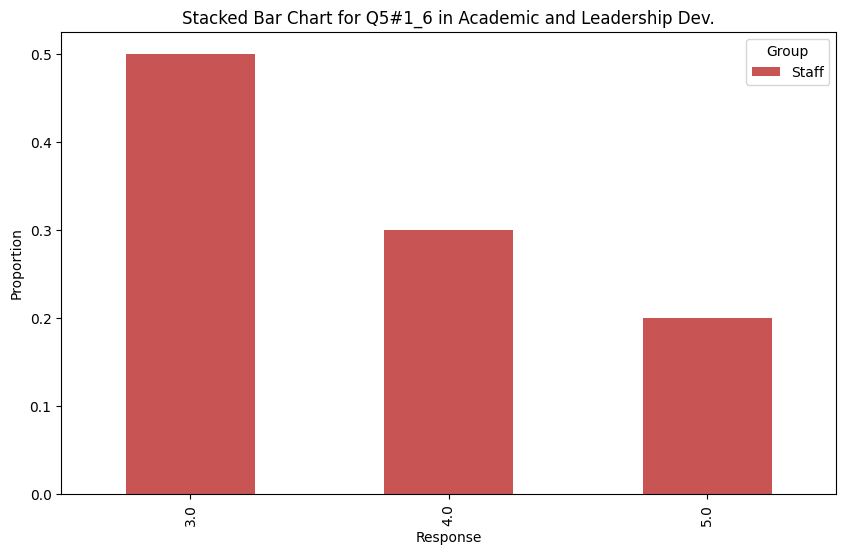

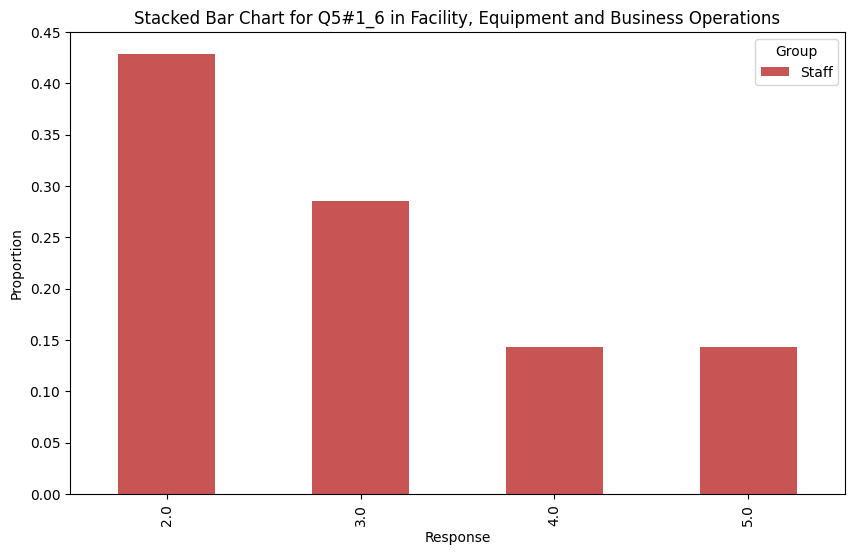

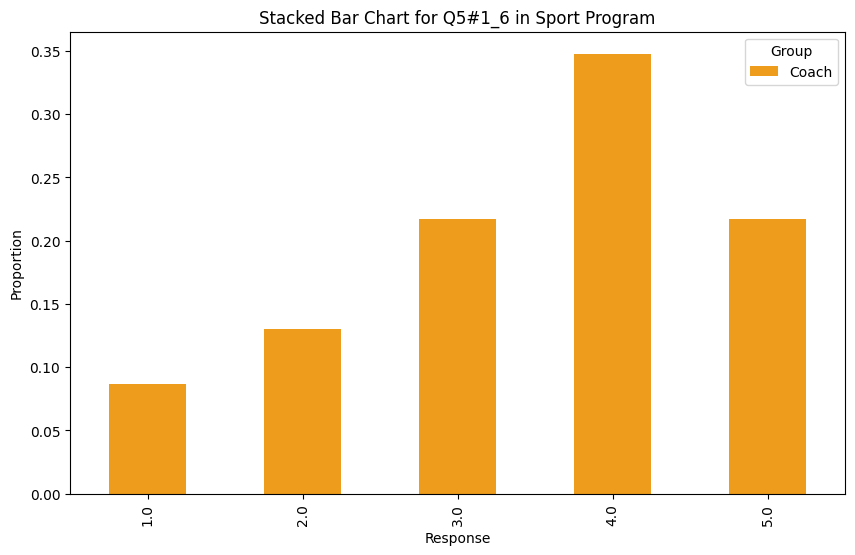

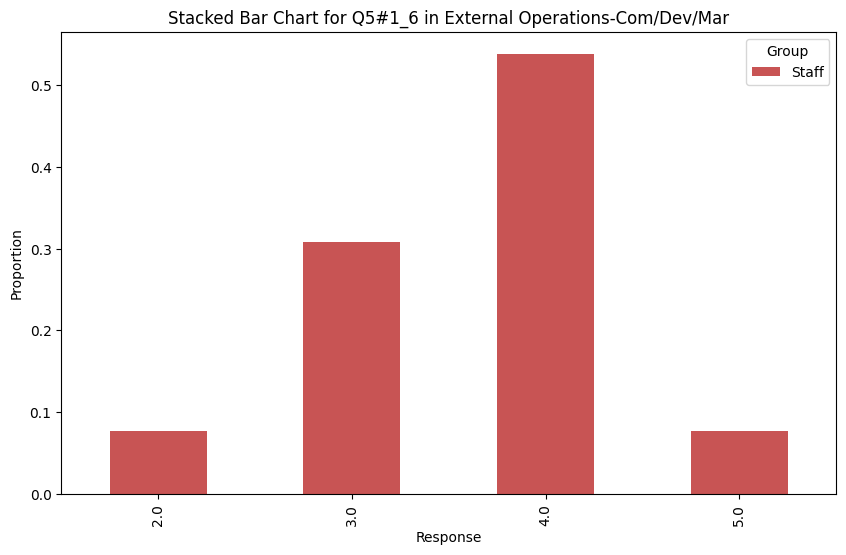

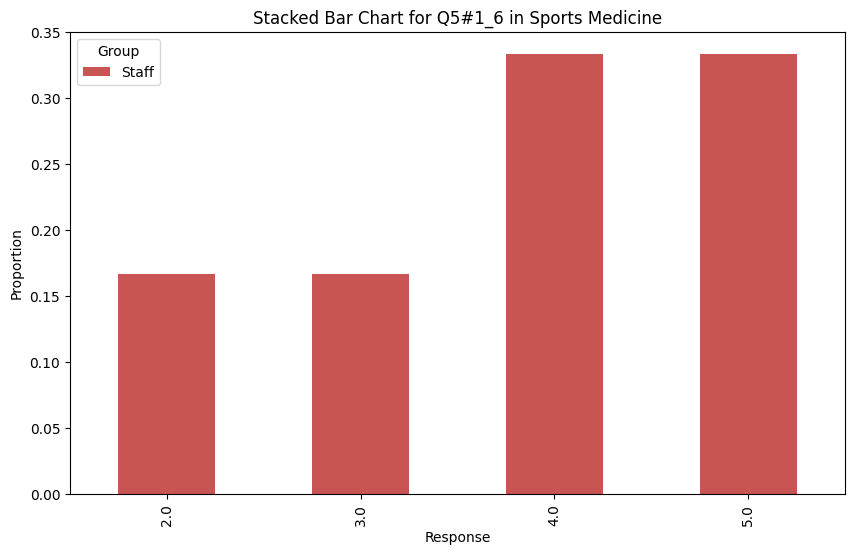

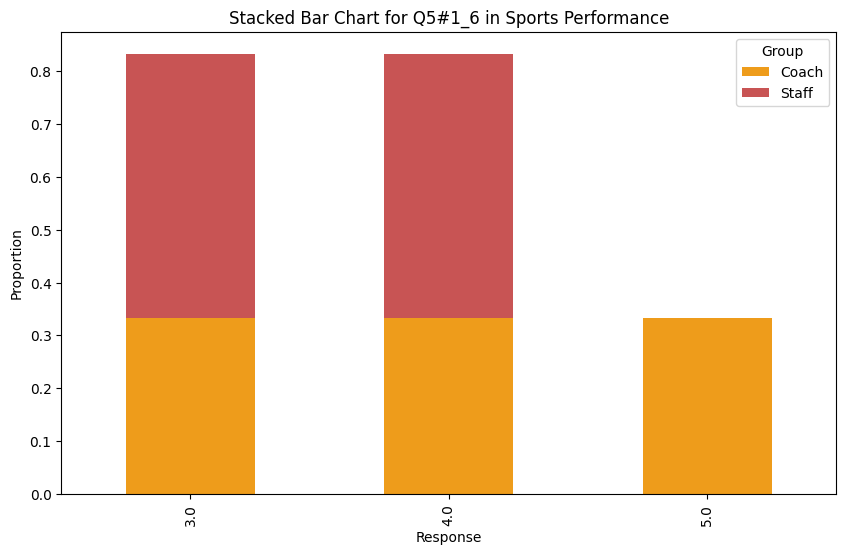

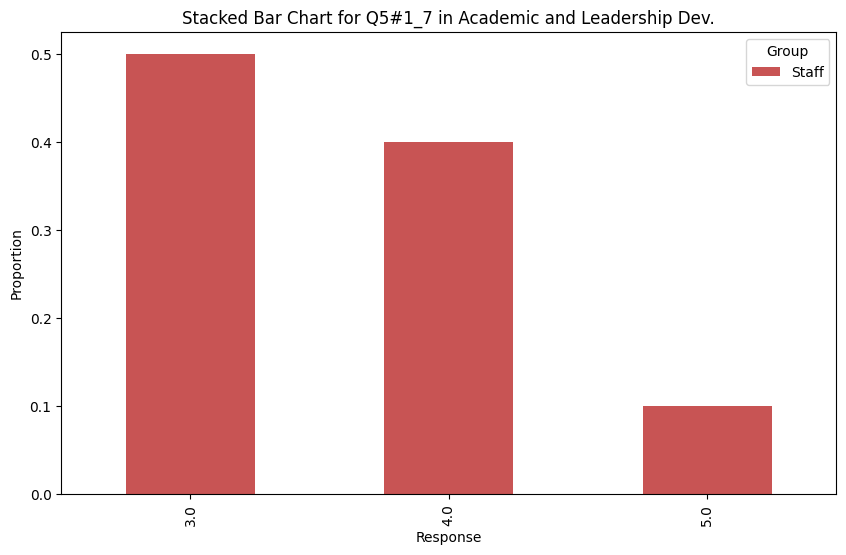

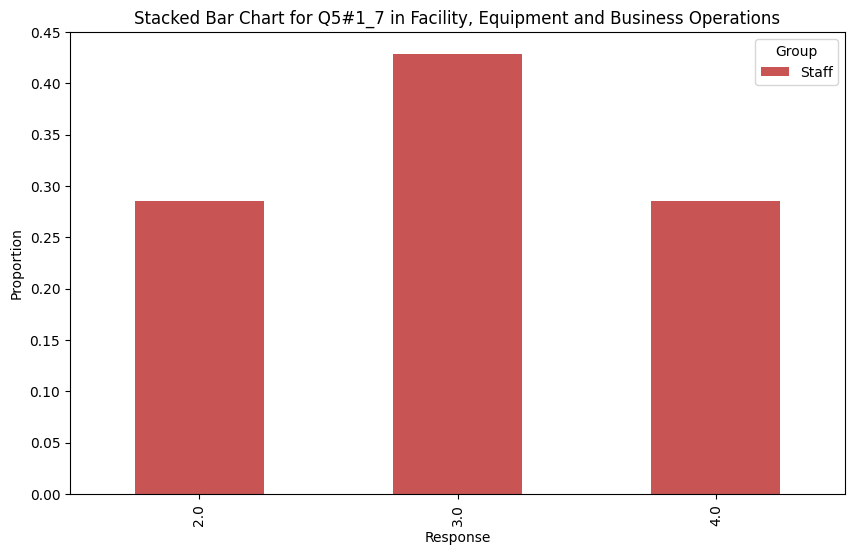

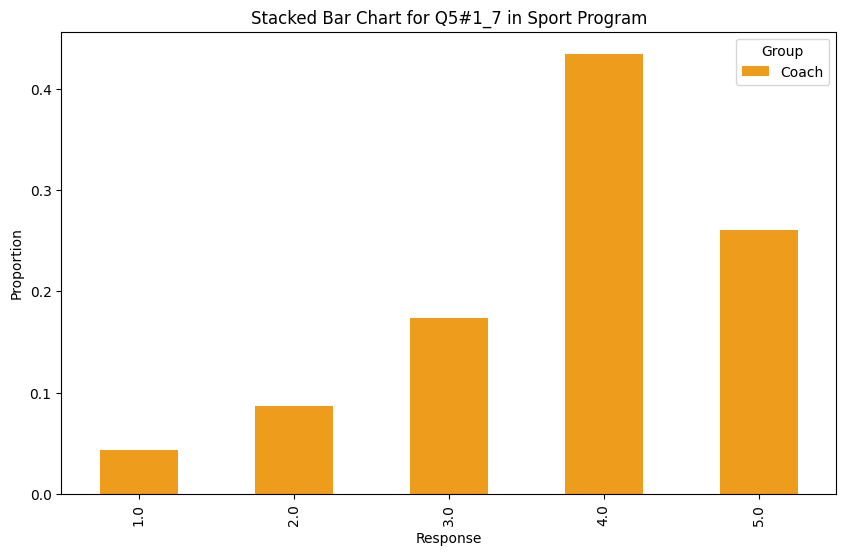

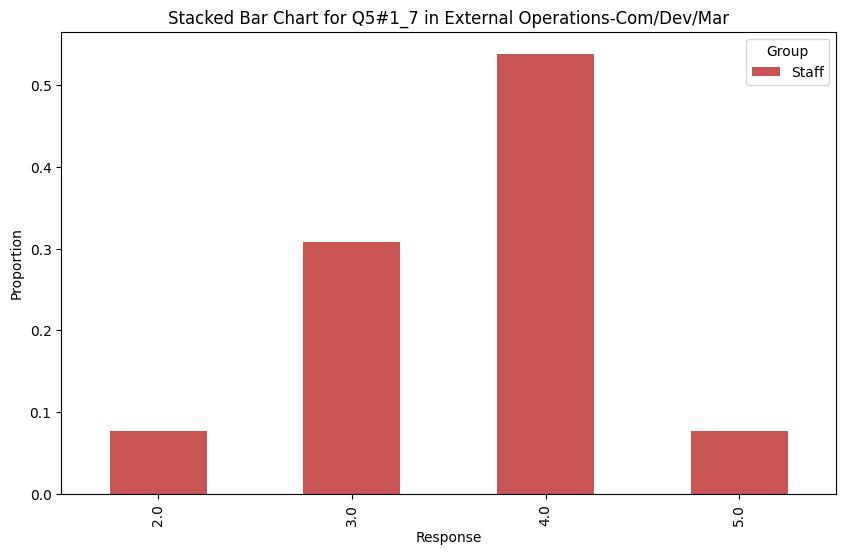

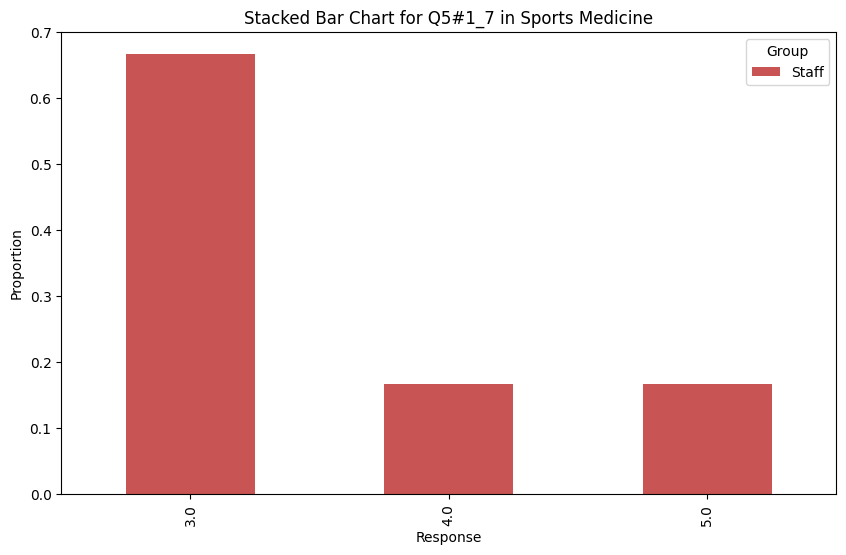

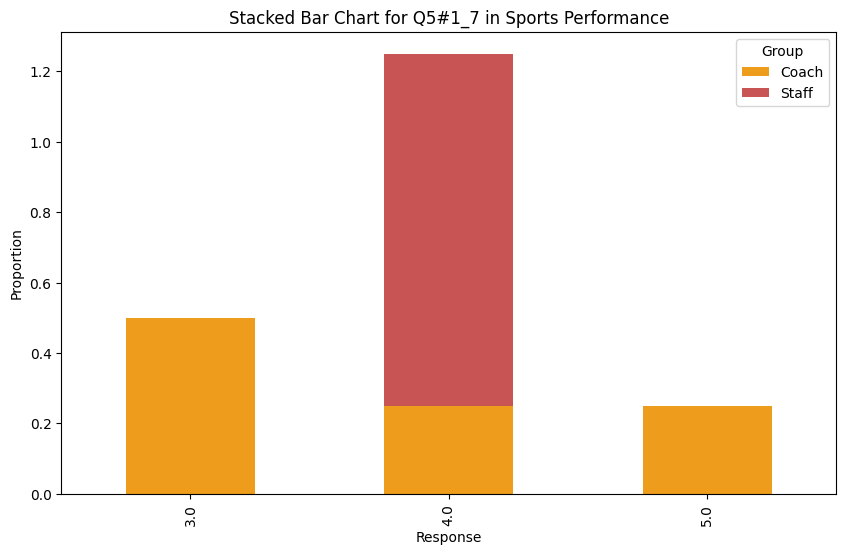

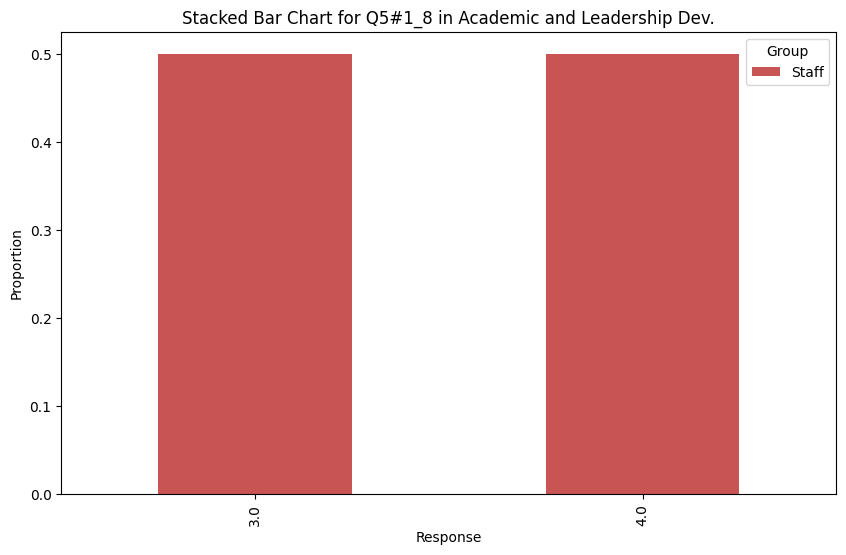

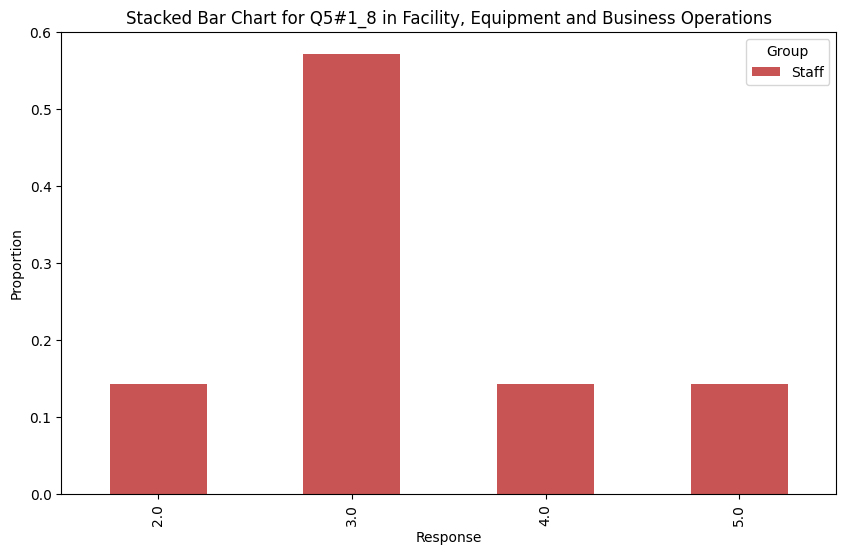

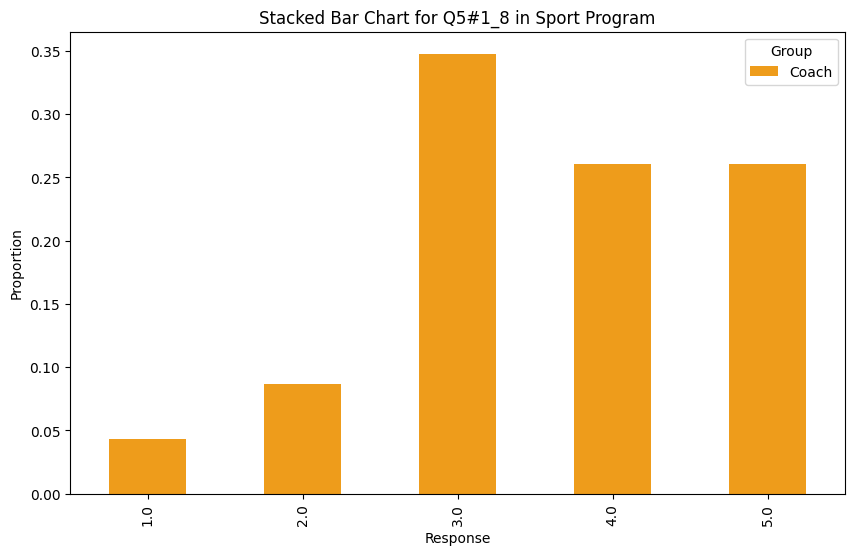

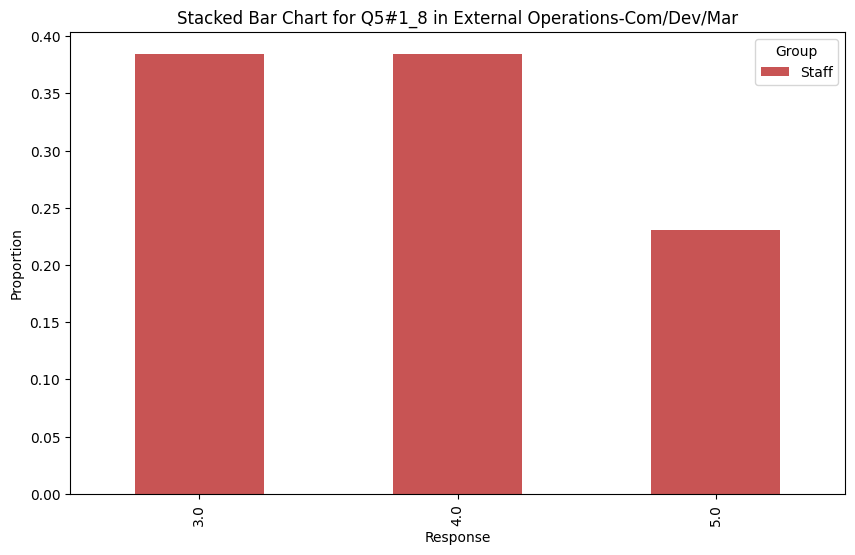

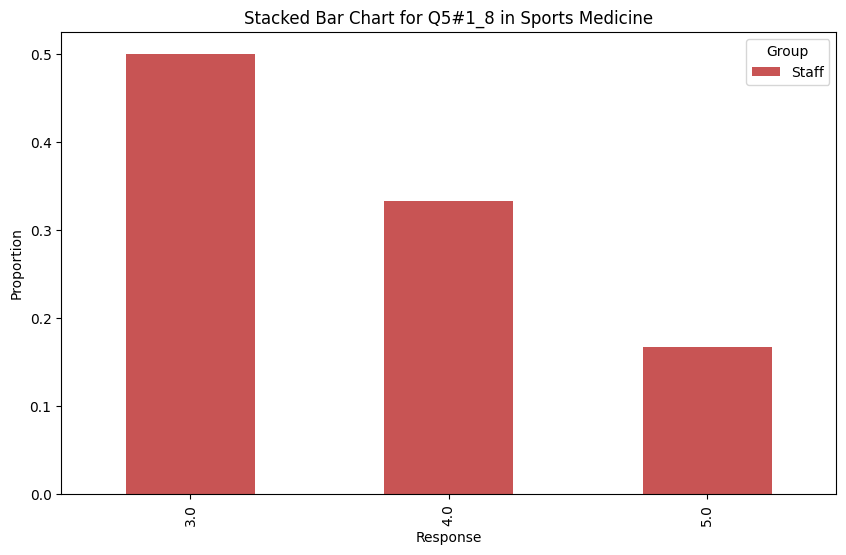

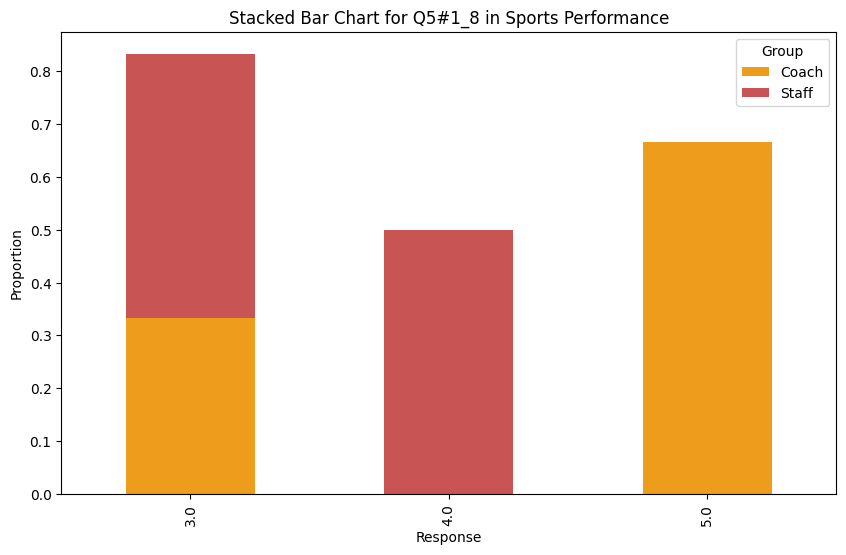

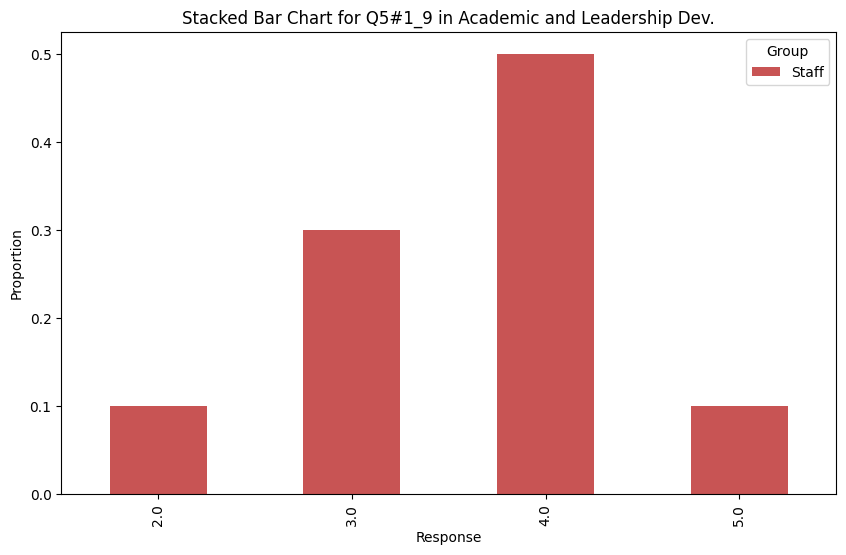

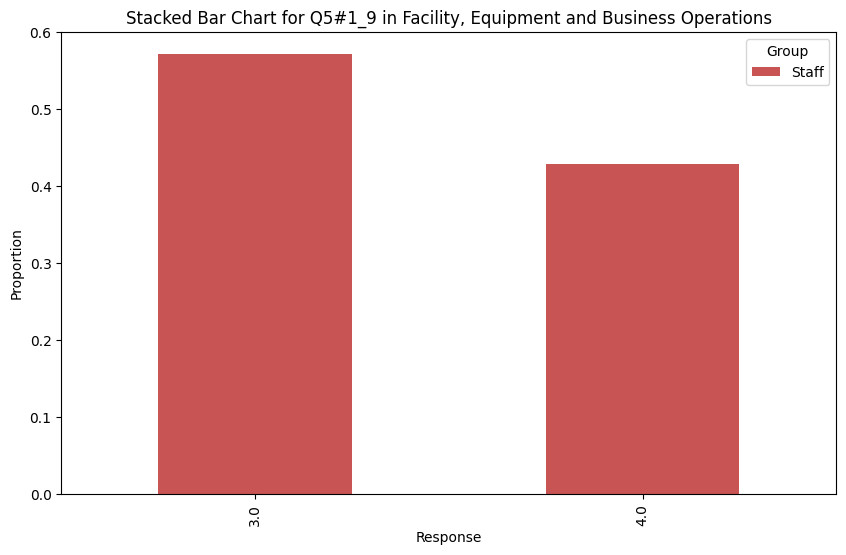

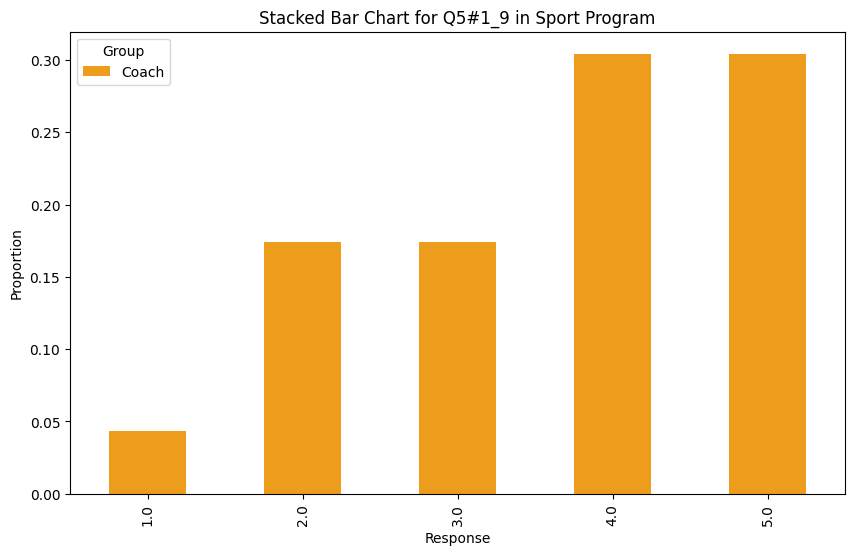

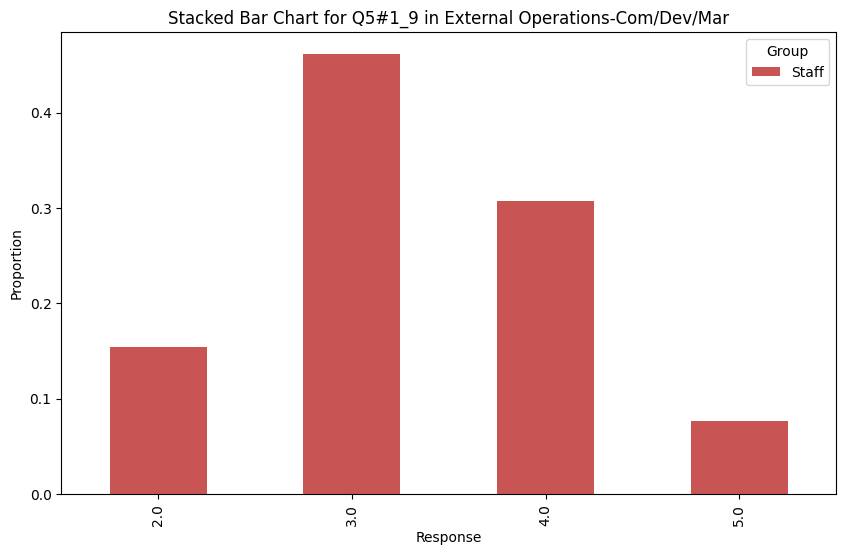

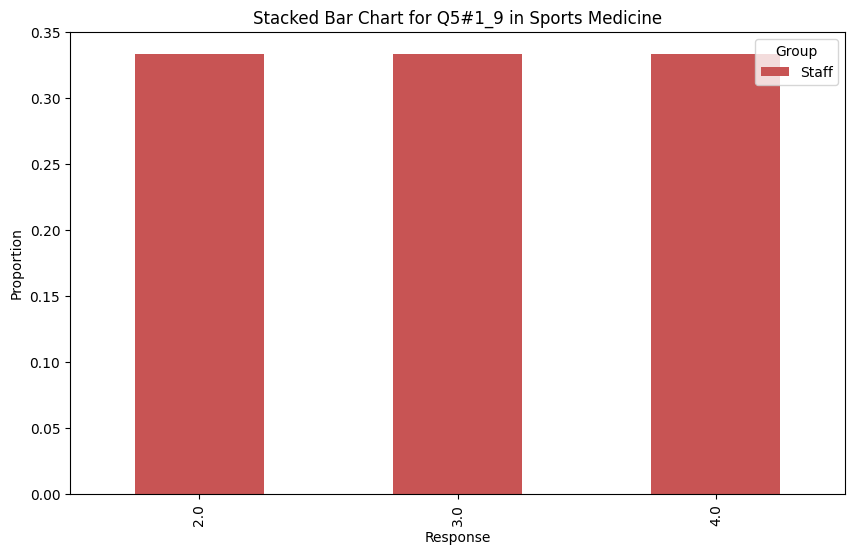

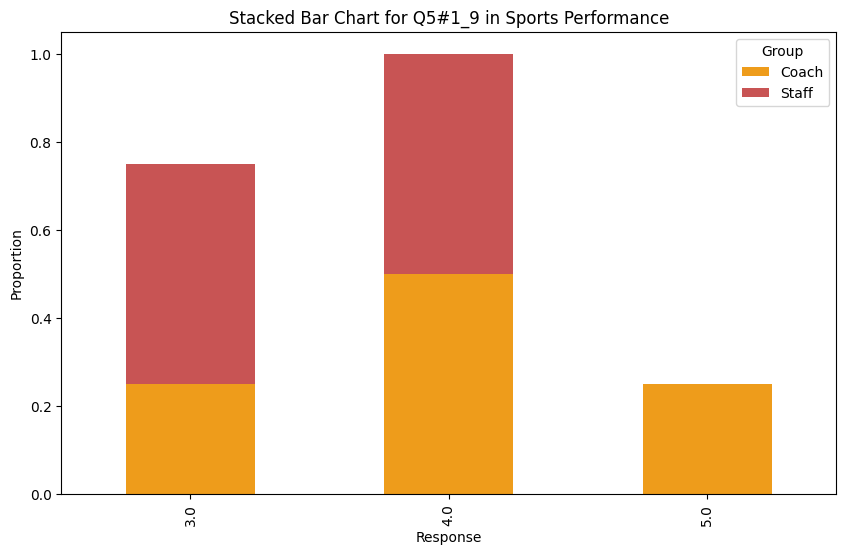

In [ ]:
data_for_plotting = []

for col in frequency_distribution:
    for dept in frequency_distribution[col]:
        for group in frequency_distribution[col][dept]:
            freq_df = frequency_distribution[col][dept][group].reset_index()
            freq_df.columns = ['Response', 'Proportion']
            freq_df['Department'] = dept
            freq_df['Group'] = group
            freq_df['Question'] = col
            data_for_plotting.append(freq_df)

# Combine all data into a single DataFrame
plotting_df = pd.concat(data_for_plotting, ignore_index=True)

# Function to plot stacked bar chart
def plot_stacked_bar(df, question, dept):
    # Filter data for specific question and department
    df_filtered = df[(df['Question'] == question) & (df['Department'] == dept)]

    # Pivot the data to get the proportions for each group
    pivot_df = df_filtered.pivot_table(index='Response', columns='Group', values='Proportion', fill_value=0)

    # Define your custom colors
    color_dict = {'Coach': '#ee9c1b', 'Staff': '#c85454'}

    # Plotting
    pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=[color_dict[group] for group in pivot_df.columns])

    # Add titles and labels
    plt.title(f'Stacked Bar Chart for {question} in {dept}')
    plt.xlabel('Response')
    plt.ylabel('Proportion')
    plt.legend(title='Group')
    plt.show()

# Plot for each question and department
for question in plotting_df['Question'].unique():
    for dept in plotting_df['Department'].unique():
        plot_stacked_bar(plotting_df, question, dept)